#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> CAPSTONE PROJECT - NLP CHATBOT

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">TEAM - Feb 23A Capstone Group-2

• DOMAIN: Industrial safety. NLP based Chatbot.

• CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣ Genre: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.

### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Milestone 1:

In [5]:
import pandas as pd
pd.set_option('max_colwidth', None)

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import bokeh
import holoviews as hv
from holoviews import opts

import warnings
warnings.filterwarnings('ignore')


# Metrics to evaluate the model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt  
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.regularizers import l1, l2, l1_l2
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report,multilabel_confusion_matrix,f1_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score


[nltk_data] Downloading package stopwords to C:\Users\Vasudevan
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vasudevan
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vasudevan
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Step 1: Import the data [ 3 points ]

In [6]:
#Importing the dataset
read_df = pd.read_csv(r"C:\Users\Vasudevan P\Downloads\Data Set - industrial_safety_and_health_database_with_accidents_description (1).csv")

In [7]:
read_df = read_df.drop('Unnamed: 0', axis =1)

In [8]:
#Checking for 5 records
read_df.head(5)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  
0                                                                                                           While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.  
1                                                                                                                                                                                                                                                                 During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.  
2                                                                                                                                                                                                                                                          In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.  
3  Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.  
4                                                                             Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of th

In [9]:
#Making a copy of original data
read_df_cpy = read_df.copy(deep=True)

In [10]:
# print hape of the df
print("The number of Records:",read_df_cpy.shape[0],"and number of features:",read_df_cpy.shape[1])

The number of Records: 425 and number of features: 10


In [11]:
read_df_cpy.describe(include="all")

Data   Countries     Local Industry Sector  \
count                   425         425       425             425   
unique                  287           3        12               3   
top     2017-02-08 00:00:00  Country_01  Local_03          Mining   
freq                      6         251        90             241   

       Accident Level Potential Accident Level Genre Employee or Third Party  \
count             425                      425   425                     425   
unique              5                        6     2                       3   
top                 I                       IV  Male             Third Party   
freq              316                      143   403                     189   

       Critical Risk  \
count            425   
unique            33   
top           Others   
freq             232   

                                                                                                                                                                                                                                                                                                                                                             Description  
count                                                                                                                                                                                                                                                                                                                                                                425  
unique                                                                                                                                                                                                                                                                                                                                                               411  
top     During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud.  
freq                                                                                                                                                                                                                                                                                                                                                                   3

In [12]:
#Checking for the datatypes
read_df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:
    
- All the features are object type but the Data column which represents the Date has to be converted
- There are 425 records available in dataset all are non null values
- `Countries` feature has `3 countries` with country_1 of highest frequency `251`
- `Local` features has `12 cities` with Local_0 of highest frequency `90`
- `Industry Sector` has `3 sectors` with mining of highest frequency `240`
- `Genre` has male & female with male of highest frequency `403` thus dataset is biased with male employee details
- `Employee or Third Party` shows `Third Party` accident levels occurred more with `189` workers

### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Step 2: Data cleansing [ 5 points ]

We all know the saying garbage in, garbage out. Hence no matter how complex or well designed a machine learning model maybe, if we input garbage/unclean data the output will not be as useful for further decision making. Hence it is very important to clean our data at the very first step as much as possible. In this step of data cleansing we will follow the following techniques of data cleansing:

1. Checking for missing values 
2. Removing duplicate observations
3. Renaming columns to make them more intuitive/correct
4. Convert data types

### 1. Check for missing value

In [13]:
read_df_cpy_cols = read_df_cpy.columns.to_list()
read_df_cpy_cols

['Data',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description']

In [14]:
# get missing values
def get_missing_cols(read_df, cols):
    for col in cols:
        mss_perc = read_df[col].isnull().sum()/len(read_df[col])*100 
        print("missing perc for col",col, "is", "{:.6f}".format(mss_perc),"%") 

In [15]:
get_missing_cols(read_df_cpy, read_df_cpy_cols)

missing perc for col Data is 0.000000 %
missing perc for col Countries is 0.000000 %
missing perc for col Local is 0.000000 %
missing perc for col Industry Sector is 0.000000 %
missing perc for col Accident Level is 0.000000 %
missing perc for col Potential Accident Level is 0.000000 %
missing perc for col Genre is 0.000000 %
missing perc for col Employee or Third Party is 0.000000 %
missing perc for col Critical Risk is 0.000000 %
missing perc for col Description is 0.000000 %


### 2. Check & Removing Duplicate Text

In [16]:
duplicated_rows = read_df_cpy[read_df_cpy.duplicated(keep="first")]

In [17]:
duplicated_rows

Data   Countries     Local Industry Sector Accident Level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    Potential Accident Level Genre Employee or Third Party  \
77                         V  Male    Third Party (Remote)   
262                       IV  Male                Employee   
303                        I  Male    Third Party (Remote)   
345                        I  Male             Third Party   
346                        I  Male             Third Party   
355                        I  Male             Third Party   
397                       IV  Male             Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Description  
77   In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout.  
262                                                                                                                                                                                                                                                                                                                                                                                                                                                                      During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud.  
303                                                                                                                                                                                  

In [18]:
read_df_cpy.drop_duplicates(keep="first", inplace=True)

In [19]:
print("After removing the duplicates, the number of records:",read_df_cpy.shape[0],"and number of features :",read_df_cpy.shape[1])

After removing the duplicates, the number of records: 418 and number of features : 10


### 3. Rename column name Data to Date and adding new columns

In [20]:
read_df_cpy.head(1)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.

In [21]:
read_df_cpy['Date_Time'] = pd.to_datetime(read_df_cpy['Data'])

In [22]:
read_df_cpy.head(1)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

   Date_Time  
0 2016-01-01

In [23]:
#Forming new columns from Date
read_df_cpy['Year'] = read_df_cpy['Date_Time'].dt.strftime('%Y')
read_df_cpy['Month'] = read_df_cpy['Date_Time'].dt.strftime('%b')
read_df_cpy['Date'] = read_df_cpy['Date_Time'].dt.strftime('%d')
read_df_cpy['Day_of_week'] = read_df_cpy['Date_Time'].dt.strftime('%a')

In [24]:
read_df_cpy.head(1)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

   Date_Time  Year Month Date Day_of_week  
0 2016-01-01  2016   Jan   01         Fri

In [25]:
read_df_cpy.drop('Data',axis=1,inplace= True)

In [26]:
read_df_cpy.drop_duplicates(keep="first", inplace=True)

In [27]:
print("The number of records:", read_df_cpy.shape[0]," and number of columns:",read_df_cpy.shape[1])

The number of records: 418  and number of columns: 14


In [28]:
read_df_cpy.head(1)

Countries     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

   Date_Time  Year Month Date Day_of_week  
0 2016-01-01  2016   Jan   01         Fri

In [29]:
read_df_cpy.rename(columns={"Countries":"Country","Genre":"Gender","Employee or Third Party":"Employment"},
                      inplace = True)

## EDA

In [30]:
#function to print unique values of the columns
def get_unique_values(Dataframe, column):
    print(Dataframe[column].value_counts())

In [31]:
read_df_cpy.columns

Index(['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employment', 'Critical Risk',
       'Description', 'Date_Time', 'Year', 'Month', 'Date', 'Day_of_week'],
      dtype='object')

In [32]:
X_features = ['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employment',
       'Critical Risk','Date_Time', 'Year', 'Month', 'Date']

In [33]:
for col in X_features:
    print("The unique values of",col,"are:")
    get_unique_values(read_df_cpy,col);

The unique values of Country are:
Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64
The unique values of Local are:
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64
The unique values of Industry Sector are:
Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64
The unique values of Accident Level are:
I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64
The unique values of Potential Accident Level are:
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64
The unique values of Gender are:
Male      396
Female     22
Name: Gender, dtype: int64
The unique values of Employment are:
Third Party             185
Employee                178
Third Party (Remote)     55
Name: Employment, dtype:

# univariate analysis

In [34]:
def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    
    """

    figure,axes = plt.subplots(nrows =1,ncols = 2,figsize=(20,10))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index,ax = axes[1]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:1.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

### 1. Country

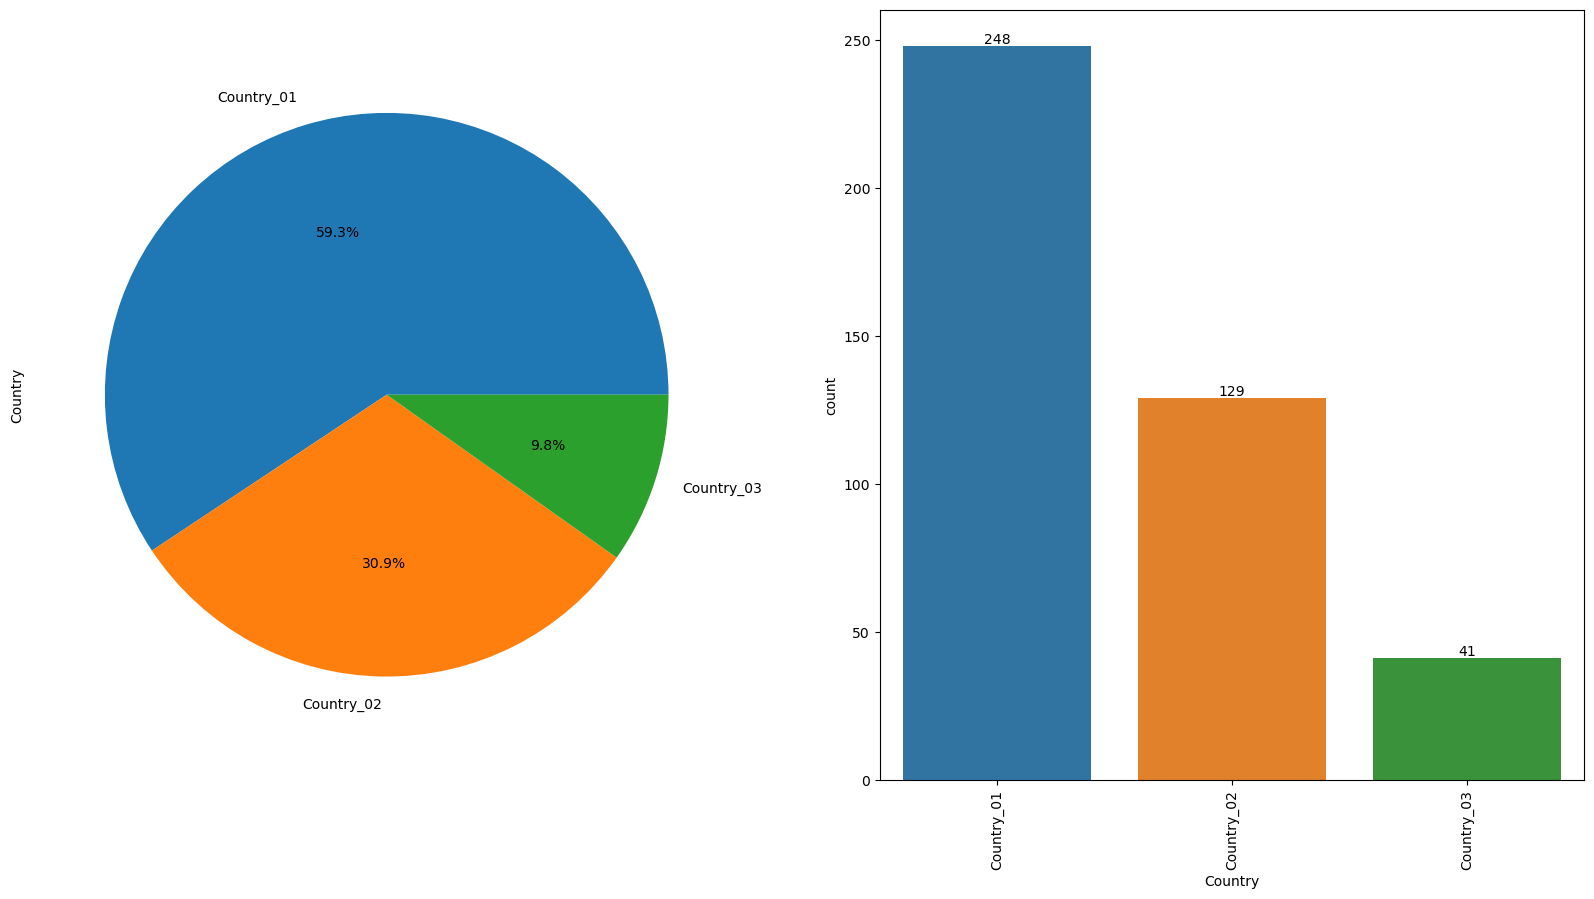

In [35]:
labeled_barplot(read_df_cpy,'Country',perc=False)

- Higher percentage of accidents almost 59% has occured in country_01
- Least percentage of accidents, 9.8% has occurred in country_03

## 2. Local

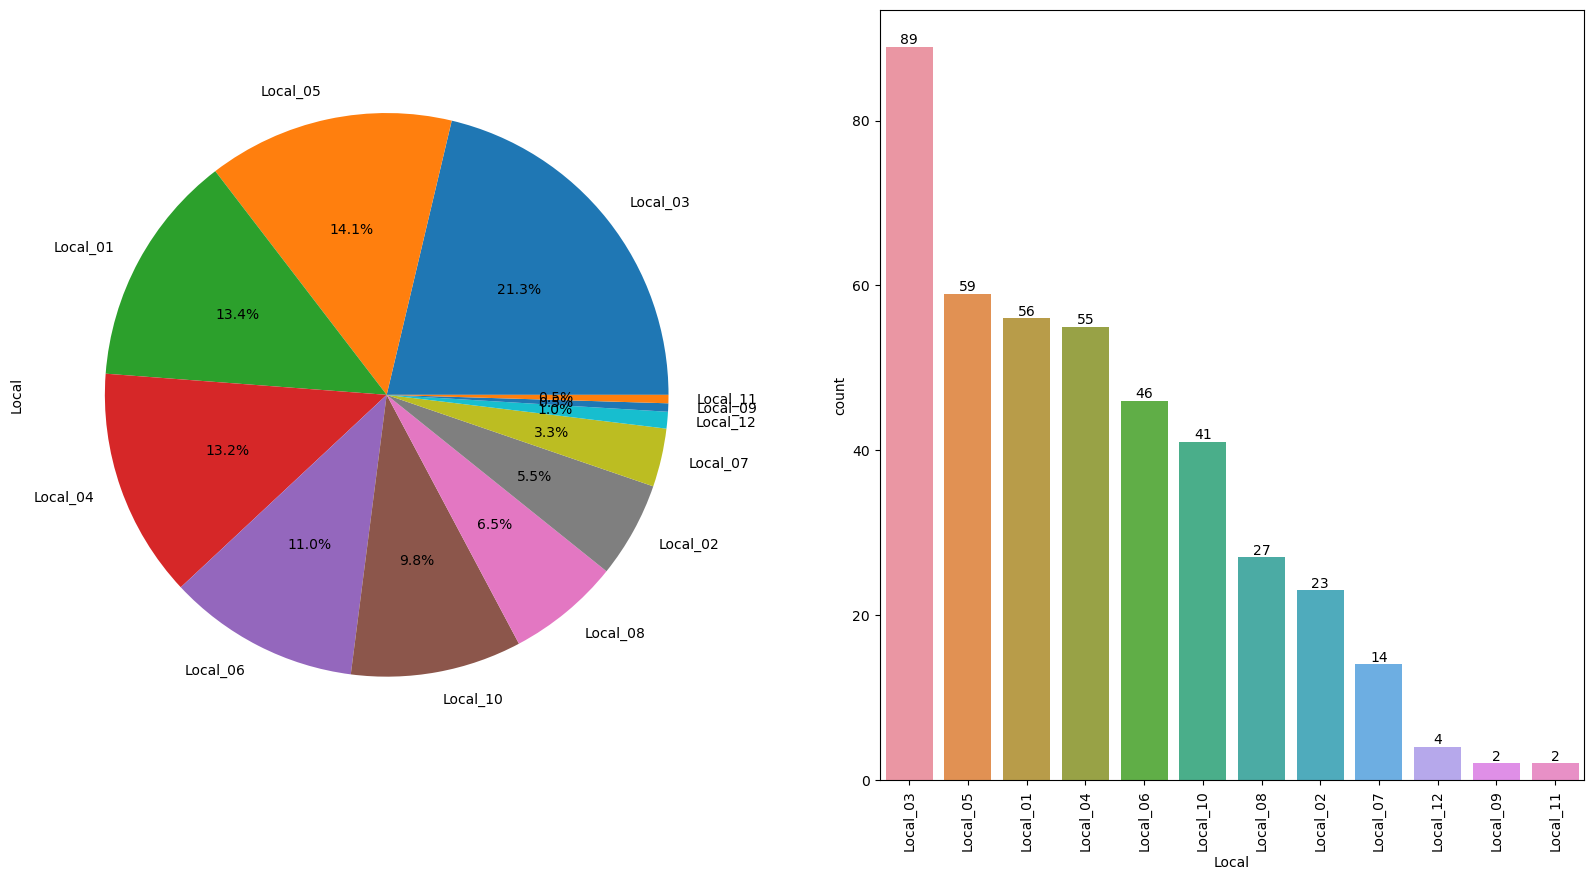

In [36]:
labeled_barplot(read_df_cpy,'Local',perc=False)

- Higher pecentage of accidents has occured in Local_03
- Second highest accident has occurred in Local_05 

### 3. Industry Sector

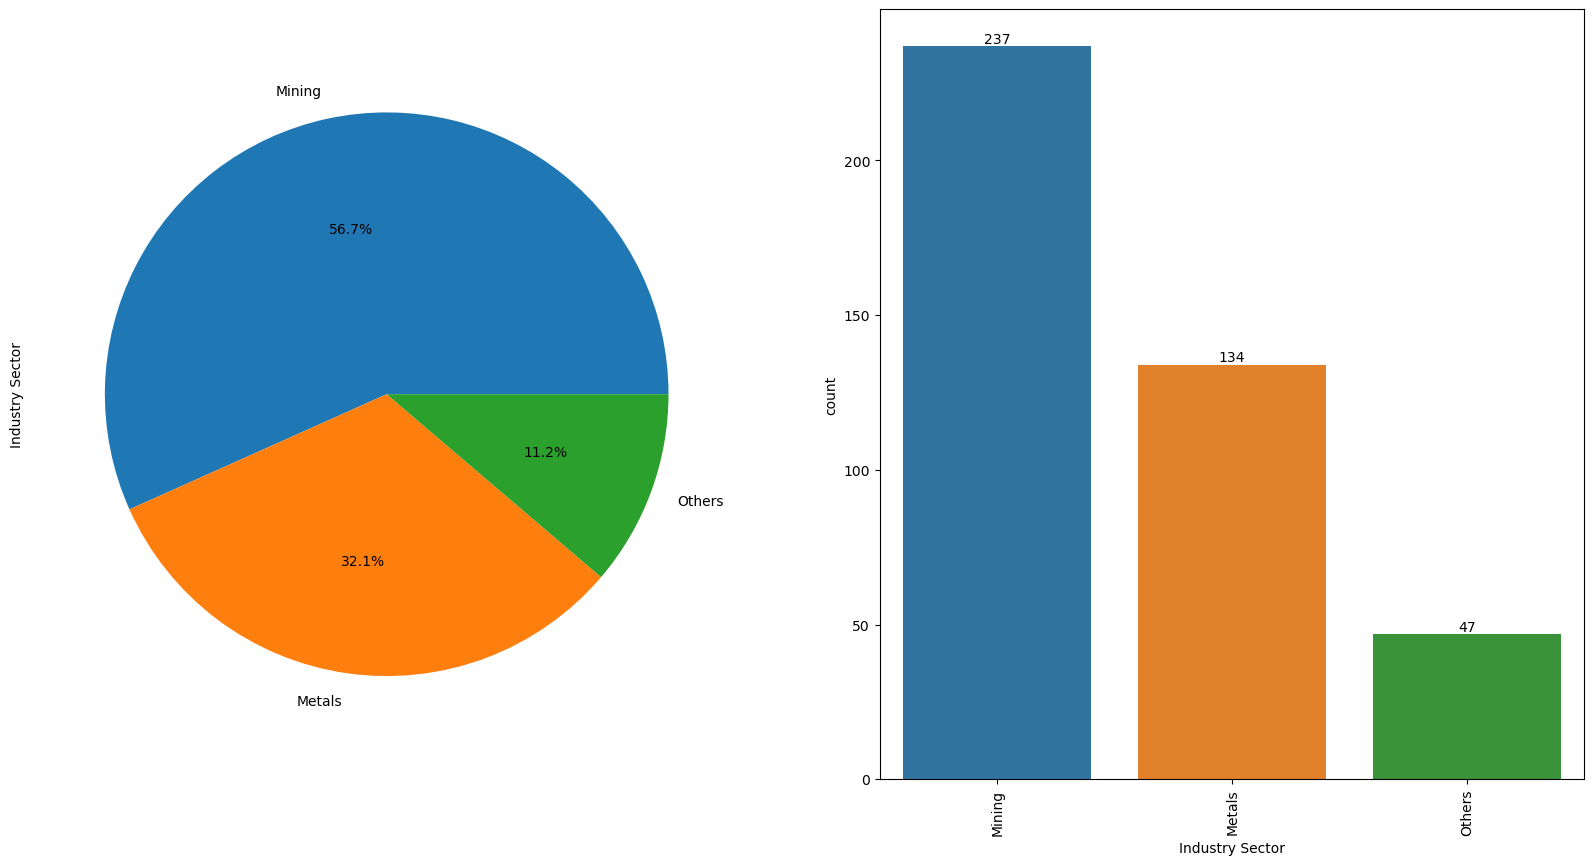

In [37]:
labeled_barplot(read_df_cpy,'Industry Sector',perc=False)

- Higher percentage, ~ 56.7% of accidents has occurred in Mining industy
- Second highest in Metals

### 4. Gender

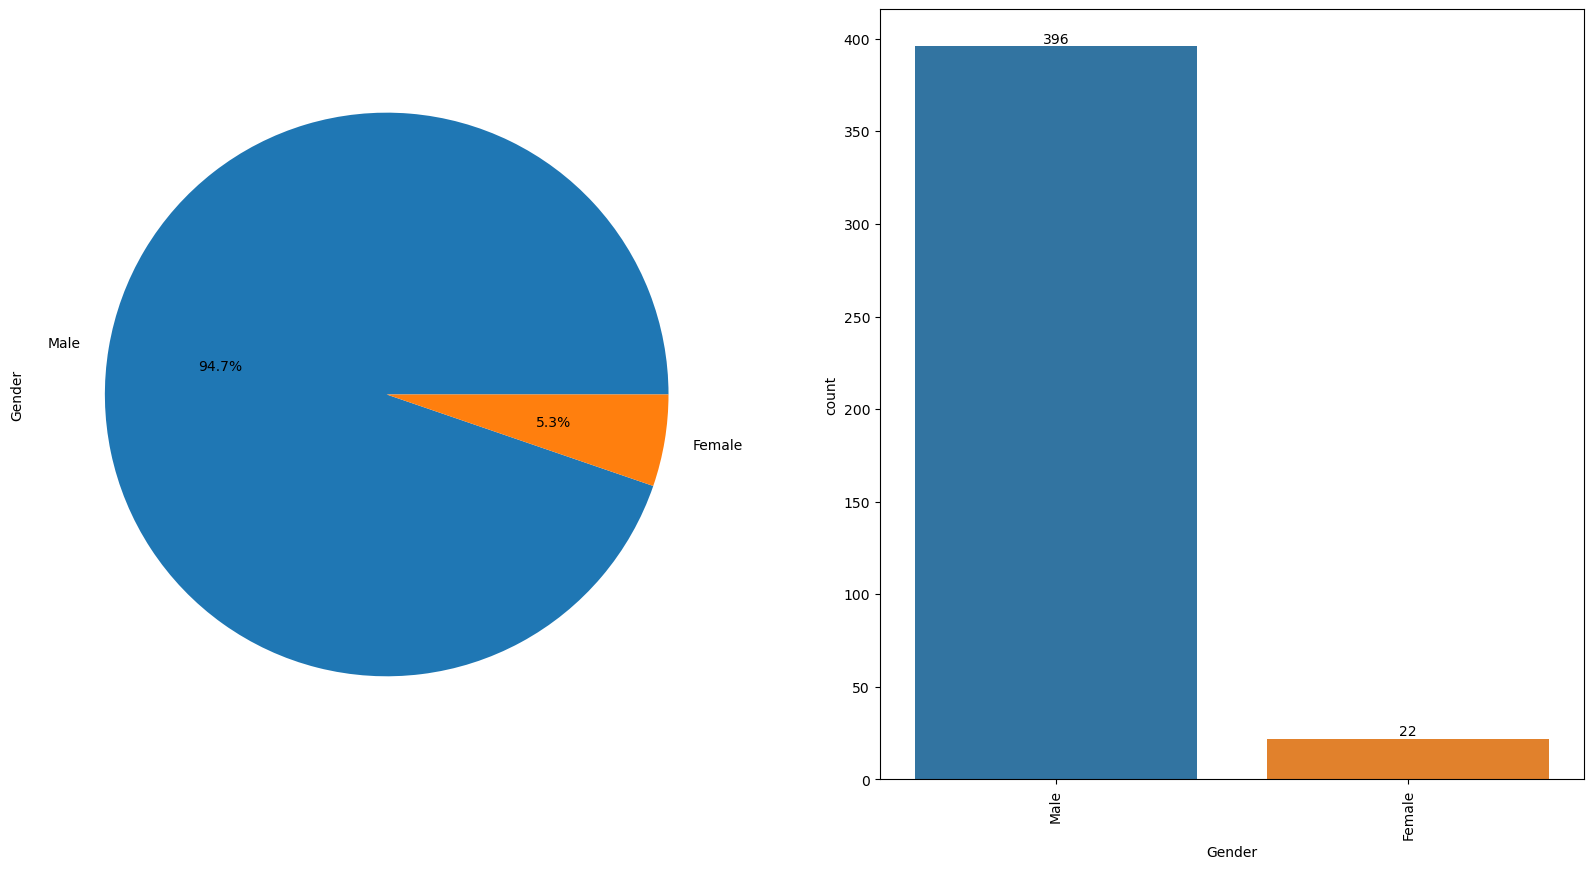

In [38]:
labeled_barplot(read_df_cpy,'Gender',perc=False)

- Men have undergone higher percentage of accidents around ~94.7%
- Women has less accident rate

### 5. Employment

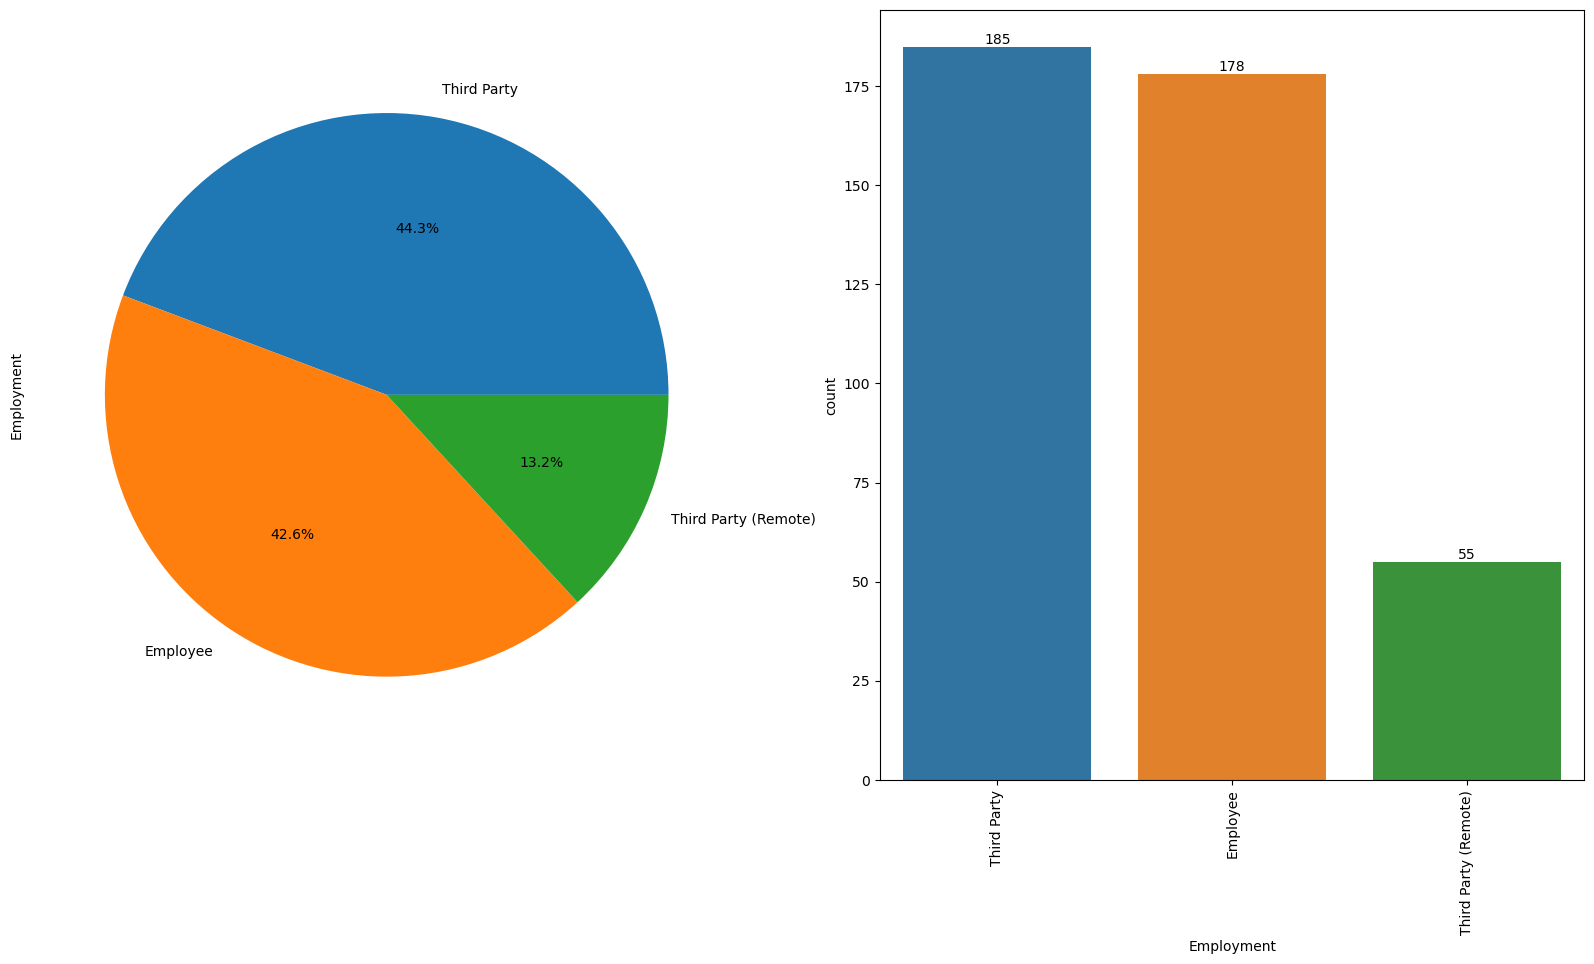

In [39]:
labeled_barplot(read_df_cpy,'Employment',perc=False)

- Employee who belongs to third party has undergone more accidents i.e about ~ 44 %
- Employee being the second accounts to ~ 42 % of the total accident rates

### 6. Year

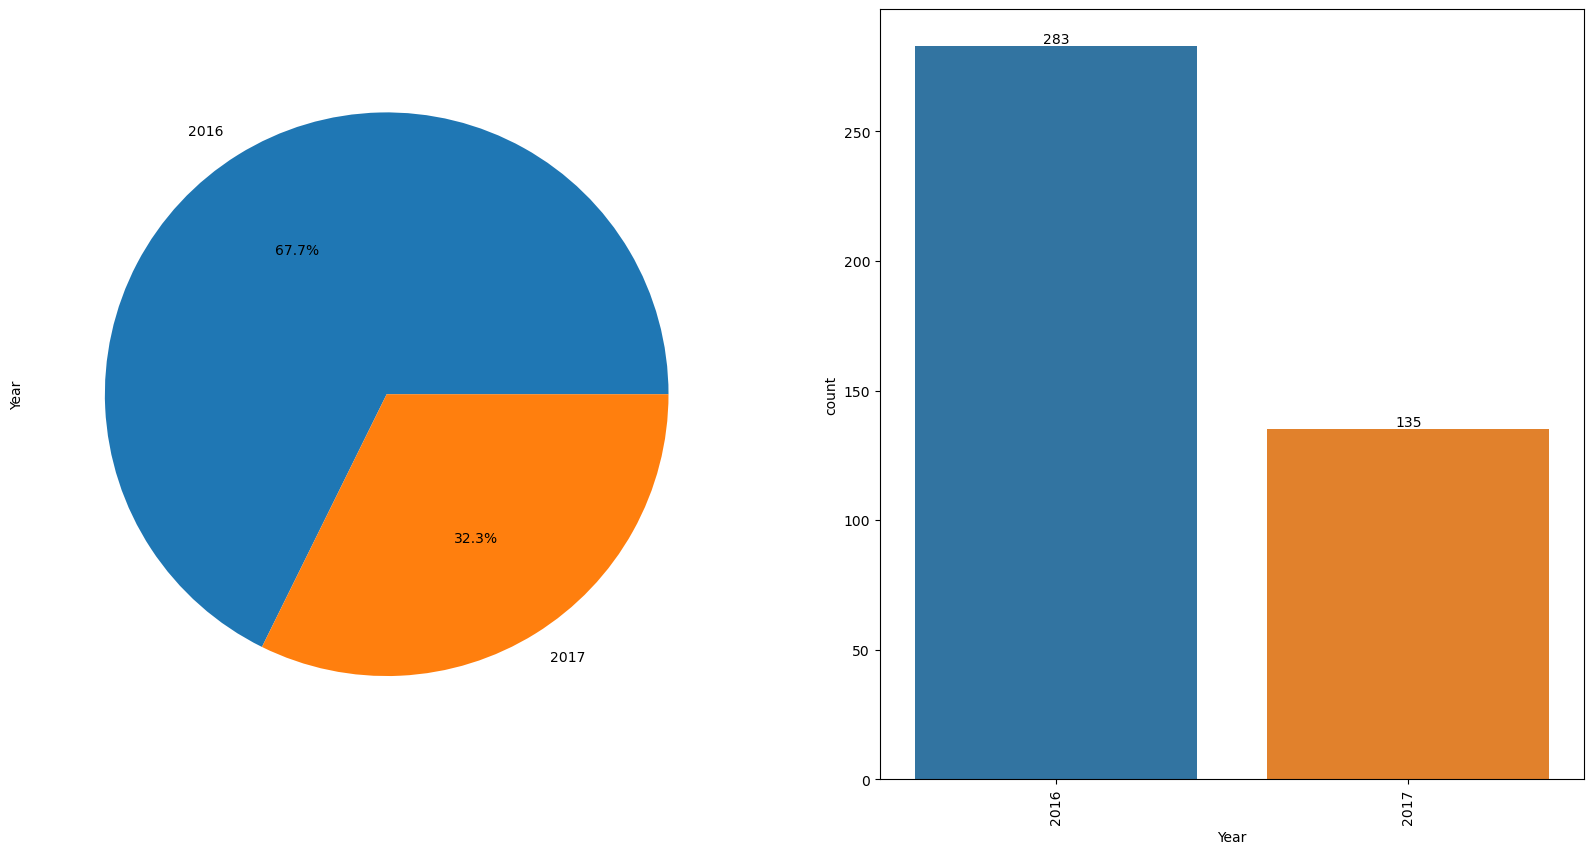

In [40]:
labeled_barplot(read_df_cpy,'Year',perc=False)

- Highest percentage of accidents has occurred in 2016, ~ 67%
- In 2017, less percentage of accidents has occurred

### 7.Month

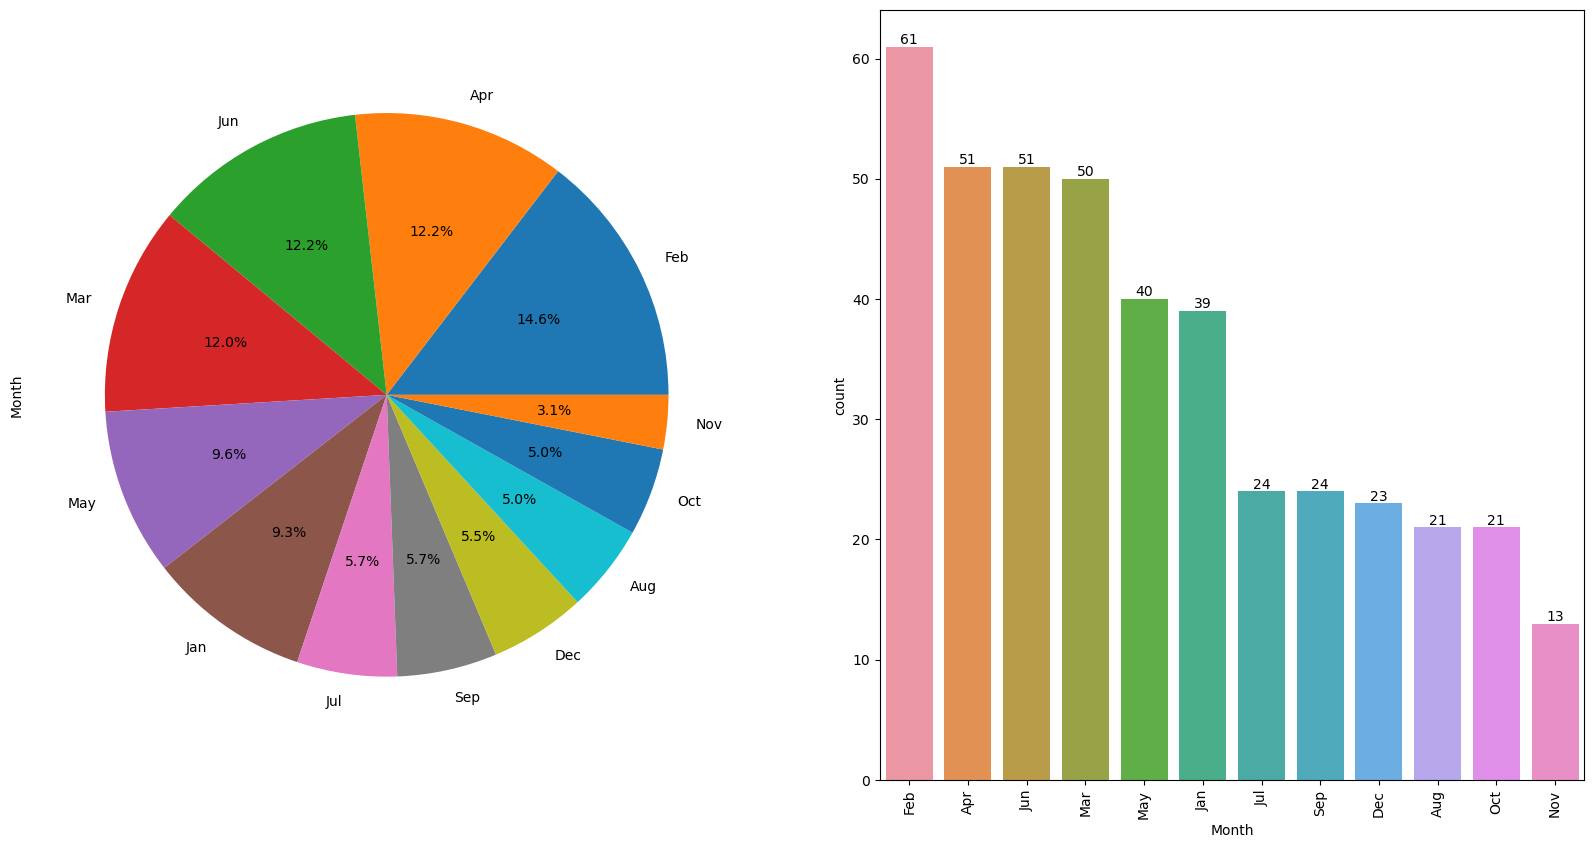

In [41]:
labeled_barplot(read_df_cpy,'Month',perc=False)

- Quite higher percente of accidents has occurred in Feb,Mar,Apr,Jun
- slight less in Jan and May
- May be more production during these months

### 8. Date

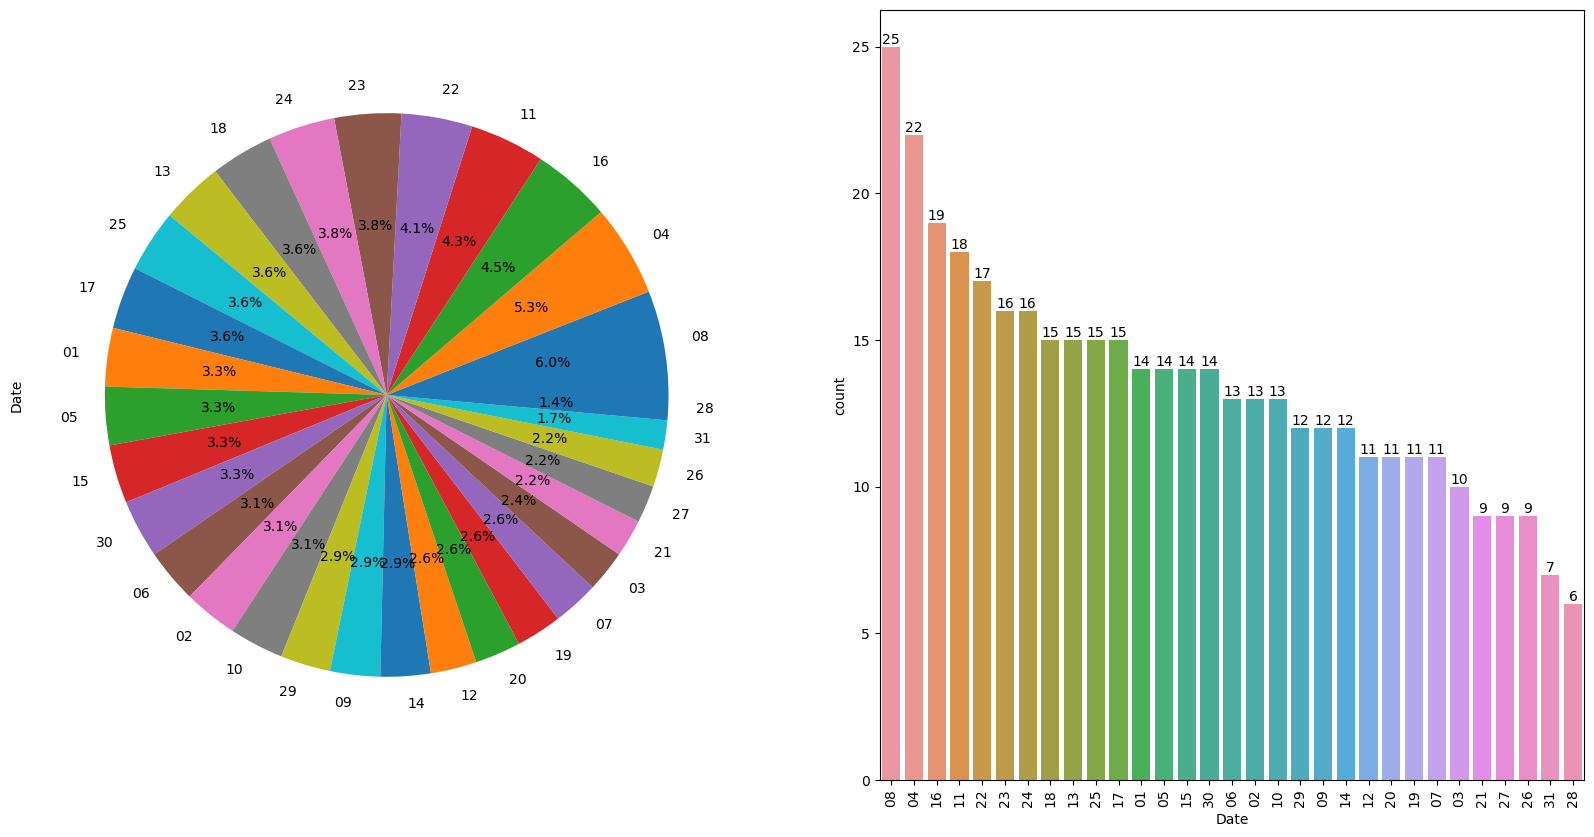

In [42]:
labeled_barplot(read_df_cpy,'Date',perc=False)

- Higher percentage of accidents on starting of the month than later

### Day of the week

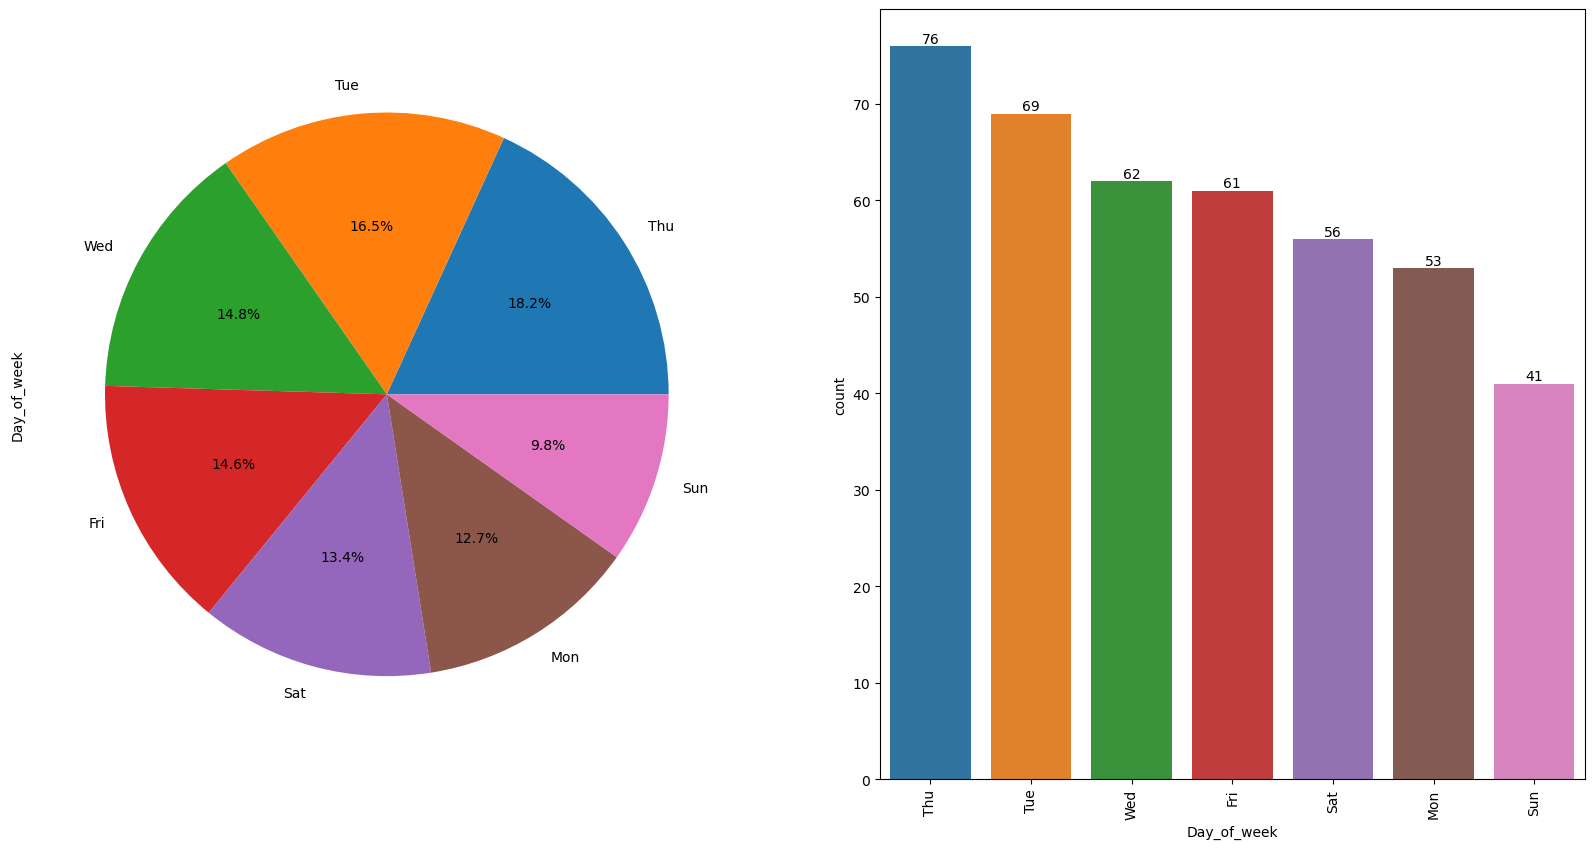

In [43]:
labeled_barplot(read_df_cpy,'Day_of_week',perc=False)

- More accidents happened during thursday and sunday being the least may be due to holiday

###  9 Critical Risk

In [44]:
ds = read_df_cpy['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

In [45]:
ds.head()

Critical Risk  count
0               Others    229
1              Pressed     24
2         Manual Tools     20
3  Chemical substances     17
4                  Cut     14

Text(0.5, 1.0, 'Top 20 Critical Risk reported...')

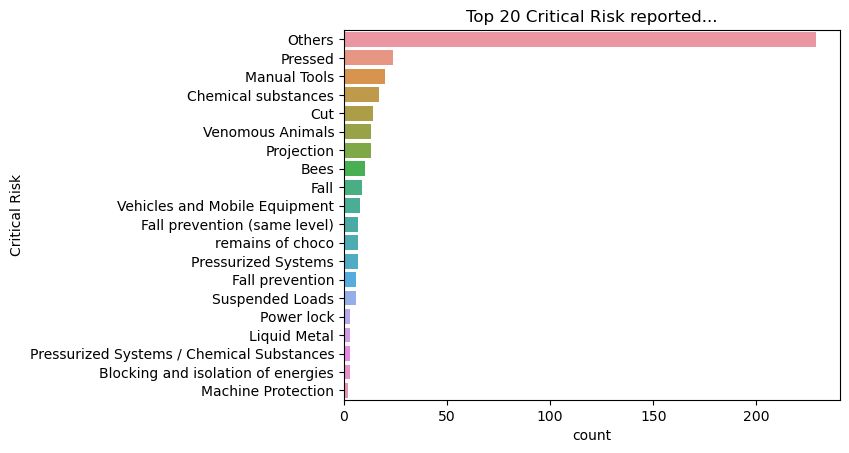

In [46]:
ds = read_df_cpy['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

sns.barplot(
    x='count', 
    y='Critical Risk', 
    data = ds.head(20)
).set_title('Top 20 Critical Risk reported...')

- Critical risk needs to further collected since mos t of the falls into other category
- Pressed is the second most critical risk reported

### 10. Accident Level

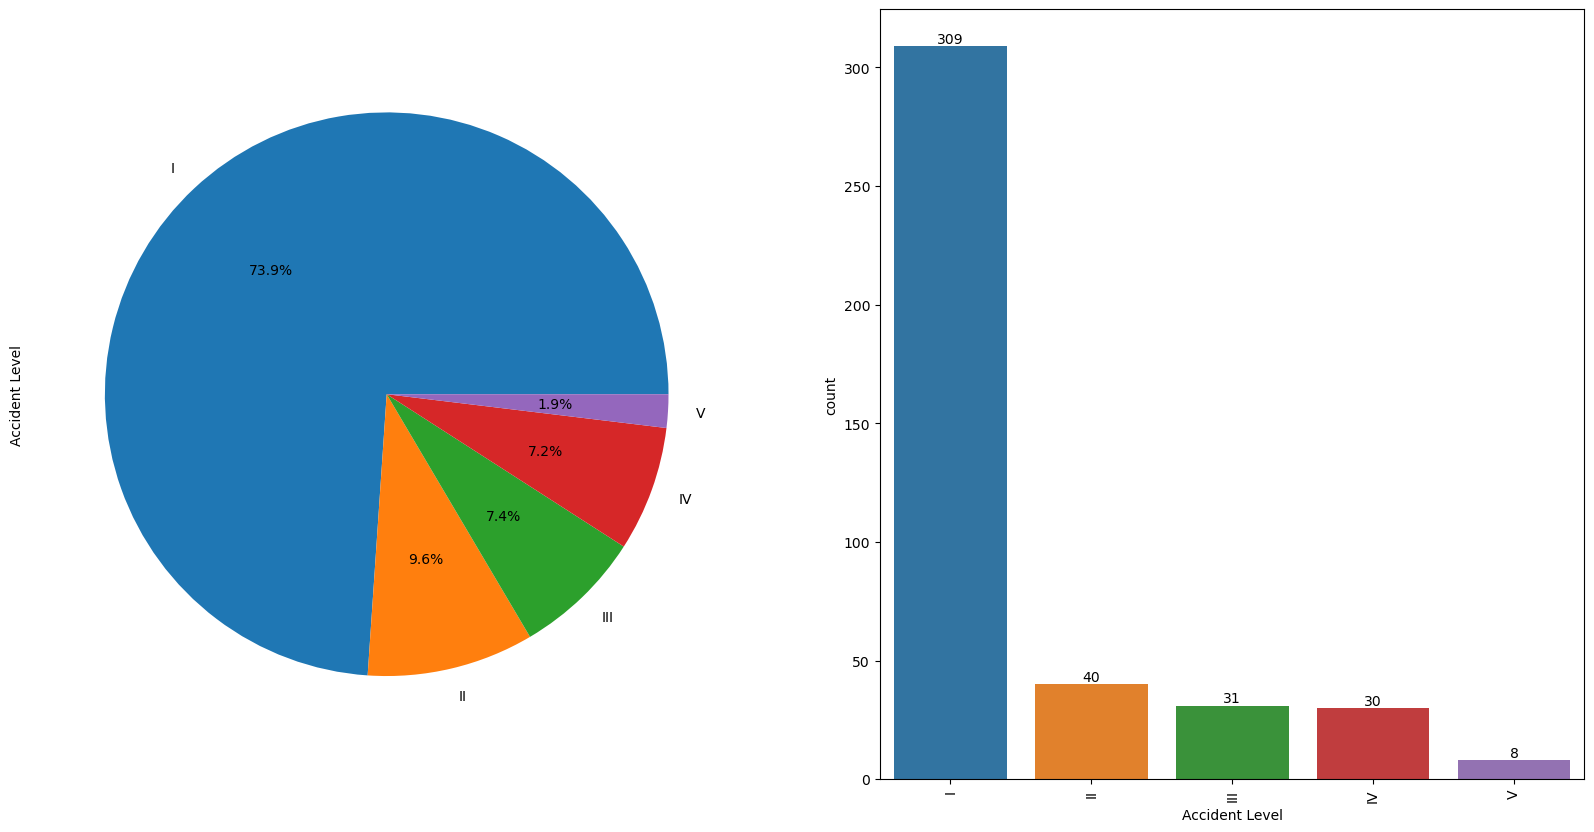

In [47]:
labeled_barplot(read_df_cpy,'Accident Level',perc=False)

- 8% of accidents were very severe considering level V as `highest severe`
- Higher no of accidents happened are less severe ~ 74 %

### 11. Potential Accident Level

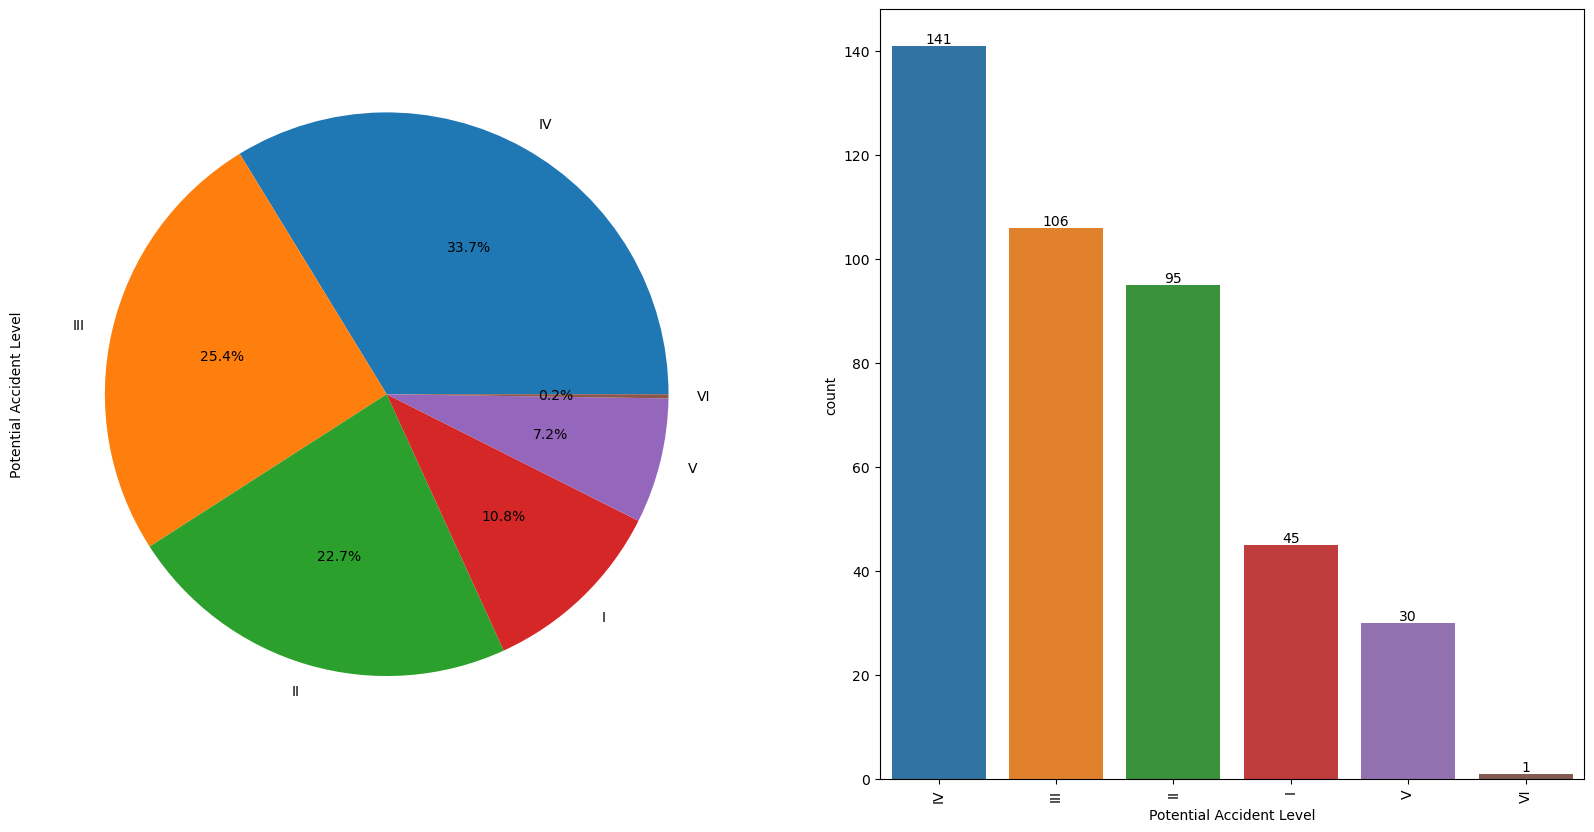

In [48]:
labeled_barplot(read_df_cpy,'Potential Accident Level',perc=False)

- Most of potential accidents are of level IV 

### Bivariate Analysis

In [49]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

### 1. Check proportion of Industry sector in different countries

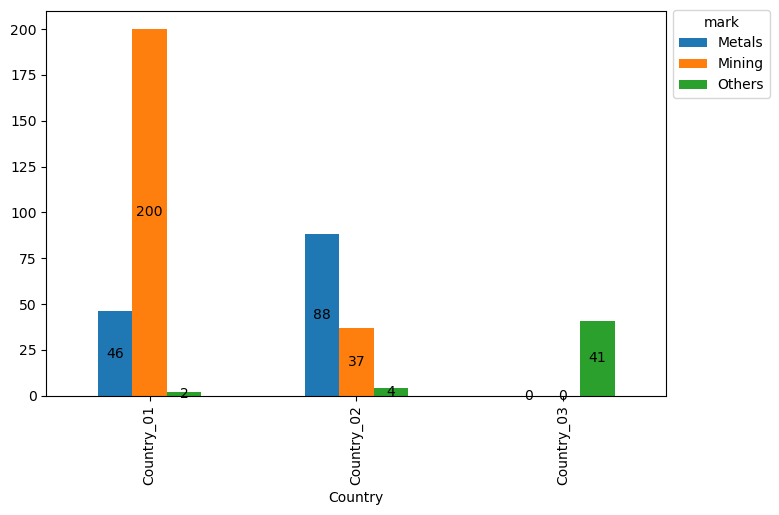

In [50]:
crosstab_feature(read_df_cpy,'Country','Industry Sector',False)

- Country_01 has highest percentage of accidents occuring is Mining industy
- Country_02 has highest percentage of accidents occurring in Metal industry
- Country_03 has highest percentage of accidents occurring in Others industry

### 2. Proportion of accident level in different coutries

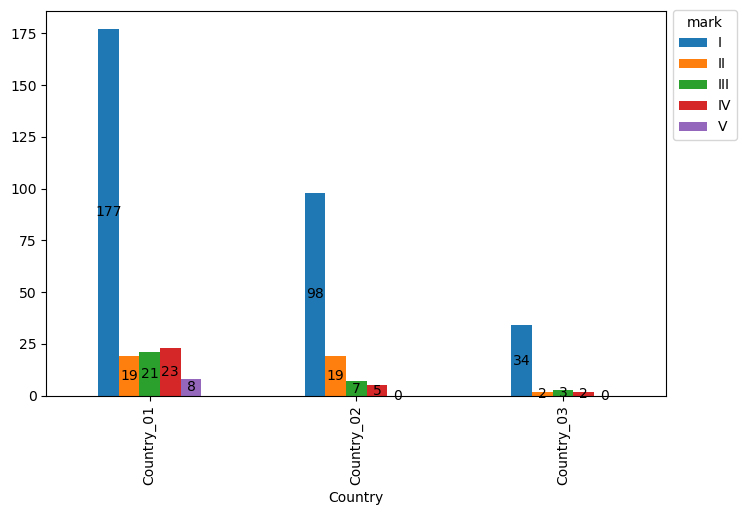

In [51]:
crosstab_feature(read_df_cpy,'Country','Accident Level',False)

- High Severe accident level of 5 has occurred in Country_01
- Low severe Level 1 and 2nd accident level has occurred in country_02
- Country 3 has lowest accidents reported

### 3. Proportion of Employment in different coutries

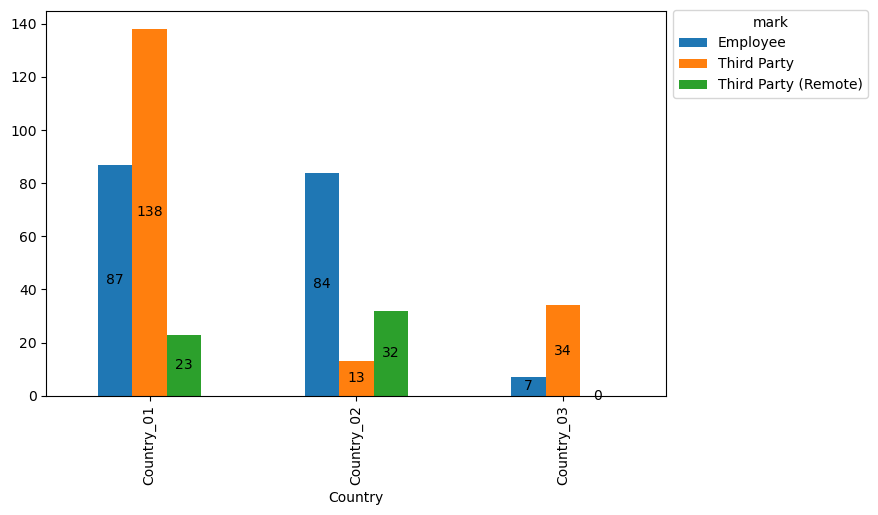

In [52]:
crosstab_feature(read_df_cpy,'Country','Employment',False)

- Third party undergoing more accidents in COuntry 1 & 3
- Employee under country 1 & Country 2 facing same accident rates

### 4. Proportion of Potential accident level in different coutries

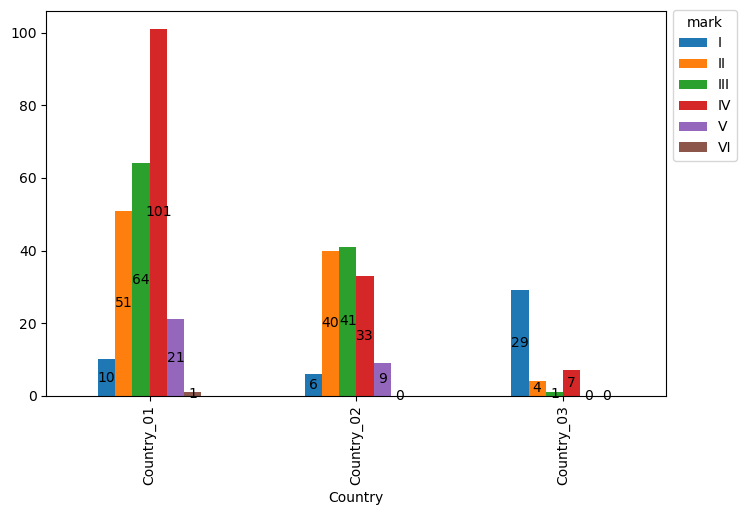

In [53]:
crosstab_feature(read_df_cpy,'Country','Potential Accident Level',False)

### 5. Potential Accident Level vs Employee Type distribution

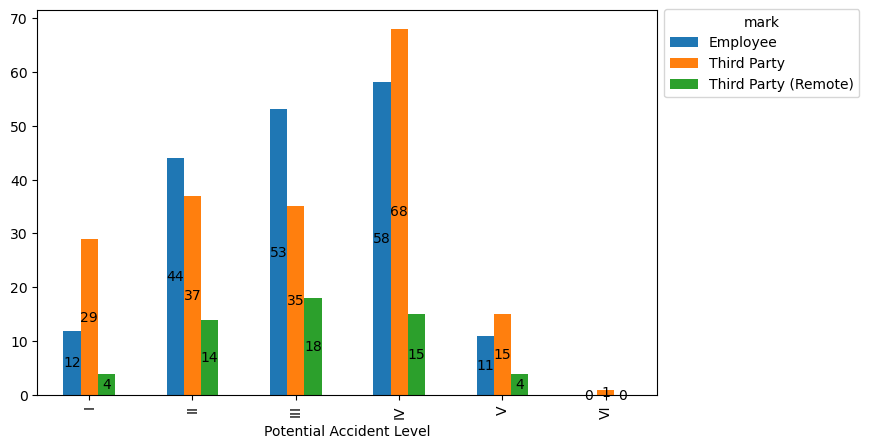

In [54]:
crosstab_feature(read_df_cpy,'Potential Accident Level','Employment',False)

### 6. Potential Accident Level vs Employee Type distribution

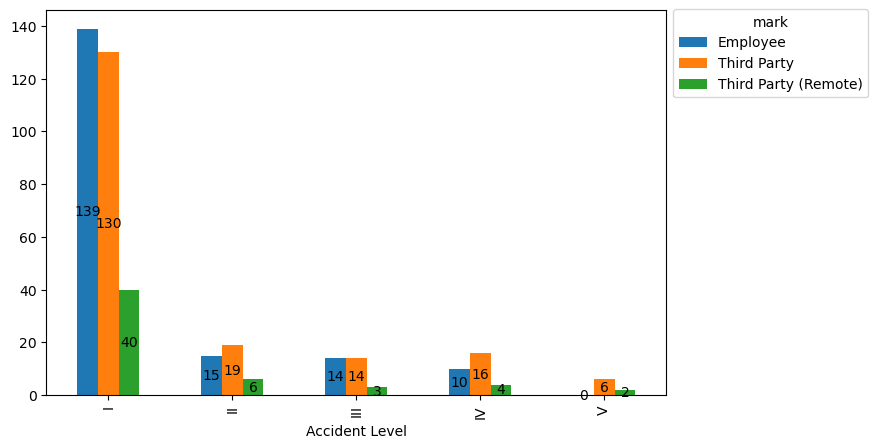

In [55]:
crosstab_feature(read_df_cpy,'Accident Level','Employment',False)

### 7. Potential Accident Level vs Employee Type distribution

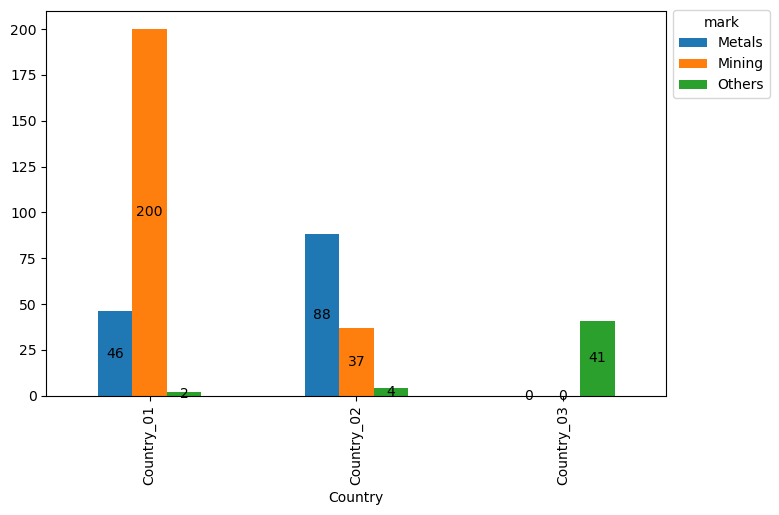

In [56]:
crosstab_feature(read_df_cpy,'Country','Industry Sector',False)

### 8. Potential Accident Level vs Employee Type distribution

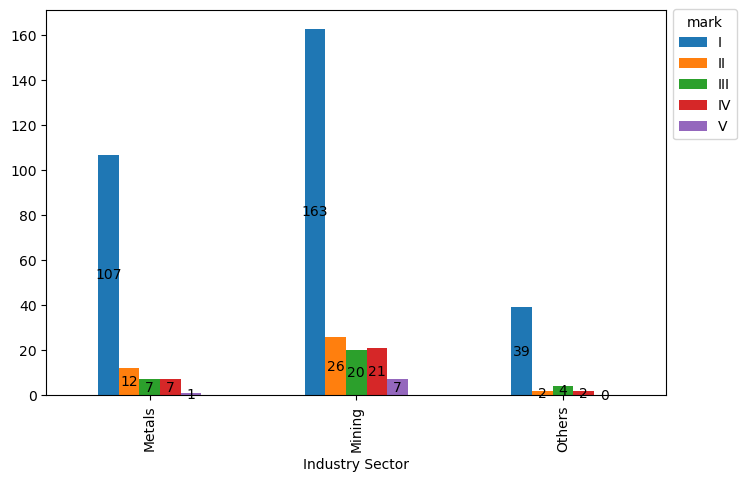

In [57]:
crosstab_feature(read_df_cpy,'Industry Sector','Accident Level',False)

- More severe accident has occurred in Mining sector
- Second most severe accident has occurred in Mining and Metals industry

### 9. Potential Accident Level in different Industry Sector

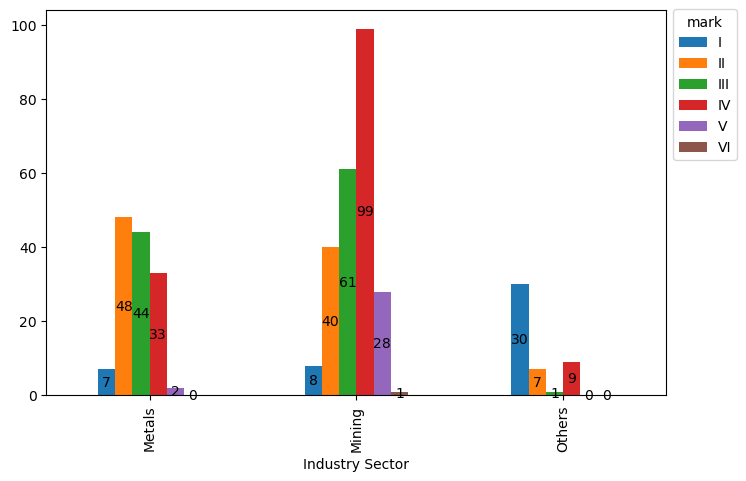

In [58]:
crosstab_feature(read_df_cpy,'Industry Sector','Potential Accident Level',False)

### 10. Accident Level vs Gender

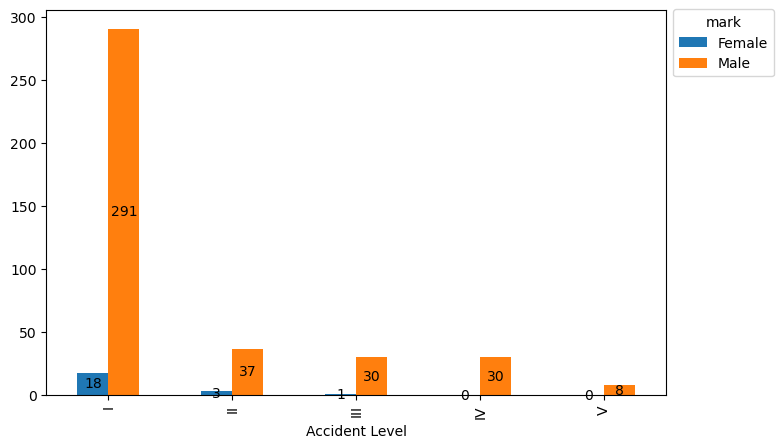

In [59]:
crosstab_feature(read_df_cpy,'Accident Level','Gender',False)

- Percentage of men in each accident level is high

### 11. Accident Level vs Year

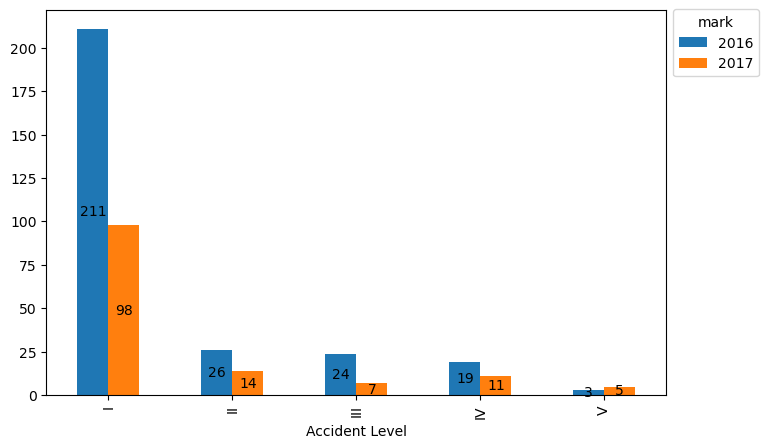

In [60]:
crosstab_feature(read_df_cpy,'Accident Level','Year',False)

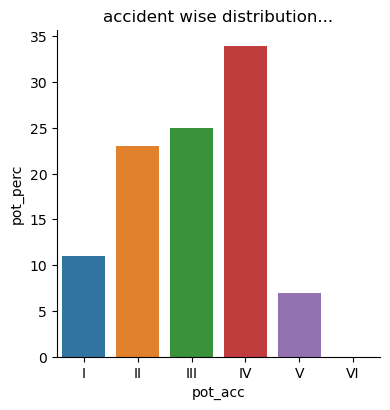

In [61]:
acc_cnt = np.round(read_df_cpy['Accident Level'].value_counts(normalize=True) * 100)
acc_cnt = pd.DataFrame({'acc':acc_cnt.index, 'perc':acc_cnt.values})
pot_acc_cnt = np.round(read_df_cpy['Potential Accident Level'].value_counts(normalize=True) * 100)
pot_acc_cnt = pd.DataFrame({'pot_acc':pot_acc_cnt.index, 'pot_perc':pot_acc_cnt.values})
acc_cnt = acc_cnt.sort_values(by=['acc'], ascending=True).reset_index(drop=True)
pot_acc = pot_acc_cnt.sort_values(by=['pot_acc'], ascending=True).reset_index(drop=True)
result = pd.concat([acc_cnt, pot_acc], axis=1, join="outer")
result.fillna(0, inplace=True)
fig = sns.catplot(
    data=result, x="pot_acc", y="pot_perc",
    kind="bar", height=4, 
).set(title='accident wise distribution...')

<AxesSubplot:xlabel='Month', ylabel='Accident Level'>

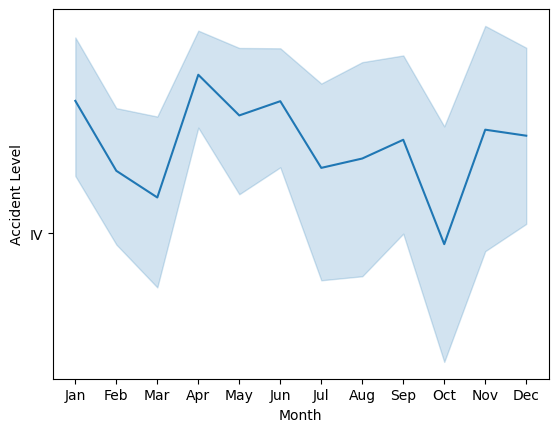

In [62]:
sns.lineplot(data=read_df_cpy, x='Month', y='Accident Level')

- October has high severity accident occurred
- May has the low severity accident occurred

#### Converting 'Accident Level' and 'Potential Accident Level' to numeric as there is an ordinal view to the variables too
#### Converting all the categorical columns to encoded 

In [63]:
read_df_cpy.drop('Date_Time',axis=1,inplace=True)

In [64]:
read_df_cpy.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender   Employment Critical Risk  \
0                       IV   Male  Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

   Year Month Date Day_of_week  
0  2016   Jan   01         Fri

In [65]:
read_df  = read_df_cpy.copy()

In [66]:
#Creating a datafrome of encoded values without description column
#Purpose of doing this is to check for correaltion between each of the features
read_df_label_encoded = pd.DataFrame()
read_df_label_encoded['Country'] = read_df_cpy['Country'].replace({'Country_01':1,'Country_02':2,'Country_03':3})
read_df_label_encoded['Local']=read_df_cpy['Local'].replace({'Local_01':1,'Local_02':2,'Local_03':3,'Local_04':4,'Local_05':5,'Local_06':6,'Local_07':7,
                            'Local_08':8,'Local_09':9,'Local_10':10,'Local_11':11, 'Local_12':12})
read_df_label_encoded['Industry Sector']=read_df_cpy['Industry Sector'].replace({'Mining':1,'Metals':2,'Others':3})
read_df_label_encoded['Accident Level'] = read_df_cpy['Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
read_df_label_encoded['Potential Accident Level'] = read_df_cpy['Potential Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
read_df_label_encoded['Gender']=read_df_cpy['Gender'].replace({'Male':1,'Female':0})
read_df_label_encoded['Employment']=read_df_cpy['Employment'].replace({'Employee': 0, 'Third Party': 1, 'Third Party (Remote)': 2})
read_df_label_encoded["Critical Risk"] = LabelEncoder().fit_transform(read_df_cpy["Critical Risk"])
read_df_label_encoded["Year"] = LabelEncoder().fit_transform(read_df_cpy["Year"])
read_df_label_encoded["Month"] = LabelEncoder().fit_transform(read_df_cpy["Month"])
read_df_label_encoded["Date"] = LabelEncoder().fit_transform(read_df_cpy["Date"])
read_df_label_encoded["Day_of_week"] = LabelEncoder().fit_transform(read_df_cpy["Day_of_week"])

In [67]:
read_df_label_encoded.head(1)

Country  Local  Industry Sector  Accident Level  Potential Accident Level  \
0        1      1                1               1                         4   

   Gender  Employment  Critical Risk  Year  Month  Date  Day_of_week  
0       1           1             20     0      4     0            0

In [68]:
read_df_label_encoded.corr()

Country     Local  Industry Sector  Accident Level  \
Country                   1.000000  0.711730         0.754804       -0.129129   
Local                     0.711730  1.000000         0.873599       -0.059122   
Industry Sector           0.754804  0.873599         1.000000       -0.132574   
Accident Level           -0.129129 -0.059122        -0.132574        1.000000   
Potential Accident Level -0.378558 -0.430469        -0.461566        0.509422   
Gender                   -0.062471 -0.164720        -0.140229        0.070741   
Employment               -0.020417 -0.068223        -0.040103        0.084475   
Critical Risk            -0.076431 -0.053254        -0.111935        0.084700   
Year                      0.083137  0.054246         0.025027        0.043065   
Month                     0.015044  0.109061         0.078415        0.066951   
Date                     -0.011298 -0.020546        -0.027668       -0.008689   
Day_of_week               0.164636  0.193116         0.168096       -0.046424   

                          Potential Accident Level    Gender  Employment  \
Country                                  -0.378558 -0.062471   -0.020417   
Local                                    -0.430469 -0.164720   -0.068223   
Industry Sector                          -0.461566 -0.140229   -0.040103   
Accident Level                            0.509422  0.070741    0.084475   
Potential Accident Level                  1.000000  0.084512   -0.016529   
Gender                                    0.084512  1.000000   -0.054238   
Employment                               -0.016529 -0.054238    1.000000   
Critical Risk                             0.125859  0.098204   -0.048025   
Year                                      0.021809 -0.020500    0.057597   
Month                                    -0.031436 -0.016158   -0.043564   
Date                                      0.004030  0.010808   -0.094203   
Day_of_week                              -0.099756 -0.048094    0.036413   

                          Critical Risk      Year     Month      Date  \
Country                       -0.076431  0.083137  0.015044 -0.011298   
Local                         -0.053254  0.054246  0.109061 -0.020546   
Industry Sector               -0.111935  0.025027  0.078415 -0.027668   
Accident Level                 0.084700  0.043065  0.066951 -0.008689   
Potential Accident Level       0.125859  0.021809 -0.031436  0.004030   
Gender                         0.098204 -0.020500 -0.016158  0.010808   
Employment                    -0.048025  0.057597 -0.043564 -0.094203   
Critical Risk                  1.000000  0.254068 -0.050284  0.051694   
Year                           0.254068  1.000000 -0.173637 -0.001982   
Month                         -0.050284 -0.173637  1.000000 -0.036981   
Date                           0.051694 -0.001982 -0.036981  1.000000   
Day_of_week                   -0.007273  0.068699  0.106753 -0.006195   

                          Day_of_week  
Country                      0.164636  
Local                        0.193116  
Industry Sector              0.168096  
Accident Level              -0.046424  
Potential Accident Level    -0.099756  
Gender                      -0.048094  
Employment                   0.036413  
Critical Risk               -0.007273  
Year                         0.068699  
Month                        0.106753  
Date                        -0.006195  
Day_of_week                  1.000000

<AxesSubplot:>

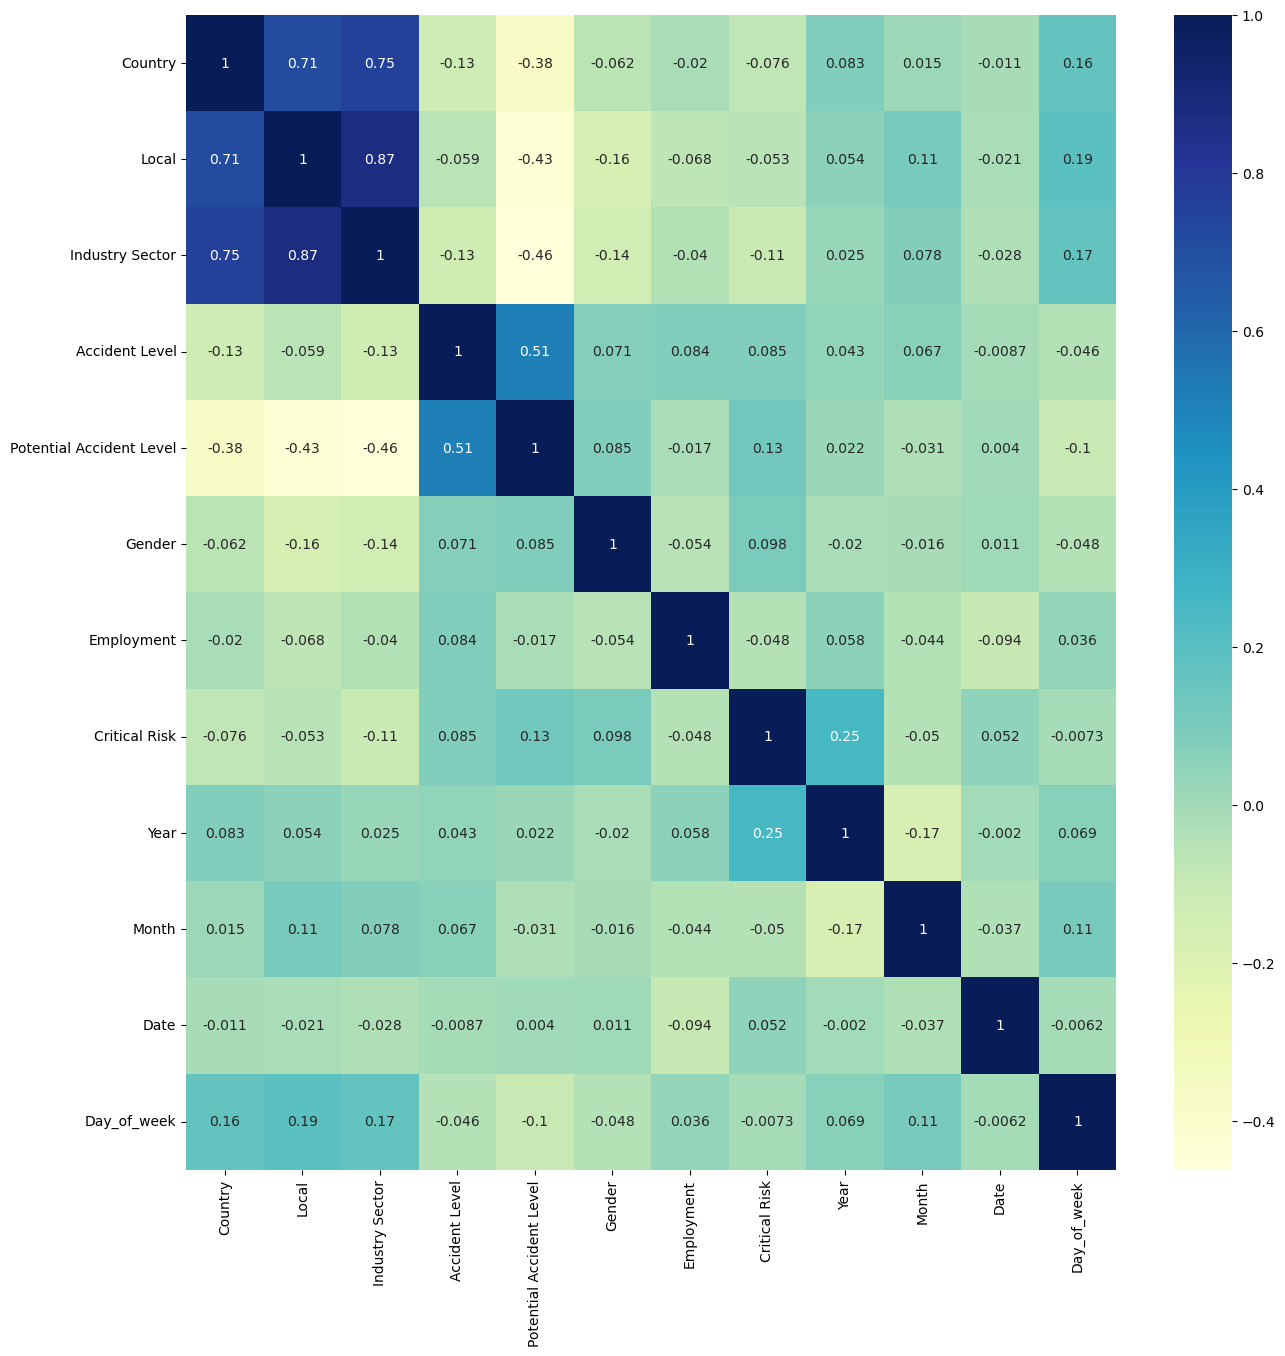

In [69]:
plt.figure(figsize=(15,15), frameon=True)
sns.heatmap(read_df_label_encoded.corr(),annot=True, cmap="YlGnBu")

In [70]:
read_df_label_encoded.corr()[["Potential Accident Level", "Accident Level"]]

Potential Accident Level  Accident Level
Country                                  -0.378558       -0.129129
Local                                    -0.430469       -0.059122
Industry Sector                          -0.461566       -0.132574
Accident Level                            0.509422        1.000000
Potential Accident Level                  1.000000        0.509422
Gender                                    0.084512        0.070741
Employment                               -0.016529        0.084475
Critical Risk                             0.125859        0.084700
Year                                      0.021809        0.043065
Month                                    -0.031436        0.066951
Date                                      0.004030       -0.008689
Day_of_week                              -0.099756       -0.046424

### Most of columns are high related with Accident level compared to Potential Accident Level.
### So choosing `Accident level` as `target`

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:
- No missing values present in dataset
- Duplicate rows (#7) are checked and removed 
- Renamed column name Data to Date and extract date part alone , Genre to Gender, Employee or Third Party to Employee Type for ease of use
- Eliminate dNon-English textual data
- 'Accident Level', 'Potential Accident Level' has roman characters which is mapped to appropriate numeric values
- more risk, accidents & potential accidents were reported in 2016
    
- Distribution of `countries`
    * 59% accidents occurred in Country_01
    * 31% accidents occurred in Country_02
    * 10% accidents occurred in Country_03
- Highest plant located in city `Local_03`
- Distribution of `Industry sector` 
    * Mining	57.0 %
    * Metals	32.0 %
    * Others	11.0 %
- Accident Level & Potential Accident Level are inversly proportinal to each other
- 95 % of dataset consits of male workers an remianing are 5 %
- More third party workers are working when seeing he  employee type distribution
    * Third Party	44.0 %
    * Employee	43.0 %
    * Third Party (Remote)	13.0 %
- Most of the risk are classified as others and hte second & third most risk is due to pressed & manual tools
- More data available for 2016 than 2017
    * 2016	68.0 %
    * 2017	32.0 %
- More accidents occurred during feb then april, may & july
- Number of accidents are high in beginning of the year and decreasing later
- Number of accidents are hihg during days 4, 8 & 16
- Country_03 has only sector - Others where as Country_01 & Country_02 has both mining & metals more than others
- proportion of employee type gender wise is not equal as mentioned earlier, sectors has more male employee than female workers
- Accident level is more frequently occurred in all type of employment
- Potential accidental level 4 is higher in all type of employment
- Most of columns are high related with Accident level compared to Potential Accident Level.So choosing `Accident level` as `target`

### 4. Eliminate Non-English textual data

### A. Eliminate All special Characters and Numbers

In [71]:
read_df_cpy.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender   Employment Critical Risk  \
0                       IV   Male  Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

   Year Month Date Day_of_week  
0  2016   Jan   01         Fri

In [72]:
read_df_cleaned_data = read_df_cpy.copy(deep=True)

In [73]:
#defining a function to plot highest frequency words
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Description'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

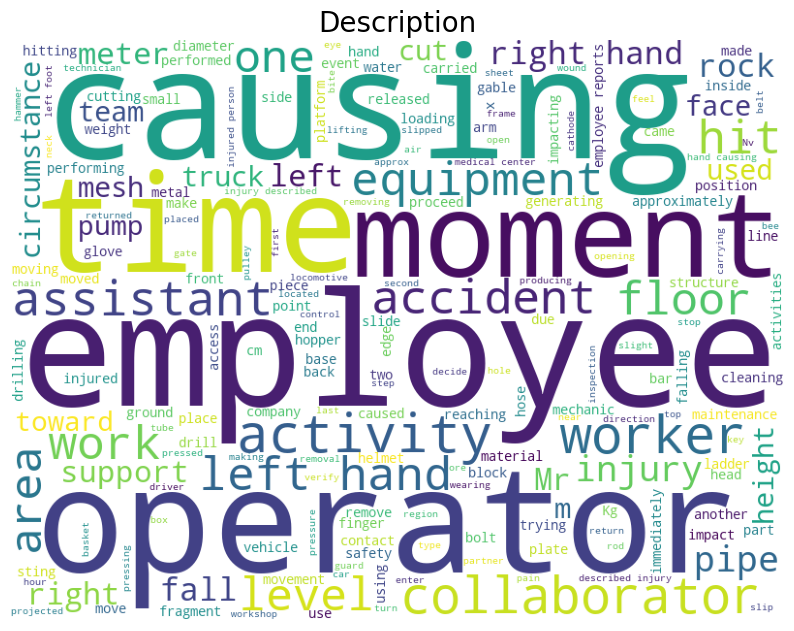

In [74]:
#Word frequency before preprocessing
show_wordcloud(read_df_cleaned_data,'Description')

- Uncleaned data has words lik Mr, Nv, x,cm, m which will not add any value to finding the target which needs to preprocessed

### Text preprocessing

In [75]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

read_df_cleaned_data['Description'] = read_df_cleaned_data['Description'].apply(lambda x: remove_numbers(x))

read_df_cleaned_data["Description"].head(1)

0    While removing the drill rod of the Jumbo  for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:

- only numbers are removed at this stage, since utls needs to be removed at later part question once that is done special characters will be removed


### B. Remove html tags

In [76]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

read_df_cleaned_data['Description'] = read_df_cleaned_data['Description'].apply(lambda x: strip_html(x))

read_df_cleaned_data["Description"].head(1)

0    While removing the drill rod of the Jumbo  for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

### C. Replace contractions in strings e.g. replace I'm --> I am) and so on

In [77]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

read_df_cleaned_data['Description'] = read_df_cleaned_data['Description'].apply(lambda x: replace_contractions(x))

read_df_cleaned_data["Description"].head(1)

0    While removing the drill rod of the Jumbo  for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

### D. Remove the URL’s

In [78]:
def remove_url(text):
  text = re.sub(r'\s*https?://\S+(\s+|$)', '', text, flags=re.MULTILINE)
  return text

read_df_cleaned_data['Description'] = read_df_cleaned_data['Description'].apply(lambda x: remove_url(x))

read_df_cleaned_data["Description"].head(1)

0    While removing the drill rod of the Jumbo  for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

### E. Remove the mentions ('@')

In [79]:
def remove_url(text):
  text = re.sub(r'\s*@\S+(\s+)', '', text, flags=re.MULTILINE)
  return text

read_df_cleaned_data['Description'] = read_df_cleaned_data['Description'].apply(lambda x: remove_url(x))

read_df_cleaned_data["Description"].head(1)

0    While removing the drill rod of the Jumbo  for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

### F. Remove the hashtags (#)

In [80]:
def remove_hash(text):
  text = re.sub(r'\s*#\S+(\s+)', ' ', text, flags=re.MULTILINE)
  return text

read_df_cleaned_data['Description'] = read_df_cleaned_data['Description'].apply(lambda x: remove_hash(x))

read_df_cleaned_data["Description"].head(1)

0    While removing the drill rod of the Jumbo  for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

### G. Remove all Stopwords 
    # H. Lowercase all textual data 
    # I. Perform tokenization, lemmatization, normalization 
    # J. Eliminate All special Characters appropriately 
    # K. Remove all non ascii characters
    # L. Lowercase of sentence
    # M. remove punctuations

In [81]:
read_df_cleaned_data['Description'] = read_df_cleaned_data.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1) # Tokenization of data

In [82]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# set custom stop-words list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))        

In [83]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

read_df_cleaned_data['Description'] = read_df_cleaned_data.apply(lambda row: normalize(row['Description']), axis=1)
read_df_cleaned_data.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender   Employment Critical Risk  \
0                       IV   Male  Third Party       Pressed   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   

   Year Month Date Day_of_week  
0  2016   Jan   01         Fri

In [84]:
read_df_cleaned_data['Description'][0]

'remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo'

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:
    
- All the below data cleaning & preprocessing steps are performed
    
        A. Eliminate All special Characters and Numbers
        B. Remove html tags
        C. Replace contractions in strings e.g. replace I'm --> I am) and so on
        D. Remove the URL’s
        E. Remove the mentions ('@')
        F. Remove the hashtags (#)
        G. Remove all Stopwords 
        H. Lowercase all textual data 
        I. Perform tokenization, lemmatization, normalization 
        J. Eliminate All special Characters appropriately 
        K. Remove all non ascii characters
        L. Lowercase of sentence
        M. remove punctuations

### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

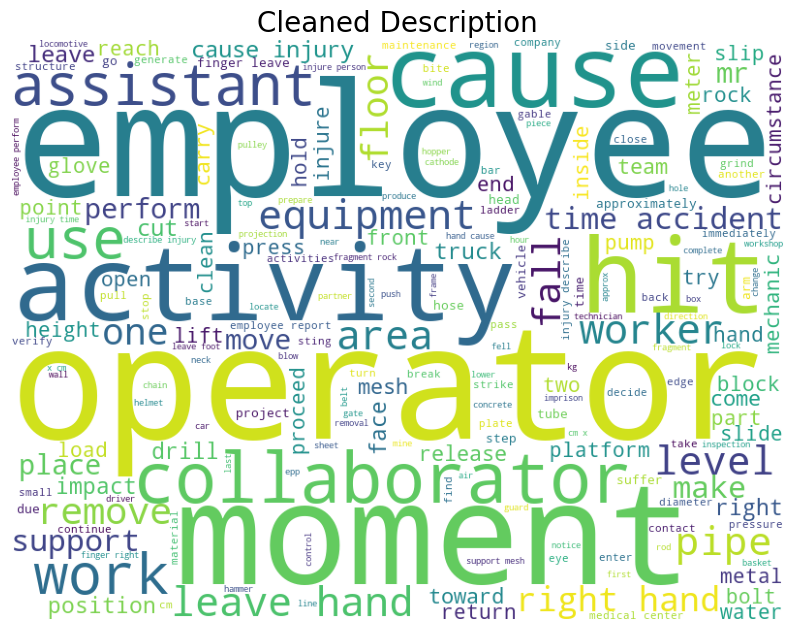

In [85]:
# Wordcloud after data preprocessing
show_wordcloud(read_df_cleaned_data,'Cleaned Description')

### Five point summary for number of words

In [86]:
wrds_df = read_df_cleaned_data['Description'].apply(lambda x: len(x.split(' ')))

In [87]:
display(wrds_df.describe().round(0).astype(int)); 

count    418
mean      33
std       16
min        9
25%       21
50%       30
75%       42
max       96
Name: Description, dtype: int32

In [88]:
print('99% quantilie: {}'.format(wrds_df.quantile(0.99)));

99% quantilie: 78.82999999999998


In [89]:
lne_df = read_df_cleaned_data['Description'].str.len()

In [90]:
print('min line length: {}'.format(lne_df.min()))
print('max line length: {}'.format(lne_df.max()))

min line length: 57
max line length: 628


In [91]:
read_df_cleaned_data.head(2)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender   Employment        Critical Risk  \
0                       IV   Male  Third Party              Pressed   
1                       IV   Male     Employee  Pressurized Systems   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

   Year Month Date Day_of_week  
0  2016   Jan   01         Fri  
1  2016   Jan   02         Sat

In [92]:
read_df_cleaned_data.to_csv("nlp_chatbot_cleaned_set.csv", index=False)

In [93]:
# read from cleaned csv

In [94]:
read_df_cleaned_data = pd.read_csv('nlp_chatbot_cleaned_set.csv')

In [95]:
read_df_cleaned_data.head(2)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender   Employment        Critical Risk  \
0                       IV   Male  Third Party              Pressed   
1                       IV   Male     Employee  Pressurized Systems   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

   Year Month  Date Day_of_week  
0  2016   Jan     1         Fri  
1  2016   Jan     2         Sat

In [96]:
 print("The number of records:", read_df_cleaned_data.shape[0]," and number of columns:",read_df_cleaned_data.shape[1],"after text preprocessing")

The number of records: 418  and number of columns: 13 after text preprocessing


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:
    
- we could see  body-related, employee related, movement-related, equipment-related and accident-related words are present in the description
    * Body-related: eye, left, right, hand, finger, face, foot
    * Employee-related: employee, operator, driver, assistant, technician
    * Movement-related: turn, push, lift, press, fell , hold, grind, carry
    * Equipment-related: equipment, ladder, hammer, pump, truck, pulley, helmet, pulley, rod
    * Accident-related: accident, activity, injure, impact
   etc.,
    
- Sentence / words summary:
    * Minimum line length: 57
    * Maximum line length: 628
    * Minimum number of words: 9
    * Maximum number of words: 96

## <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

In [97]:
read_df_dummy_encoding = read_df_cleaned_data.copy(deep = True)

In [98]:
read_df_dummy_encoding.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender   Employment Critical Risk  \
0                       IV   Male  Third Party       Pressed   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   

   Year Month  Date Day_of_week  
0  2016   Jan     1         Fri

In [99]:
# For model building purpose, we need to create dummy variables for few of the columns and change the roman values 
# of accidental leve and potentional accidental level
# Need to make sure the uniques values are exists for Employment and Critical Risk columns

In [100]:
# Removing the space with _ for Employment and Critical Risk columns
read_df_dummy_encoding['Employment'] = read_df_dummy_encoding['Employment'].str.replace(' ', '_')
read_df_dummy_encoding['Critical Risk'] = read_df_dummy_encoding['Critical Risk'].str.replace(' ', '_')

In [101]:
#Coverting the roman values of Accident Level and Potential Accident level
read_df_dummy_encoding['Accident Level'] = read_df_dummy_encoding['Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
read_df_dummy_encoding['Potential Accident Level'] = read_df_dummy_encoding['Potential Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
label = read_df_dummy_encoding['Accident Level'].astype('category')

In [102]:
Country_dummies = pd.get_dummies(read_df_dummy_encoding['Country'], columns=["Country"], drop_first=False)
Local_dummies = pd.get_dummies(read_df_dummy_encoding['Local'], columns=["Local"], drop_first=False)
IS_dummies = pd.get_dummies(read_df_dummy_encoding['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=False)
Gender_dummies = pd.get_dummies(read_df_dummy_encoding['Gender'], columns=["Gender"], drop_first=False)
EmpType_dummies = pd.get_dummies(read_df_dummy_encoding['Employment'], columns=['Employment'], prefix='EmpType', drop_first=False)
CR_dummies = pd.get_dummies(read_df_dummy_encoding['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=False)

In [103]:
from sklearn.preprocessing import LabelEncoder  
read_df_dummy_encoding["Potential Accident Level"] = LabelEncoder().fit_transform(read_df_dummy_encoding["Potential Accident Level"])
read_df_dummy_encoding["Year"] = LabelEncoder().fit_transform(read_df_dummy_encoding["Year"])
read_df_dummy_encoding["Month"] = LabelEncoder().fit_transform(read_df_dummy_encoding["Month"])
read_df_dummy_encoding["Date"] = LabelEncoder().fit_transform(read_df_dummy_encoding["Date"])
read_df_dummy_encoding["Day_of_week"] = LabelEncoder().fit_transform(read_df_dummy_encoding["Day_of_week"])

In [ ]:
# Merge the above dataframe with the original df 
read_df_dummy_encoding = read_df_dummy_encoding.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))
read_df_dummy_encoding = read_df_dummy_encoding.drop(columns=["Country", "Local", "Industry Sector","Gender", "Employment", "Critical Risk"])

In [104]:
read_df_dummy_encoding.head(1)

Country     Local Industry Sector  Accident Level  \
0  Country_01  Local_01          Mining               1   

   Potential Accident Level Gender   Employment Critical Risk  \
0                         3   Male  Third_Party       Pressed   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   

   Year  Month  Date  Day_of_week  
0     0      4     0            0

### Dummy variables encoding

In [526]:
get_missing_cols(read_df_dummy_encoding, read_df_dummy_encoding.columns)

missing perc for col Accident Level is 0.000000 %
missing perc for col Potential Accident Level is 0.000000 %
missing perc for col Description is 0.000000 %
missing perc for col Year is 0.000000 %
missing perc for col Month is 0.000000 %
missing perc for col Date is 0.000000 %
missing perc for col Day_of_week is 0.000000 %
missing perc for col Country_01 is 0.000000 %
missing perc for col Country_02 is 0.000000 %
missing perc for col Country_03 is 0.000000 %
missing perc for col Local_01 is 0.000000 %
missing perc for col Local_02 is 0.000000 %
missing perc for col Local_03 is 0.000000 %
missing perc for col Local_04 is 0.000000 %
missing perc for col Local_05 is 0.000000 %
missing perc for col Local_06 is 0.000000 %
missing perc for col Local_07 is 0.000000 %
missing perc for col Local_08 is 0.000000 %
missing perc for col Local_09 is 0.000000 %
missing perc for col Local_10 is 0.000000 %
missing perc for col Local_11 is 0.000000 %
missing perc for col Local_12 is 0.000000 %
missing p

### 1.TfidfVectorizer with Random forest classifier

#### Creation tfidf vector for Description

In [527]:
from sklearn.feature_extraction.text import TfidfVectorizer
#### a) TfidfVectorizer to convert text data to numbers
vectorizer = TfidfVectorizer(max_features=10)
description_ifidf = vectorizer.fit_transform(read_df_dummy_encoding['Description'])
description_ifidf = description_ifidf.toarray()
#Creating dataframe of description_ifidf
description_ifidf = pd.DataFrame(description_ifidf, columns=["TFIDF_" + n for n in vectorizer.get_feature_names_out()])
description_ifidf.head(5)

TFIDF_cause  TFIDF_employee  TFIDF_hand  TFIDF_hit  TFIDF_injury  \
0     0.000000             0.0    1.000000   0.000000      0.000000   
1     0.000000             0.0    0.000000   0.000000      0.000000   
2     0.285557             0.0    0.315379   0.771510      0.362326   
3     0.268698             0.0    0.593517   0.362979      0.340933   
4     0.419603             0.0    0.000000   0.566835      0.532408   

   TFIDF_leave  TFIDF_operator  TFIDF_right  TFIDF_time  TFIDF_use  
0     0.000000             0.0     0.000000         0.0        0.0  
1     0.000000             0.0     0.000000         0.0        1.0  
2     0.304115             0.0     0.000000         0.0        0.0  
3     0.572320             0.0     0.000000         0.0        0.0  
4     0.000000             0.0     0.468159         0.0        0.0

In [528]:
data_features = read_df_dummy_encoding.drop(columns = ['Description'])
data_features.head(3)

Accident Level  Potential Accident Level  Year  Month  Date  Day_of_week  \
0               1                         3     0      4     0            0   
1               1                         3     0      4     1            2   
2               1                         2     0      4     5            6   

   Country_01  Country_02  Country_03  Local_01  ...  CR_Projection  \
0        True       False       False      True  ...          False   
1       False        True       False     False  ...          False   
2        True       False       False     False  ...          False   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                  False                False                       False   
1                  False                False                       False   
2                  False                False                       False   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                       False               False       False   
1                       False               False       False   
2                       False               False       False   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                             False                False                False  
1                             False                False                False  
2                             False                False                False  

[3 rows x 62 columns]

In [529]:
data_features_ifidf = data_features.join(description_ifidf.reset_index(drop=True))
data_features_ifidf.head(5)

Accident Level  Potential Accident Level  Year  Month  Date  Day_of_week  \
0               1                         3     0      4     0            0   
1               1                         3     0      4     1            2   
2               1                         2     0      4     5            6   
3               1                         0     0      4     7            0   
4               4                         3     0      4     9            3   

   Country_01  Country_02  Country_03  Local_01  ...  TFIDF_cause  \
0        True       False       False      True  ...     0.000000   
1       False        True       False     False  ...     0.000000   
2        True       False       False     False  ...     0.285557   
3        True       False       False     False  ...     0.268698   
4        True       False       False     False  ...     0.419603   

   TFIDF_employee  TFIDF_hand  TFIDF_hit  TFIDF_injury  TFIDF_leave  \
0             0.0    1.000000   0.000000      0.000000     0.000000   
1             0.0    0.000000   0.000000      0.000000     0.000000   
2             0.0    0.315379   0.771510      0.362326     0.304115   
3             0.0    0.593517   0.362979      0.340933     0.572320   
4             0.0    0.000000   0.566835      0.532408     0.000000   

   TFIDF_operator  TFIDF_right  TFIDF_time  TFIDF_use  
0             0.0     0.000000         0.0        0.0  
1             0.0     0.000000         0.0        1.0  
2             0.0     0.000000         0.0        0.0  
3             0.0     0.000000         0.0        0.0  
4             0.0     0.468159         0.0        0.0  

[5 rows x 72 columns]

#### tf-idf vetorization performed on column 'Description' 

### Print Performance Metrics User defined functions

In [530]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score

In [531]:
# function to draw confusion matrix 
def bulid_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5])
    # constructing dataframe of confusion matrix
    df_cm = pd.DataFrame(cm, index =   [i for i in ['Actual 1','Actual 2','Actual 3','Actual 4','Actual 5']],
                         columns = [i for i in ['Predicted 1','Predicted 2','Predicted 3','Predicted 4','Predicted 5']])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentage = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_counts,group_percentage)]
    labels = np.asarray(labels).reshape(5,5)
    plt.figure(figsize=(10,6))
    sns.heatmap(df_cm,annot=labels,fmt ='', cmap="YlGnBu")
    

In [134]:
# function to draw classification report
def bulid_classification_report(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test,y_pred))

In [533]:
def get_metric_score(train_pred,test_pred,y_train,y_test):
    score_list = []
    #finding accuracy of the model
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_test,test_pred)
    #finding the recall of the model
    train_recall = recall_score(y_train,train_pred, average='micro')
    test_recall = recall_score(y_test,test_pred, average='micro')
    #finging the precisition of the model
    train_precision =precision_score(y_train,train_pred, average='micro')
    test_precision =  precision_score(y_test,test_pred, average='micro')
    
    score_list.extend((train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision))
    
#     print("Accuray of training set   :",train_accuracy)
#     print("Accuray of test set       :",test_accuracy)
#     print("Recall of training set    :",train_recall)
#     print("Recall of test set        :",test_recall)
#     print("Precision of training set :",train_precision)
#     print("Precision of test set     :",test_precision)
    return score_list

In [534]:
###Distribution of Accident level
print("Original data, percentage of Accident Level 1  :{0} ({1:0.2f}%)".format(len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 1]), (len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 1])/len(data_features_ifidf.index)) * 100))
print("Original data, percentage of Accident Level 2  :{0} ({1:0.2f}%)".format(len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 2]), (len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 2])/len(data_features_ifidf.index)) * 100))
print("Original data, percentage of Accident Level 3  :{0} ({1:0.2f}%)".format(len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 3]), (len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 3])/len(data_features_ifidf.index)) * 100))
print("Original data, percentage of Accident Level 4  :{0} ({1:0.2f}%)".format(len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 4]), (len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 4])/len(data_features_ifidf.index)) * 100))
print("Original data, percentage of Accident Level 5  :{0} ({1:0.2f}%)".format(len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 5]), (len(data_features_ifidf.loc[data_features_ifidf['Accident Level'] == 5])/len(data_features_ifidf.index)) * 100))

Original data, percentage of Accident Level 1  :309 (73.92%)
Original data, percentage of Accident Level 2  :40 (9.57%)
Original data, percentage of Accident Level 3  :31 (7.42%)
Original data, percentage of Accident Level 4  :30 (7.18%)
Original data, percentage of Accident Level 5  :8 (1.91%)


In [538]:
X_features_tfidf = data_features_ifidf.drop(['Accident Level'],axis=1)
y_feature = data_features_ifidf['Accident Level']

In [539]:
#### b) Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_features_tfidf, label, test_size=0.3, random_state=42, stratify=label)

In [540]:
print("The count of training records      :",len(X_train))
print("The count of train label records    :",len(y_train))
print("The count of test records          :",len(X_test))
print("The count of test label records    :",len(y_test))
print("The percentage of training records :",len(X_train)/len(X_features_tfidf)*100,"%")
print("The percentage of test records     :",len(X_test)/len(X_features_tfidf)*100,"%")

The count of training records      : 292
The count of train label records    : 292
The count of test records          : 126
The count of test label records    : 126
The percentage of training records : 69.85645933014354 %
The percentage of test records     : 30.14354066985646 %


In [541]:
print("Training data percentage of Accident Level 1: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training data percentage of Accident Level 2: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2])/len(y_train)) * 100))
print("Training data percentage of Accident Level 3: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 3]), (len(y_train[y_train[:] == 3])/len(y_train)) * 100))
print("Training data percentage of Accident Level 4: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 4]), (len(y_train[y_train[:] == 4])/len(y_train)) * 100))
print("Training data percentage of Accident Level 5: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 5]), (len(y_train[y_train[:] == 5])/len(y_train)) * 100))
print('--'*30)
print("Test data percentage of Accident Level 1: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test data percentage of Accident Level 2: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test[:] == 2])/len(y_test)) * 100))
print("Test data percentage of Accident Level 3: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 3]), (len(y_test[y_test[:] == 3])/len(y_test)) * 100))
print("Test data percentage of Accident Level 4: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 4]), (len(y_test[y_test[:] == 4])/len(y_test)) * 100))
print("Test data percentage of Accident Level 5: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 5]), (len(y_test[y_test[:] == 5])/len(y_test)) * 100))


Training data percentage of Accident Level 1: 216 (73.97%)
Training data percentage of Accident Level 2: 28 (9.59%)
Training data percentage of Accident Level 3: 22 (7.53%)
Training data percentage of Accident Level 4: 21 (7.19%)
Training data percentage of Accident Level 5: 5 (1.71%)
------------------------------------------------------------
Test data percentage of Accident Level 1: 93 (73.81%)
Test data percentage of Accident Level 2: 12 (9.52%)
Test data percentage of Accident Level 3: 9 (7.14%)
Test data percentage of Accident Level 4: 9 (7.14%)
Test data percentage of Accident Level 5: 3 (2.38%)


In [542]:
from imblearn.over_sampling import SMOTE
smote_samp = SMOTE(random_state=1,k_neighbors=3)
X_train_ifidf_smote, y_train_ifidf_smote = smote_samp.fit_resample(X_train, y_train)
print('--'*30)
print("Training data percentage of Accident Level 1: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training data percentage of Accident Level 2: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2])/len(y_train)) * 100))
print("Training data percentage of Accident Level 3: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 3]), (len(y_train[y_train[:] == 3])/len(y_train)) * 100))
print("Training data percentage of Accident Level 4: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 4]), (len(y_train[y_train[:] == 4])/len(y_train)) * 100))
print("Training data percentage of Accident Level 5: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 5]), (len(y_train[y_train[:] == 5])/len(y_train)) * 100))

------------------------------------------------------------
Training data percentage of Accident Level 1: 216 (73.97%)
Training data percentage of Accident Level 2: 28 (9.59%)
Training data percentage of Accident Level 3: 22 (7.53%)
Training data percentage of Accident Level 4: 21 (7.19%)
Training data percentage of Accident Level 5: 5 (1.71%)


- `After SMOTE, distribution of train dataset across all accident level became same`

In [543]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.75)
X_train_ifidf_smote_pca = pca.fit_transform(X_train_ifidf_smote)
X_test_pca= pca.fit_transform(X_test)
# after SMOTE & PCA
print("The count of training records      :",len(X_train_ifidf_smote_pca))
print("The count of test records          :",len(X_test))

The count of training records      : 1080
The count of test records          : 126


In [544]:
read_df_mtr = pd.DataFrame(columns=['Train_accuracy', 'Test_Accuracy', "Train_Recall", "Test_Recall", "Train_Precision", 
                                   "Test_Precision"])
read_df_mtr

Empty DataFrame
Columns: [Train_accuracy, Test_Accuracy, Train_Recall, Test_Recall, Train_Precision, Test_Precision]
Index: []

In [545]:
#### c) Using Random Forest to build model for the classification
# Also calculating the cross validation score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=42)

forest = forest.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

forest_train_pred1 = forest.predict(X_train_ifidf_smote_pca)
forest_test_pred2 = forest.predict(X_test_pca)

### performance metrics

In [547]:
metrics= get_metric_score(forest_train_pred1,forest_test_pred2,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Random Forest tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf        0.967593       0.333333      0.967593   

                      Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf     0.333333         0.967593        0.333333

In [548]:
bulid_classification_report(y_test,forest_test_pred2)

Classification Report
              precision    recall  f1-score   support

           1       0.76      0.37      0.49        93
           2       0.10      0.17      0.12        12
           3       0.10      0.33      0.16         9
           4       0.08      0.22      0.12         9
           5       0.12      0.33      0.18         3

    accuracy                           0.33       126
   macro avg       0.23      0.28      0.22       126
weighted avg       0.58      0.33      0.40       126



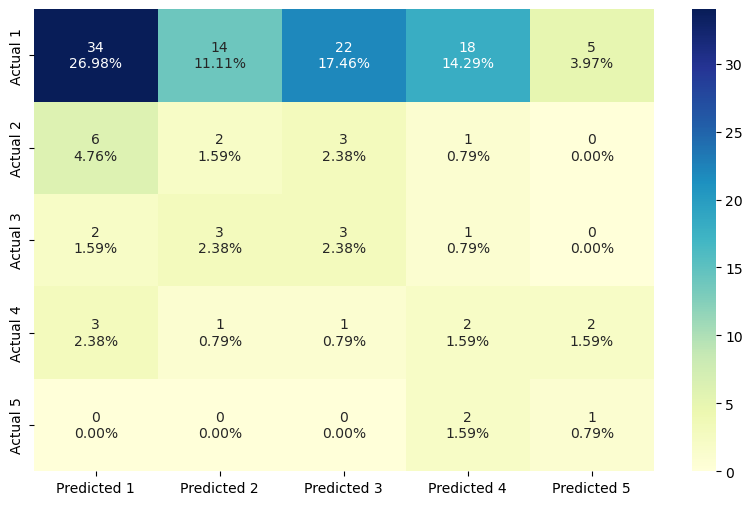

In [549]:
bulid_confusion_matrix(y_test,forest_test_pred2)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:
   
- Random forest with tf-idf provides good train accuracy , precision & recall
- Test metrics comes around ~ 42 % due to less sample data

### 2.Naive Bayes with Tfidf

In [550]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

GaussianNB()

In [551]:
y_pred_train_nb = nb.predict(X_train_ifidf_smote_pca)
y_pred_test_nb = nb.predict(X_test_pca)

In [556]:
metrics= get_metric_score(y_pred_train_nb,y_pred_test_nb,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Naive Bayes tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf        0.967593       0.333333      0.967593   
Naive Bayes tf-idf          0.255556       0.039683      0.255556   

                      Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf     0.333333         0.967593        0.333333  
Naive Bayes tf-idf       0.039683         0.255556        0.039683

In [557]:
bulid_classification_report(y_test,y_pred_test_nb)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        93
           2       0.33      0.08      0.13        12
           3       0.00      0.00      0.00         9
           4       0.08      0.33      0.13         9
           5       0.01      0.33      0.03         3

    accuracy                           0.04       126
   macro avg       0.09      0.15      0.06       126
weighted avg       0.04      0.04      0.02       126



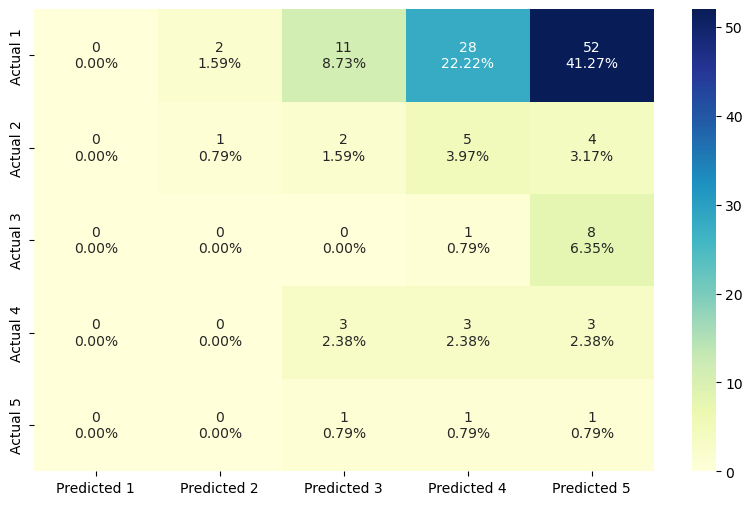

In [558]:
bulid_confusion_matrix(y_test,y_pred_test_nb)

### 3. Logistic Regression with Tf-idf

In [559]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

LogisticRegression(random_state=42)

In [560]:
y_pred_train_lr = lr.predict(X_train_ifidf_smote_pca)
y_pred_test_lr = lr.predict(X_test_pca)

In [562]:
metrics= get_metric_score(y_pred_train_lr,y_pred_test_lr,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Logistic Regression tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf              0.967593       0.333333      0.967593   
Naive Bayes tf-idf                0.255556       0.039683      0.255556   
Logistic Regression tf-idf        0.250926       0.095238      0.250926   

                            Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf           0.333333         0.967593        0.333333  
Naive Bayes tf-idf             0.039683         0.255556        0.039683  
Logistic Regression tf-idf     0.095238         0.250926        0.095238

### 4. SVM with tf-idf

In [563]:
from sklearn import svm
svm_clf = svm.SVC(random_state=42)
svm_clf.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

SVC(random_state=42)

In [564]:
y_pred_train_svm = svm_clf.predict(X_train_ifidf_smote_pca)
y_pred_test_svm = svm_clf.predict(X_test_pca)

In [565]:
metrics= get_metric_score(forest_train_pred1,forest_test_pred2,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['SVM tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf              0.967593       0.333333      0.967593   
Naive Bayes tf-idf                0.255556       0.039683      0.255556   
Logistic Regression tf-idf        0.250926       0.095238      0.250926   
SVM tf-idf                        0.967593       0.333333      0.967593   

                            Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf           0.333333         0.967593        0.333333  
Naive Bayes tf-idf             0.039683         0.255556        0.039683  
Logistic Regression tf-idf     0.095238         0.250926        0.095238  
SVM tf-idf                     0.333333         0.967593        0.333333

In [566]:
bulid_classification_report(y_test,y_pred_test_svm)

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.08      0.14        93
           2       0.16      0.25      0.19        12
           3       0.12      0.33      0.18         9
           4       0.06      0.11      0.07         9
           5       0.04      0.67      0.07         3

    accuracy                           0.13       126
   macro avg       0.21      0.29      0.13       126
weighted avg       0.55      0.13      0.14       126



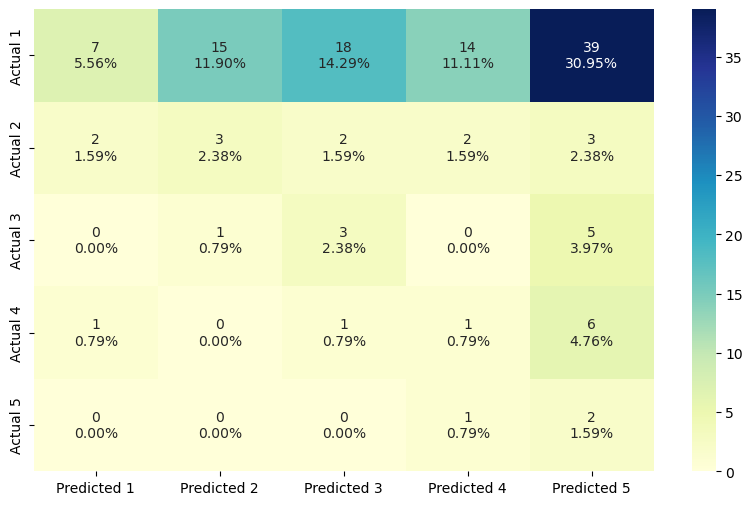

In [567]:
bulid_confusion_matrix(y_test,y_pred_test_svm)

### 5. KNN with tf-idf

In [568]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

KNeighborsClassifier(n_neighbors=3)

In [569]:
y_pred_train_knn = knn.predict(X_train_ifidf_smote_pca)
y_pred_test_knn = knn.predict(X_test_pca)

In [570]:
metrics= get_metric_score(y_pred_train_knn,y_pred_test_knn,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['KNN tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf              0.967593       0.333333      0.967593   
Naive Bayes tf-idf                0.255556       0.039683      0.255556   
Logistic Regression tf-idf        0.250926       0.095238      0.250926   
SVM tf-idf                        0.967593       0.333333      0.967593   
KNN tf-idf                        0.809259       0.309524      0.809259   

                            Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf           0.333333         0.967593        0.333333  
Naive Bayes tf-idf             0.039683         0.255556        0.039683  
Logistic Regression tf-idf     0.095238         0.250926        0.095238  
SVM tf-idf                     0.333333         0.967593        0.333333  
KNN tf-idf                     0.309524         0.809259        0.309524

In [571]:
bulid_classification_report(y_test,y_pred_test_knn)

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.33      0.46        93
           2       0.14      0.17      0.15        12
           3       0.08      0.33      0.13         9
           4       0.08      0.22      0.12         9
           5       0.12      0.33      0.18         3

    accuracy                           0.31       126
   macro avg       0.23      0.28      0.21       126
weighted avg       0.57      0.31      0.38       126



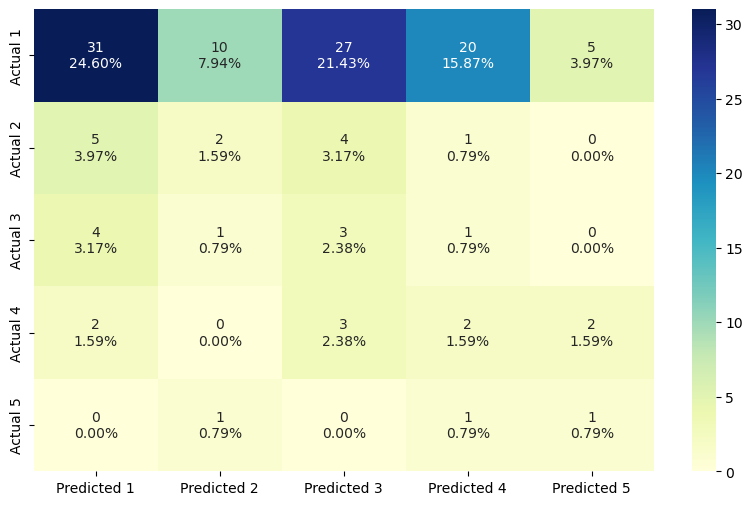

In [572]:
bulid_confusion_matrix(y_test,y_pred_test_knn)

### 6.  Decision Tree with tf-idf

In [573]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

DecisionTreeClassifier(random_state=42)

In [574]:
y_pred_train_dt = dt.predict(X_train_ifidf_smote_pca)
y_pred_test_dt = dt.predict(X_test_pca)

In [575]:
metrics= get_metric_score(forest_train_pred1,forest_test_pred2,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Decision Tree tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf              0.967593       0.333333      0.967593   
Naive Bayes tf-idf                0.255556       0.039683      0.255556   
Logistic Regression tf-idf        0.250926       0.095238      0.250926   
SVM tf-idf                        0.967593       0.333333      0.967593   
KNN tf-idf                        0.809259       0.309524      0.809259   
Decision Tree tf-idf              0.967593       0.333333      0.967593   

                            Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf           0.333333         0.967593        0.333333  
Naive Bayes tf-idf             0.039683         0.255556        0.039683  
Logistic Regression tf-idf     0.095238         0.250926        0.095238  
SVM tf-idf                     0.333333         0.967593        0.333333  
KNN tf-idf                     0.309524         0.809259        0.309524  
Decision Tree tf-idf           0.333333         0.967593        0.333333

In [576]:
y_test.shape

(126,)

In [577]:
bulid_classification_report(y_test,y_pred_test_dt)

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.35      0.49        93
           2       0.12      0.25      0.17        12
           3       0.10      0.33      0.16         9
           4       0.09      0.22      0.13         9
           5       0.12      0.33      0.18         3

    accuracy                           0.33       126
   macro avg       0.24      0.30      0.22       126
weighted avg       0.60      0.33      0.40       126



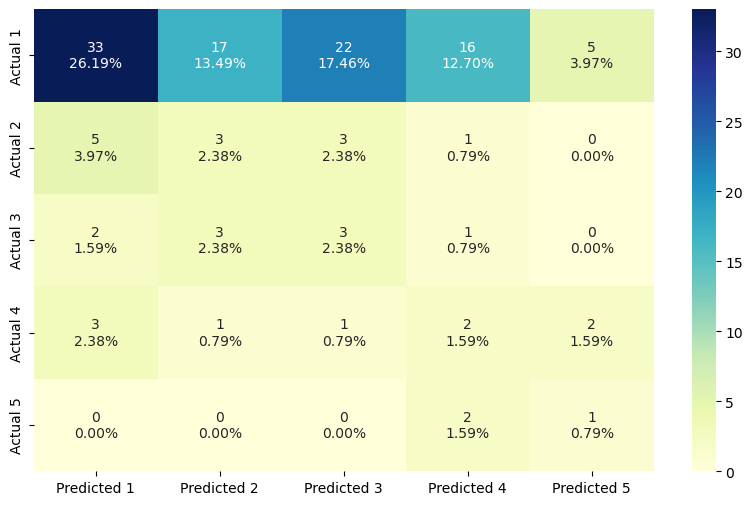

In [578]:
bulid_confusion_matrix(y_test,y_pred_test_dt)

### 7. Gradient Boosting Classifier 

In [579]:
from sklearn.ensemble import GradientBoostingClassifier

In [580]:
gb = GradientBoostingClassifier(random_state=42).fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

In [581]:
y_pred_train_gb = gb.predict(X_train_ifidf_smote_pca)
y_pred_test_gb = gb.predict(X_test_pca)

In [582]:
metrics= get_metric_score(y_pred_train_gb,y_pred_test_gb,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Gradient Boosting tf-idf'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
Random Forest tf-idf              0.967593       0.333333      0.967593   
Naive Bayes tf-idf                0.255556       0.039683      0.255556   
Logistic Regression tf-idf        0.250926       0.095238      0.250926   
SVM tf-idf                        0.967593       0.333333      0.967593   
KNN tf-idf                        0.809259       0.309524      0.809259   
Decision Tree tf-idf              0.967593       0.333333      0.967593   
Gradient Boosting tf-idf          0.807407       0.269841      0.807407   

                            Test_Recall  Train_Precision  Test_Precision  
Random Forest tf-idf           0.333333         0.967593        0.333333  
Naive Bayes tf-idf             0.039683         0.255556        0.039683  
Logistic Regression tf-idf     0.095238         0.250926        0.095238  
SVM tf-idf                     0.333333         0.967593        0.333333  
KNN tf-idf                     0.309524         0.809259        0.309524  
Decision Tree tf-idf           0.333333         0.967593        0.333333  
Gradient Boosting tf-idf       0.269841         0.807407        0.269841

In [583]:
bulid_classification_report(y_test,y_pred_test_gb)

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.26      0.37        93
           2       0.20      0.33      0.25        12
           3       0.16      0.44      0.24         9
           4       0.05      0.11      0.07         9
           5       0.04      0.33      0.07         3

    accuracy                           0.27       126
   macro avg       0.22      0.30      0.20       126
weighted avg       0.53      0.27      0.32       126



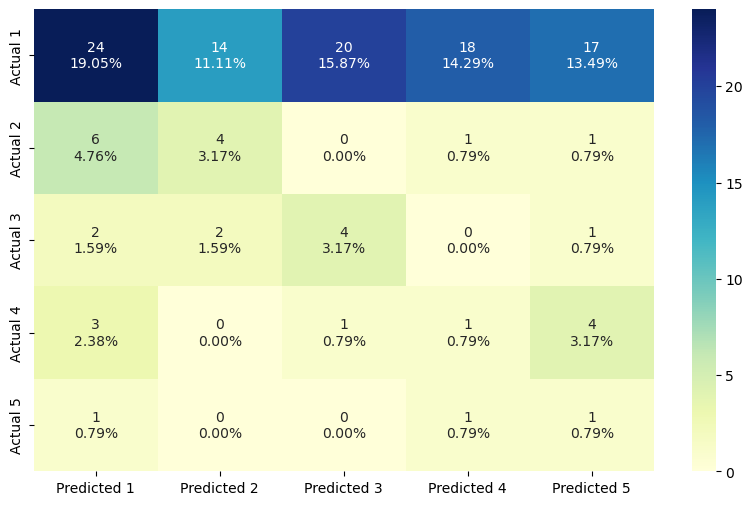

In [584]:
bulid_confusion_matrix(y_test,y_pred_test_gb)

### Hyperparameter tuning

In [585]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [586]:
param_dist = {
    "n_estimators": [100, 500],
    'learning_rate': uniform(0.1, 1),  # Uniform distribution between 0.1 and 10
    'max_depth': [10, 20, 30]
}

In [587]:
gb_rv = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=2, cv=2)
gb_rv.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote)

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020357ECE6E0>,
                                        'max_depth': [10, 20, 30],
                                        'n_estimators': [100, 500]})

In [588]:
# brst parameters
gb_rv.best_params_

{'learning_rate': 0.560686091211751, 'max_depth': 20, 'n_estimators': 100}

In [589]:
y_pred_train_gb_rv = gb_rv.predict(X_train_ifidf_smote_pca)
y_pred_test_gb_rv = gb_rv.predict(X_test_pca)

In [590]:
metrics= get_metric_score(y_pred_train_gb_rv,y_pred_test_gb_rv,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Gradient Boosting tf-idf hyper param tuned'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  \
Random Forest tf-idf                              0.967593       0.333333   
Naive Bayes tf-idf                                0.255556       0.039683   
Logistic Regression tf-idf                        0.250926       0.095238   
SVM tf-idf                                        0.967593       0.333333   
KNN tf-idf                                        0.809259       0.309524   
Decision Tree tf-idf                              0.967593       0.333333   
Gradient Boosting tf-idf                          0.807407       0.269841   
Gradient Boosting tf-idf hyper param tuned        0.999074       0.333333   

                                            Train_Recall  Test_Recall  \
Random Forest tf-idf                            0.967593     0.333333   
Naive Bayes tf-idf                              0.255556     0.039683   
Logistic Regression tf-idf                      0.250926     0.095238   
SVM tf-idf                                      0.967593     0.333333   
KNN tf-idf                                      0.809259     0.309524   
Decision Tree tf-idf                            0.967593     0.333333   
Gradient Boosting tf-idf                        0.807407     0.269841   
Gradient Boosting tf-idf hyper param tuned      0.999074     0.333333   

                                            Train_Precision  Test_Precision  
Random Forest tf-idf                               0.967593        0.333333  
Naive Bayes tf-idf                                 0.255556        0.039683  
Logistic Regression tf-idf                         0.250926        0.095238  
SVM tf-idf                                         0.967593        0.333333  
KNN tf-idf                                         0.809259        0.309524  
Decision Tree tf-idf                               0.967593        0.333333  
Gradient Boosting tf-idf                           0.807407        0.269841  
Gradient Boosting tf-idf hyper param tuned         0.999074        0.333333

### glove 

In [591]:
from tqdm import tqdm

In [592]:
# load the GloVe vectors in a dictionary:

# load the GloVe vectors in a dictionary:
embedding_file = 'glove.6B.300d.txt'
embeddings_index = {}
#f = open(r'/glove.6B/glove.6B.300d.txt', encoding="utf8")

for line in tqdm(open(embedding_file, encoding="utf8")):
    # Splitting the each line 
    values = line.split()
    
    word = values[0]
    
    coefs = np.array(values[1:], dtype='float32')
    
    embeddings_index[word] = coefs
    
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:48, 8280.48it/s] 

Found 400000 word vectors.


In [593]:
# This function creates a normalized vector for the whole sentence

def sent2vec(s):
    words = word_tokenize(s)
    N = []
    for w in words:
        try:
            N.append(embeddings_index[w])
        except:
            continue
    N = np.array(N)
    v = N.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [594]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(read_df_dummy_encoding['Description'])]

ind_glove_df = pd.DataFrame(ind_glove_df, columns=["glove_" + str(n) for n in range(300)])


100%|██████████████████████████████████████████████████████████████████████████████| 418/418 [00:00<00:00, 2888.82it/s]


In [595]:
X_features_glove = read_df_dummy_encoding.drop(columns=["Description","Accident Level"])

In [596]:
# Consider only top 30 GLOVE features
X_features_glove = X_features_glove.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [597]:
y_feature = read_df_dummy_encoding['Accident Level']

In [598]:
X_features_glove.head()

Potential Accident Level  Year  Month  Date  Day_of_week  Country_01  \
0                         3     0      4     0            0        True   
1                         3     0      4     1            2       False   
2                         2     0      4     5            6        True   
3                         0     0      4     7            0        True   
4                         3     0      4     9            3        True   

   Country_02  Country_03  Local_01  Local_02  ...  glove_20  glove_21  \
0       False       False      True     False  ...  0.015427  0.019530   
1        True       False     False      True  ... -0.059941 -0.074079   
2       False       False     False     False  ... -0.009115  0.030796   
3       False       False     False     False  ...  0.023787 -0.023873   
4       False       False     False     False  ... -0.001299 -0.027434   

   glove_22  glove_23  glove_24  glove_25  glove_26  glove_27  glove_28  \
0  0.033126  0.006747 -0.055548  0.013679 -0.013032 -0.002070 -0.012954   
1 -0.001021  0.084438 -0.040670  0.015580 -0.005944  0.052700 -0.040913   
2  0.010260 -0.019606 -0.075007  0.004438 -0.013630 -0.036970  0.036808   
3  0.067727 -0.045495  0.008619  0.050032  0.015707  0.037204 -0.004471   
4  0.037984  0.026926 -0.041403  0.024449  0.014317  0.013434 -0.000202   

   glove_29  
0  0.015087  
1 -0.033658  
2  0.053851  
3  0.032285  
4  0.029401  

[5 rows x 91 columns]

In [599]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_features_glove, y_feature, test_size=0.3, random_state=42, stratify=y_feature)

In [600]:
smote_samp = SMOTE(random_state=1,k_neighbors=3)
X_train_glove_smote, y_train_glove_smote = smote_samp.fit_resample(X_train_2, y_train_2)
pca = PCA(n_components = 0.75)
X_train_glove_smote_pca = pca.fit_transform(X_train_glove_smote)
X_test_glove_pca= pca.fit_transform(X_test_2)

In [601]:
# intializing the Random Forest model
nb_glve = GaussianNB()
nb_glve.fit(X_train_2, y_train_2)

GaussianNB()

In [602]:
y_pred_train_nb_glve = nb_glve.predict(X_train_2)
y_pred_test_nb_glve = nb_glve.predict(X_test_2)

In [604]:
metrics= get_metric_score(y_pred_train_nb_glve,y_pred_test_nb_glve,y_train_2,y_test_2)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['NB Glove'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  \
Random Forest tf-idf                              0.967593       0.333333   
Naive Bayes tf-idf                                0.255556       0.039683   
Logistic Regression tf-idf                        0.250926       0.095238   
SVM tf-idf                                        0.967593       0.333333   
KNN tf-idf                                        0.809259       0.309524   
Decision Tree tf-idf                              0.967593       0.333333   
Gradient Boosting tf-idf                          0.807407       0.269841   
Gradient Boosting tf-idf hyper param tuned        0.999074       0.333333   
NB Glove                                          0.308219       0.238095   

                                            Train_Recall  Test_Recall  \
Random Forest tf-idf                            0.967593     0.333333   
Naive Bayes tf-idf                              0.255556     0.039683   
Logistic Regression tf-idf                      0.250926     0.095238   
SVM tf-idf                                      0.967593     0.333333   
KNN tf-idf                                      0.809259     0.309524   
Decision Tree tf-idf                            0.967593     0.333333   
Gradient Boosting tf-idf                        0.807407     0.269841   
Gradient Boosting tf-idf hyper param tuned      0.999074     0.333333   
NB Glove                                        0.308219     0.238095   

                                            Train_Precision  Test_Precision  
Random Forest tf-idf                               0.967593        0.333333  
Naive Bayes tf-idf                                 0.255556        0.039683  
Logistic Regression tf-idf                         0.250926        0.095238  
SVM tf-idf                                         0.967593        0.333333  
KNN tf-idf                                         0.809259        0.309524  
Decision Tree tf-idf                               0.967593        0.333333  
Gradient Boosting tf-idf                           0.807407        0.269841  
Gradient Boosting tf-idf hyper param tuned         0.999074        0.333333  
NB Glove                                           0.308219        0.238095

### 8. WORD 2 VEC

In [605]:
import gensim
print(gensim.__version__)
from gensim.models import Word2Vec

4.3.2


In [606]:
words_list =[]
for i in read_df_dummy_encoding['Description']:
    li = list(i.split(" "))
    words_list.append(li)

In [607]:
# Let's have a look into words_list
words_list[0:1]

[['remove',
  'drill',
  'rod',
  'jumbo',
  'maintenance',
  'supervisor',
  'proceed',
  'loosen',
  'support',
  'intermediate',
  'centralizer',
  'facilitate',
  'removal',
  'see',
  'mechanic',
  'support',
  'one',
  'end',
  'drill',
  'equipment',
  'pull',
  'hand',
  'bar',
  'accelerate',
  'removal',
  'moment',
  'bar',
  'slide',
  'point',
  'support',
  'tighten',
  'finger',
  'mechanic',
  'drill',
  'bar',
  'beam',
  'jumbo']]

In [608]:
# Model creation   
model_w2v= Word2Vec(words_list, min_count = 1, workers = 4)

In [609]:
model_w2v

In [610]:
# saving the model
model_w2v.save("word2vec.model")

In [611]:
words = model_w2v.wv
print("Let's have a quick look at the vocabulary words...", len(words))

Let's have a quick look at the vocabulary words... 2432


In [612]:
word = "problem"
model_w2v.wv[word]

array([-0.0013571 , -0.00462388, -0.00530413,  0.00742326, -0.00812669,
       -0.01194664, -0.0026623 ,  0.00136913,  0.0012257 ,  0.00590933,
       -0.0049307 , -0.00436082,  0.00130899, -0.00450744, -0.00256528,
        0.00172584,  0.00489321,  0.00438711, -0.0054967 , -0.00794526,
        0.00834775, -0.00061567, -0.0073192 ,  0.00556439, -0.00315012,
       -0.00086556, -0.01092016,  0.00049281,  0.0059795 ,  0.00957364,
       -0.00469623,  0.00270949, -0.00484974,  0.00124917,  0.00186673,
       -0.00071296,  0.00786542, -0.01016587, -0.0027725 , -0.00615674,
       -0.00276585, -0.00239948, -0.00758155, -0.00554093, -0.00625117,
        0.00852608, -0.00852603, -0.00228708,  0.00551902, -0.00385121,
       -0.00449849,  0.00673243,  0.00189027, -0.00013511, -0.00867556,
        0.00601116,  0.01036087, -0.00085237, -0.0065549 ,  0.0033941 ,
       -0.00104791, -0.00226563, -0.00493375, -0.00731175, -0.00286731,
        0.01027931, -0.00893574,  0.00410781, -0.00328764,  0.01

In [613]:
# Top 10 similar words to the word 'weight'

similar = model_w2v.wv.similar_by_word('weight')
print(similar)

[('remove', 0.9850686192512512), ('cause', 0.9846822619438171), ('hit', 0.9846429228782654), ('not', 0.9842349886894226), ('right', 0.9836635589599609), ('time', 0.983659565448761), ('generate', 0.9836030006408691), ('support', 0.9835964441299438), ('place', 0.9831287264823914), ('moment', 0.9829844236373901)]


In [614]:
# Top 10 similar words to the word 'fall'

similar = model_w2v.wv.similar_by_word('fall')
print(similar)

[('moment', 0.9938781261444092), ('remove', 0.9916548132896423), ('leave', 0.9913999438285828), ('work', 0.9913500547409058), ('kg', 0.990837812423706), ('operator', 0.9908080697059631), ('area', 0.9907474517822266), ('use', 0.9906855821609497), ('hand', 0.9905732870101929), ('rock', 0.9905470609664917)]


In [615]:
words = model_w2v.wv

In [616]:
from gensim.models import Word2Vec

In [617]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    
    vocabulary = model.wv.vectors
    
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    
    return np.array(features)




feature_size = 100

# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus = words_list, model = model_w2v,
                                             num_features = feature_size)
pd.DataFrame(w2v_feature_array)

0    1    2    3    4    5    6    7    8    9   ...   90   91   92  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
413  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
414  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
415  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
416  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
417  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      93   94   95   96   97   98   99  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
413  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
414  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
415  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
416  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
417  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[418 rows x 100 columns]

In [618]:
#Creating dataframe of description_ifidf
description_word2vec = pd.DataFrame(w2v_feature_array,columns=["word2vec_" + str(n) for n in range(100)])

data_features = read_df_dummy_encoding.drop(columns = ['Description'])

data_features_word2vec = data_features.join(description_word2vec.reset_index(drop=True))
data_features_word2vec.head(5)

Accident Level  Potential Accident Level  Year  Month  Date  Day_of_week  \
0               1                         3     0      4     0            0   
1               1                         3     0      4     1            2   
2               1                         2     0      4     5            6   
3               1                         0     0      4     7            0   
4               4                         3     0      4     9            3   

   Country_01  Country_02  Country_03  Local_01  ...  word2vec_90  \
0        True       False       False      True  ...          0.0   
1       False        True       False     False  ...          0.0   
2        True       False       False     False  ...          0.0   
3        True       False       False     False  ...          0.0   
4        True       False       False     False  ...          0.0   

   word2vec_91  word2vec_92  word2vec_93  word2vec_94  word2vec_95  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   word2vec_96  word2vec_97  word2vec_98  word2vec_99  
0          0.0          0.0          0.0          0.0  
1          0.0          0.0          0.0          0.0  
2          0.0          0.0          0.0          0.0  
3          0.0          0.0          0.0          0.0  
4          0.0          0.0          0.0          0.0  

[5 rows x 162 columns]

In [619]:
X_features_word2vec = data_features_word2vec.drop('Accident Level',axis=1)
y_feature = data_features_word2vec['Accident Level']

In [620]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_features_word2vec,y_feature, test_size=0.2, random_state=42)

In [621]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 42)
# fitting the model on training set
model.fit(X_train_1,y_train_1)

RandomForestClassifier(random_state=42)

In [622]:
y_pred_train_rf_w2v = model.predict(X_train_1)
y_pred_test_rf_w2v = model.predict(X_test_1)

In [623]:
metrics= get_metric_score(y_pred_train_rf_w2v,y_pred_test_rf_w2v,y_train_1,y_test_1)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Random Forest Word2Vec'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  \
Random Forest tf-idf                              0.967593       0.333333   
Naive Bayes tf-idf                                0.255556       0.039683   
Logistic Regression tf-idf                        0.250926       0.095238   
SVM tf-idf                                        0.967593       0.333333   
KNN tf-idf                                        0.809259       0.309524   
Decision Tree tf-idf                              0.967593       0.333333   
Gradient Boosting tf-idf                          0.807407       0.269841   
Gradient Boosting tf-idf hyper param tuned        0.999074       0.333333   
NB Glove                                          0.308219       0.238095   
Random Forest Word2Vec                            0.991018       0.738095   

                                            Train_Recall  Test_Recall  \
Random Forest tf-idf                            0.967593     0.333333   
Naive Bayes tf-idf                              0.255556     0.039683   
Logistic Regression tf-idf                      0.250926     0.095238   
SVM tf-idf                                      0.967593     0.333333   
KNN tf-idf                                      0.809259     0.309524   
Decision Tree tf-idf                            0.967593     0.333333   
Gradient Boosting tf-idf                        0.807407     0.269841   
Gradient Boosting tf-idf hyper param tuned      0.999074     0.333333   
NB Glove                                        0.308219     0.238095   
Random Forest Word2Vec                          0.991018     0.738095   

                                            Train_Precision  Test_Precision  
Random Forest tf-idf                               0.967593        0.333333  
Naive Bayes tf-idf                                 0.255556        0.039683  
Logistic Regression tf-idf                         0.250926        0.095238  
SVM tf-idf                                         0.967593        0.333333  
KNN tf-idf                                         0.809259        0.309524  
Decision Tree tf-idf                               0.967593        0.333333  
Gradient Boosting tf-idf                           0.807407        0.269841  
Gradient Boosting tf-idf hyper param tuned         0.999074        0.333333  
NB Glove                                           0.308219        0.238095  
Random Forest Word2Vec                             0.991018        0.738095

In [624]:
bulid_classification_report(y_test_1,y_pred_test_rf_w2v)

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.98      0.87        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.58      0.74      0.65        84



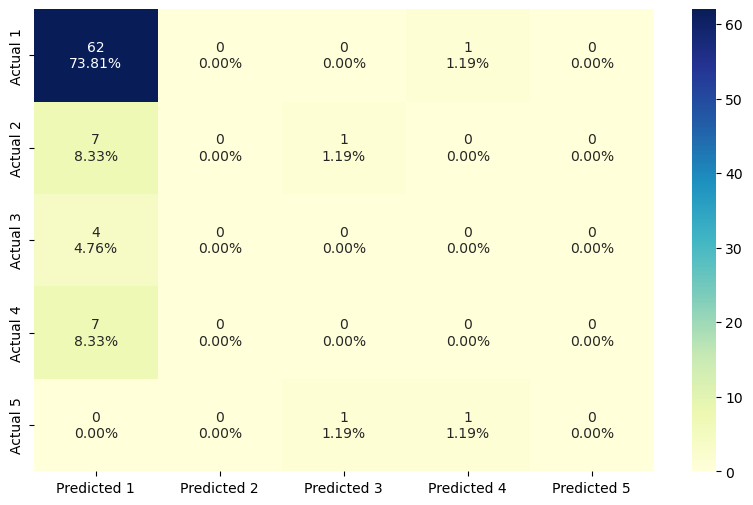

In [625]:
bulid_confusion_matrix(y_test_1,y_pred_test_rf_w2v)

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Observation:

- From the metrics accuracy, precision & recall comparison of all various models used, Random Forest with Word2Vec is the best model to use for prediction of accident level given various factors followed by 
    - Random Forest TF-IDF 
    - SVM TF-IDF 
    - Gradient Boosting TF-IDF hyper param tuned model along with smote & pca

In [626]:
read_df_mtr

Train_accuracy  Test_Accuracy  \
Random Forest tf-idf                              0.967593       0.333333   
Naive Bayes tf-idf                                0.255556       0.039683   
Logistic Regression tf-idf                        0.250926       0.095238   
SVM tf-idf                                        0.967593       0.333333   
KNN tf-idf                                        0.809259       0.309524   
Decision Tree tf-idf                              0.967593       0.333333   
Gradient Boosting tf-idf                          0.807407       0.269841   
Gradient Boosting tf-idf hyper param tuned        0.999074       0.333333   
NB Glove                                          0.308219       0.238095   
Random Forest Word2Vec                            0.991018       0.738095   

                                            Train_Recall  Test_Recall  \
Random Forest tf-idf                            0.967593     0.333333   
Naive Bayes tf-idf                              0.255556     0.039683   
Logistic Regression tf-idf                      0.250926     0.095238   
SVM tf-idf                                      0.967593     0.333333   
KNN tf-idf                                      0.809259     0.309524   
Decision Tree tf-idf                            0.967593     0.333333   
Gradient Boosting tf-idf                        0.807407     0.269841   
Gradient Boosting tf-idf hyper param tuned      0.999074     0.333333   
NB Glove                                        0.308219     0.238095   
Random Forest Word2Vec                          0.991018     0.738095   

                                            Train_Precision  Test_Precision  
Random Forest tf-idf                               0.967593        0.333333  
Naive Bayes tf-idf                                 0.255556        0.039683  
Logistic Regression tf-idf                         0.250926        0.095238  
SVM tf-idf                                         0.967593        0.333333  
KNN tf-idf                                         0.809259        0.309524  
Decision Tree tf-idf                               0.967593        0.333333  
Gradient Boosting tf-idf                           0.807407        0.269841  
Gradient Boosting tf-idf hyper param tuned         0.999074        0.333333  
NB Glove                                           0.308219        0.238095  
Random Forest Word2Vec                             0.991018        0.738095

In [627]:
#Applying smote on dataframe containing word2vec
from imblearn.over_sampling import SMOTE
smote_samp = SMOTE(random_state=1,k_neighbors=3)
X_train_word2vec_smote, y_train_word2vec_smote = smote_samp.fit_resample(X_train_1, y_train_1)
#Applying PCA on dataframe containing word2vec+smote
pca = PCA(n_components = 0.75)
X_train_word2vec_smote_pca = pca.fit_transform(X_train_word2vec_smote)
X_test_word2vec_pca= pca.fit_transform(X_test_1)

In [691]:
# intializing the Random Forest model
model2 = RandomForestClassifier(random_state = 42)
# fitting the model on training set
model2.fit(X_train_word2vec_smote_pca,y_train_word2vec_smote)

RandomForestClassifier(random_state=42)

In [692]:
y_pred_train_rf_w2v = model2.predict(X_train_word2vec_smote_pca)
y_pred_test_rf_w2v = model2.predict(X_test_word2vec_pca)

In [695]:
metrics= get_metric_score(y_pred_train_rf_w2v,y_pred_test_rf_w2v,y_train_word2vec_smote,y_test_1)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Random Forest Word2Vec smote pca'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

Train_accuracy  Test_Accuracy  Train_Recall  \
RNN Model                               0.739521       0.738095      0.739521   
Random Forest Word2Vec smote pca        0.997561       0.500000      0.997561   

                                  Test_Recall  Train_Precision  Test_Precision  
RNN Model                            0.738095         0.739521        0.738095  
Random Forest Word2Vec smote pca     0.500000         0.997561        0.500000

In [630]:
#cleaned dataset
read_df_dummy_encoding.head(1)

Accident Level  Potential Accident Level  \
0               1                         3   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   

   Year  Month  Date  Day_of_week  Country_01  Country_02  Country_03  ...  \
0     0      4     0            0        True       False       False  ...   

   CR_Projection  CR_Projection/Burning  CR_Projection/Choco  \
0          False                  False                False   

   CR_Projection/Manual_Tools  CR_Projection_of_fragments  CR_Suspended_Loads  \
0                       False                       False               False   

   CR_Traffic  CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  \
0       False                             False                False   

   CR_remains_of_choco  
0                False  

[1 rows x 63 columns]

In [631]:
#Only categorical features and its label
df_categorical = read_df_dummy_encoding.drop(['Description','Accident Level'],axis=1)
df_categorical_label = read_df_dummy_encoding['Accident Level']

In [632]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(df_categorical,df_categorical_label, test_size=0.2, random_state=42)

In [633]:
#Applying smote only categorical features
smote_samp = SMOTE(random_state=1,k_neighbors=3)
X_train_cat_smote, y_train_cat_smote = smote_samp.fit_resample(X_train_2, y_train_2)
#Applying PCA only categorical features
pca = PCA(n_components = 0.75)
X_train_cat_smote_pca = pca.fit_transform(X_train_cat_smote)
X_test_cat_pca= pca.fit_transform(X_test)

In [292]:
def plot_accuracy(model_history):
    accuracy      = model_history.history['accuracy']
    val_accuracy  = model_history.history['val_accuracy']
    loss     = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    epochs   = range(len(accuracy)) # Get number of epochs
    plt.plot  ( epochs, accuracy, label = 'training accuracy' )
    plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
    plt.title ('Training and validation accuracy')
    plt.legend(loc = 'lower right')
    plt.figure()
    plt.plot  ( epochs, loss, label = 'training loss' )
    plt.plot  ( epochs, val_loss, label = 'validation loss' )
    plt.legend(loc = 'upper right')
    plt.title ('Training and validation loss'   )
    

In [137]:
def plot_confusion_matrix(X_test, y_test, model):
    y_pred = model.predict(X_test)
    y_pred = [np.argmax(i) for i in model.predict(X_test)]

    con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    label_names = list(range(len(con_mat_norm)))

    con_mat_df = pd.DataFrame(con_mat_norm,
                              index=label_names, 
                              columns=label_names)

    figure = plt.figure(figsize=(10, 10))
    sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [122]:
# A function to return train and test accuracy and loss and F1 score
def model_performance(model,
                      X_train,
                      y_train_cat,
                      X_test,
                      y_test,
                      y_test_cat,
                      title):
  n_classes = 5  # Number of classes

  """Model : Neural network model
     y_test : Target of the test data
     X_test : The test data
     title : Title of the confustion matrix
     The function gives the train data score ,Test data score and additionally F1 score"""
  y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
  error_score_test = model.evaluate(X_test,y_test_cat, verbose=0)
  error_score_train = model.evaluate(X_train,y_train_cat, verbose=0)
  y_pred=model.predict(X_test)
  y_pred_final_1=[]
  for i in y_pred:
    y_pred_final_1.append(np.argmax(i))
  print(classification_report(y_test, y_pred_final_1))
  f1_score_test = f1_score(y_test,y_pred_final_1,average='macro')
  cm=confusion_matrix(y_test, y_pred_final_1)
  categories = ['1','2','3','4','5']
  make_confusion_matrix(cm,
                      group_names=None,
                      categories=categories,
                      title = title)
  plt.show()
  return error_score_train,error_score_test,f1_score_test;

In [295]:
#Building a confusion matrix for muliclass classifier
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

In [296]:
import regex as re
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

###  1. Only categorical features
original data : df_categorical, df_categorical_label

Before applying smote : X_train_2,X_test_2,y_train_2,y_test_2

after applying smote(Tran data) : X_train_cat_smote, y_train_cat_smote

after applying pca(X data) : X_train_cat_smote_pca,X_test_cat_pca
    
### 2 Categorical  + description with tf idf vector

original data : data_features_ifidf,X_features_tfidf,y_feature

Before applying smote : X_train, X_test, y_train, y_test

after applying smote(Tran data) : X_train_ifidf_smote, y_train_ifidf_smote

after applying pca(X data) : X_train_ifidf_smote_pca,X_test_pca


### 3  Categorical + description with word2vector

original data : X_features_word2vec,y_feature

Before applying smote : X_train_1,X_test_1,y_train_1,y_test_1

after applying smote(Tran data) : X_train_word2vec_smote, y_train_ifidf_smote

after applying pca(X data) : X_train_word2vec_smote_pca,X_test_word2vec_pca


### 3  Categorical + description with Glove

original data : X_features_glove,y_feature

Before applying smote : X_train_2,X_test_2,y_train_2,y_test_2

after applying smote(Tran data) : X_train_glove_smote, y_train_glove_smote

after applying pca(X data) : X_train_glove_smote_pca,X_test_glove_pca

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">Step 1: Design, train and test Neural networks classifiers

In [653]:
# A function to return train and test accuracy and loss and F1 score
def model_performance(model,
                      X_train,
                      y_train_cat,
                      X_test,
                      y_test,
                      y_test_cat,
                      title):
  n_classes = 5  # Number of classes

  """Model : Neural network model
     y_test : Target of the test data
     X_test : The test data
     title : Title of the confustion matrix
     The function gives the train data score ,Test data score and additionally F1 score"""
  y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
  error_score_test = model.evaluate(X_test,y_test_cat, verbose=0)
  error_score_train = model.evaluate(X_train,y_train_cat, verbose=0)
  y_pred=model.predict(X_test)
  y_pred_final_1=[]
  for i in y_pred:
    y_pred_final_1.append(np.argmax(i))
  print(classification_report(y_test, y_pred_final_1))
  f1_score_test = f1_score(y_test,y_pred_final_1,average='macro')
  cm=confusion_matrix(y_test, y_pred_final_1)
  categories = ['1','2','3','4','5']
  make_confusion_matrix(cm,
                      group_names=None,
                      categories=categories,
                      title = title)
  plt.show()
  return error_score_train,error_score_test,f1_score_test;

In [652]:
#Building a confusion matrix for muliclass classifier
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

### 1. Building a basic Nueral network with the input feature as Categorical + description with tf idf vector

In [330]:
# Build neural network
NN_model = Sequential()
NN_model.add(Dense(512, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(5, activation='softmax'))
NN_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics= "accuracy")

In [331]:
NN_model_ifidf_history = NN_model.fit(X_train, y_train_new, 
              validation_data =(X_test,y_test_new), epochs=5, batch_size=12)

Epoch 1/5
25/25 [==============================] - 1s 18ms/step - loss: 1.0518 - accuracy: 0.7055 - val_loss: 0.9777 - val_accuracy: 0.7381
Epoch 2/5
25/25 [==============================] - 0s 6ms/step - loss: 0.9412 - accuracy: 0.7021 - val_loss: 0.9599 - val_accuracy: 0.7381
Epoch 3/5
25/25 [==============================] - 0s 7ms/step - loss: 0.8200 - accuracy: 0.7466 - val_loss: 0.8740 - val_accuracy: 0.7381
Epoch 4/5
25/25 [==============================] - 0s 8ms/step - loss: 0.7870 - accuracy: 0.7260 - val_loss: 1.0500 - val_accuracy: 0.6984
Epoch 5/5
25/25 [==============================] - 0s 9ms/step - loss: 0.7272 - accuracy: 0.7671 - val_loss: 0.9035 - val_accuracy: 0.7302


4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.01      0.02        93
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         3

    accuracy                           0.01       126
   macro avg       0.17      0.00      0.00       126
weighted avg       0.74      0.01      0.02       126



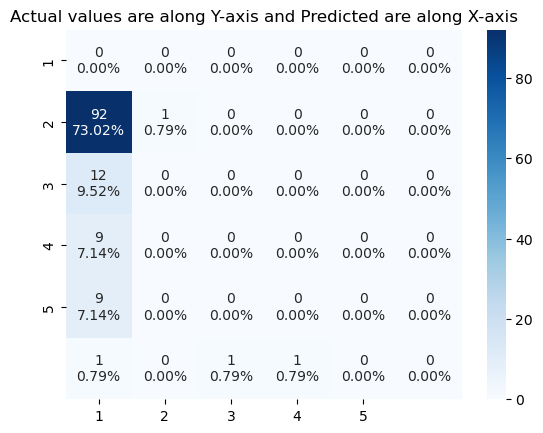

Train Accuracy  Test Accuracy  Test F1 Score  \
Basic NN with ifidf vector        0.746575       0.730159       0.003546   

                            Train Loss  Test Loss  
Basic NN with ifidf vector    0.659112   0.903526

In [332]:
error_score_train,error_score_test,f1_score_test =model_performance(NN_model,X_train,
                                                                    y_train_new, X_test,y_test,y_test_new,'Actual values are along Y-axis and Predicted are along X-axis')
Model_accuracy= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['Basic NN with ifidf vector'])
Model_accuracy

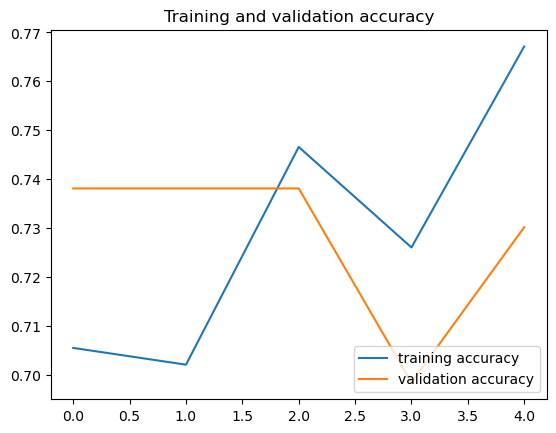

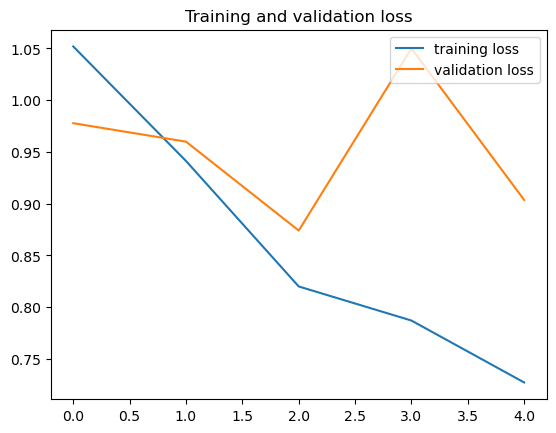

In [333]:
plot_accuracy(NN_model_ifidf_history)

### 2. Building a basic Nueral network with the input feature as Categorical + description with tf idf vector with smote

In [344]:
print(X_train_ifidf_smote.shape)
print(y_train_ifidf_smote.shape)
print(X_test.shape)
print(y_test.shape)
# Converting the categorical values to one-hot encoding
y_train_new = pd.get_dummies(y_train_ifidf_smote)
y_test_new = pd.get_dummies(y_test)
print(y_train_new.shape)
print(y_test_new.shape)

(1080, 71)
(1080,)
(126, 71)
(126,)
(1080, 5)
(126, 5)


In [345]:
NN_model_ifidf_smote_history = NN_model.fit(X_train_ifidf_smote, y_train_new, 
              validation_data =(X_test,y_test_new), epochs=5, batch_size=12)

Epoch 1/5
90/90 [==============================] - 2s 10ms/step - loss: 1.2654 - accuracy: 0.4926 - val_loss: 0.9996 - val_accuracy: 0.6508
Epoch 2/5
90/90 [==============================] - 0s 6ms/step - loss: 0.7091 - accuracy: 0.7315 - val_loss: 0.8460 - val_accuracy: 0.7143
Epoch 3/5
90/90 [==============================] - 1s 6ms/step - loss: 0.4681 - accuracy: 0.8361 - val_loss: 0.9814 - val_accuracy: 0.6746
Epoch 4/5
90/90 [==============================] - 0s 6ms/step - loss: 0.3305 - accuracy: 0.8944 - val_loss: 1.0402 - val_accuracy: 0.7143
Epoch 5/5
90/90 [==============================] - 1s 6ms/step - loss: 0.2458 - accuracy: 0.9231 - val_loss: 1.1079 - val_accuracy: 0.6905


4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.04      0.08        93
           2       0.00      0.00      0.00        12
           3       0.33      0.56      0.42         9
           4       0.25      0.11      0.15         9
           5       0.00      0.00      0.00         3

    accuracy                           0.08       126
   macro avg       0.21      0.12      0.11       126
weighted avg       0.53      0.08      0.10       126



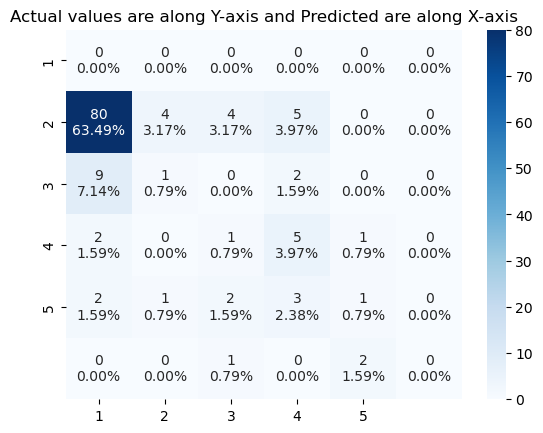

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866

In [346]:
# score of test data

error_score_train,error_score_test,f1_score_test =model_performance(NN_model,X_train_ifidf_smote,
                                                                    y_train_new, X_test,y_test,y_test_new,'Actual values are along Y-axis and Predicted are along X-axis')
temp= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['Basic NN with ifidf vector with smote'])
Model_accuracy = Model_accuracy.append(temp)
Model_accuracy

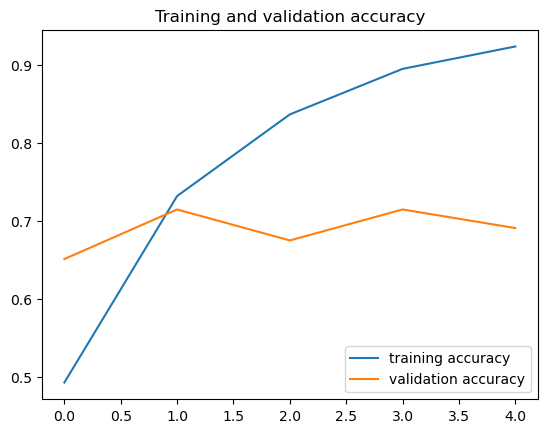

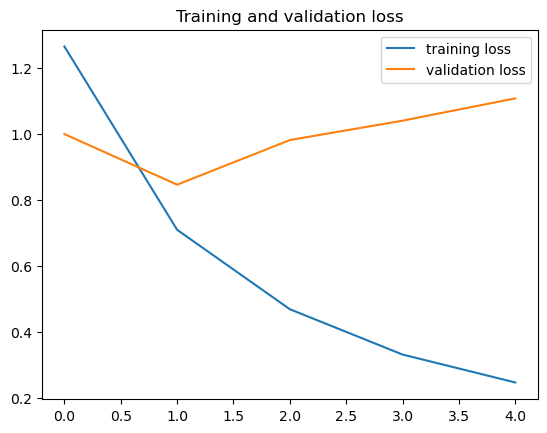

In [347]:
plot_accuracy(NN_model_ifidf_smote_history)

### 3. Building a basic Nueral network with the input feature as Categorical + description with word2vector

In [348]:
# Build neural network
NN_model = Sequential()
NN_model.add(Dense(512, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(5, activation='softmax'))
NN_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics= "accuracy")

In [349]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)
# Converting the categorical values to one-hot encoding
y_train_1_new = pd.get_dummies(y_train_1)
y_test_1_new = pd.get_dummies(y_test_1)
print(y_train_1_new.shape)
print(y_test_1_new.shape)

(334, 161)
(334,)
(84, 161)
(84,)
(334, 5)
(84, 5)


In [350]:
NN_model_word2vec_history = NN_model.fit(X_train_1, y_train_1_new, 
              validation_data =(X_test_1,y_test_1_new), epochs=5, batch_size=12)

Epoch 1/5
28/28 [==============================] - 1s 15ms/step - loss: 1.1814 - accuracy: 0.7036 - val_loss: 0.9543 - val_accuracy: 0.7381
Epoch 2/5
28/28 [==============================] - 0s 7ms/step - loss: 0.9174 - accuracy: 0.7335 - val_loss: 0.8857 - val_accuracy: 0.7262
Epoch 3/5
28/28 [==============================] - 0s 7ms/step - loss: 0.8182 - accuracy: 0.7425 - val_loss: 0.8440 - val_accuracy: 0.7262
Epoch 4/5
28/28 [==============================] - 0s 7ms/step - loss: 0.7705 - accuracy: 0.7515 - val_loss: 0.8750 - val_accuracy: 0.7143
Epoch 5/5
28/28 [==============================] - 0s 9ms/step - loss: 0.7824 - accuracy: 0.7365 - val_loss: 0.9139 - val_accuracy: 0.7143


3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      63.0
           2       0.00      0.00      0.00       8.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       7.0
           5       0.00      0.00      0.00       2.0

    accuracy                           0.00      84.0
   macro avg       0.00      0.00      0.00      84.0
weighted avg       0.00      0.00      0.00      84.0



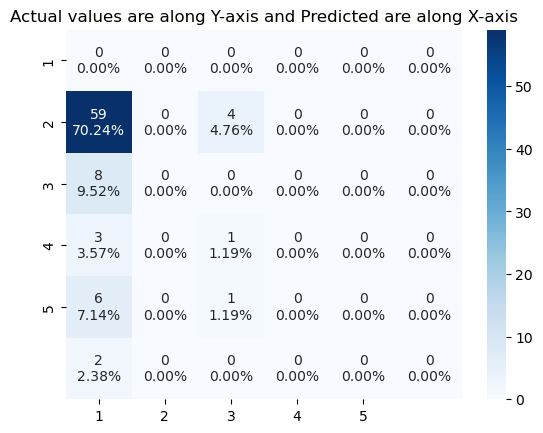

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   
Basic NN with word2vector                    0.772455       0.714286   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866  
Basic NN with word2vector                   0.000000    0.669580   0.913909

In [351]:
# score of test data

error_score_train,error_score_test,f1_score_test =model_performance(NN_model,X_train_1,
                                                                    y_train_1_new, X_test_1,y_test_1,y_test_1_new,'Actual values are along Y-axis and Predicted are along X-axis')
temp= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['Basic NN with word2vector'])
Model_accuracy = Model_accuracy.append(temp)
Model_accuracy

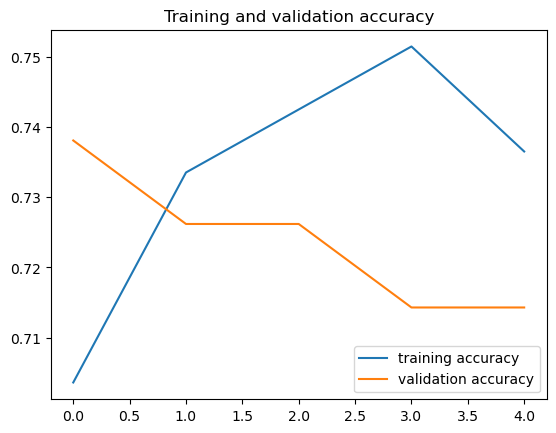

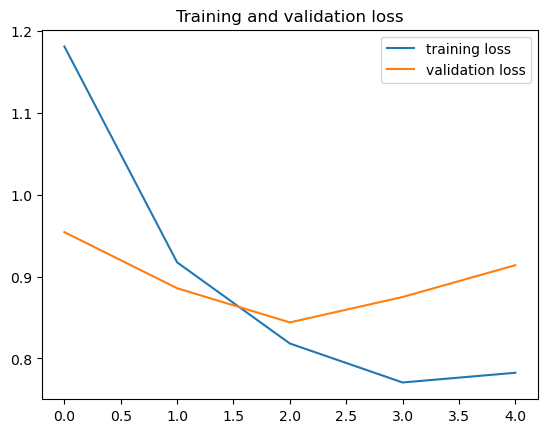

In [352]:
plot_accuracy(NN_model_word2vec_history)

### 4. Building a basic Nueral network with the input feature as Categorical + description with word2vector with smote

In [353]:
print(X_train_word2vec_smote.shape)
print(y_train_word2vec_smote.shape)
print(X_test_1.shape)
print(y_test_1.shape)
# Converting the categorical values to one-hot encoding
y_train_1_new = pd.get_dummies(y_train_word2vec_smote)
y_test_1_new = pd.get_dummies(y_test_1)
print(y_train_new.shape)
print(y_test_new.shape)

(1230, 161)
(1230,)
(84, 161)
(84,)
(1080, 5)
(126, 5)


In [354]:
NN_model_word2vec_smote_history = NN_model.fit(X_train_word2vec_smote, y_train_1_new, 
              validation_data =(X_test_1,y_test_1_new), epochs=5, batch_size=12)

Epoch 1/5
103/103 [==============================] - 0s 4ms/step - loss: 0.8944 - accuracy: 0.6309 - val_loss: 1.0453 - val_accuracy: 0.6429
Epoch 2/5
103/103 [==============================] - 0s 4ms/step - loss: 0.5688 - accuracy: 0.8073 - val_loss: 0.9594 - val_accuracy: 0.6905
Epoch 3/5
103/103 [==============================] - 1s 6ms/step - loss: 0.4761 - accuracy: 0.8293 - val_loss: 1.0856 - val_accuracy: 0.6905
Epoch 4/5
103/103 [==============================] - 1s 5ms/step - loss: 0.3626 - accuracy: 0.8772 - val_loss: 1.0711 - val_accuracy: 0.6905
Epoch 5/5
103/103 [==============================] - 1s 6ms/step - loss: 0.2900 - accuracy: 0.9057 - val_loss: 1.2355 - val_accuracy: 0.6667


3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.54      0.11      0.18        63
           2       0.20      0.12      0.15         8
           3       0.00      0.00      0.00         4
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00         2

    accuracy                           0.11        84
   macro avg       0.29      0.06      0.10        84
weighted avg       0.51      0.11      0.17        84



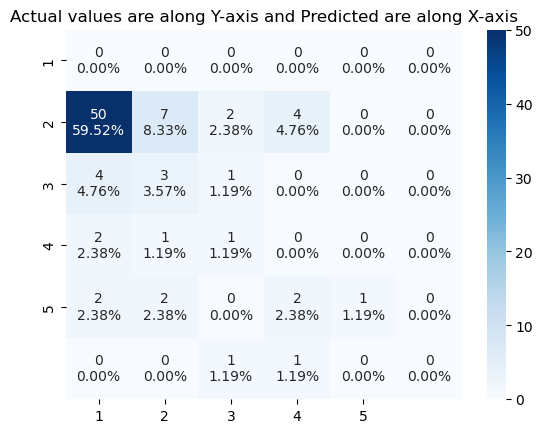

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   
Basic NN with word2vector                    0.772455       0.714286   
Basic NN with word2vector with smote         0.878862       0.666667   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866  
Basic NN with word2vector                   0.000000    0.669580   0.913909  
Basic NN with word2vector with smote        0.098009    0.317546   1.235485

In [355]:
# score of test data

error_score_train,error_score_test,f1_score_test =model_performance(NN_model,X_train_word2vec_smote,
                                                                    y_train_1_new, X_test_1,y_test_1,y_test_1_new,'Actual values are along Y-axis and Predicted are along X-axis')
temp= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['Basic NN with word2vector with smote'])
Model_accuracy = Model_accuracy.append(temp)
Model_accuracy

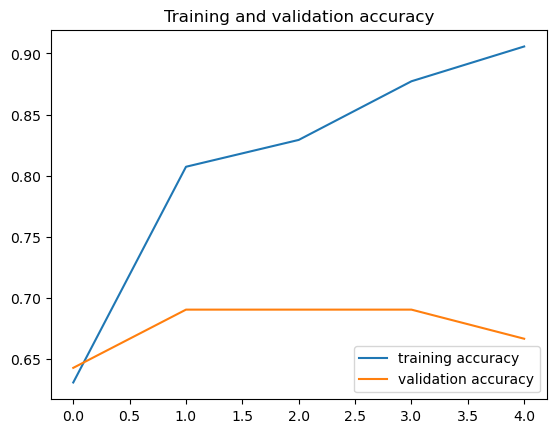

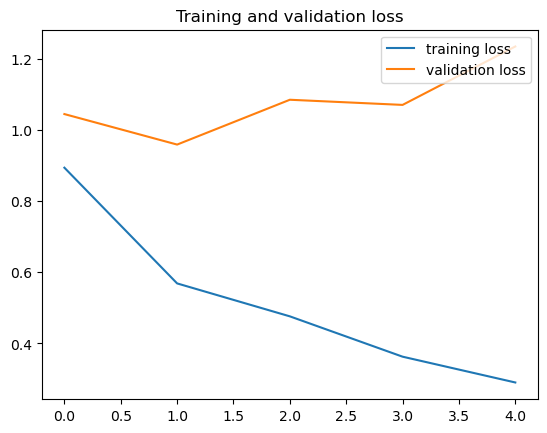

In [356]:
plot_accuracy(NN_model_word2vec_smote_history)

### 5. Building a basic Nueral network with the input feature as Categorical + description  with Glove

In [357]:
# Build neural network
NN_model = Sequential()
NN_model.add(Dense(512, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(5, activation='softmax'))
NN_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics= "accuracy")

In [358]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)
# Converting the categorical values to one-hot encoding
y_train_2_new = pd.get_dummies(y_train_2)
y_test_2_new = pd.get_dummies(y_test_2)
print(y_train_2_new.shape)
print(y_test_2_new.shape)

(334, 61)
(334,)
(84, 61)
(84,)
(334, 5)
(84, 5)


In [359]:
NN_model_glove_history = NN_model.fit(X_train_2, y_train_2_new, 
              validation_data =(X_test_2,y_test_2_new), epochs=5, batch_size=12)

Epoch 1/5
28/28 [==============================] - 1s 12ms/step - loss: 1.0899 - accuracy: 0.7186 - val_loss: 0.8846 - val_accuracy: 0.7500
Epoch 2/5
28/28 [==============================] - 0s 6ms/step - loss: 0.9120 - accuracy: 0.7275 - val_loss: 0.8768 - val_accuracy: 0.7381
Epoch 3/5
28/28 [==============================] - 0s 7ms/step - loss: 0.8437 - accuracy: 0.7305 - val_loss: 0.8429 - val_accuracy: 0.7143
Epoch 4/5
28/28 [==============================] - 0s 5ms/step - loss: 0.7741 - accuracy: 0.7425 - val_loss: 0.9421 - val_accuracy: 0.7262
Epoch 5/5
28/28 [==============================] - 0s 5ms/step - loss: 0.7333 - accuracy: 0.7395 - val_loss: 0.8327 - val_accuracy: 0.6905


3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        63
           2       0.08      0.12      0.10         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.01        84
   macro avg       0.01      0.02      0.02        84
weighted avg       0.01      0.01      0.01        84



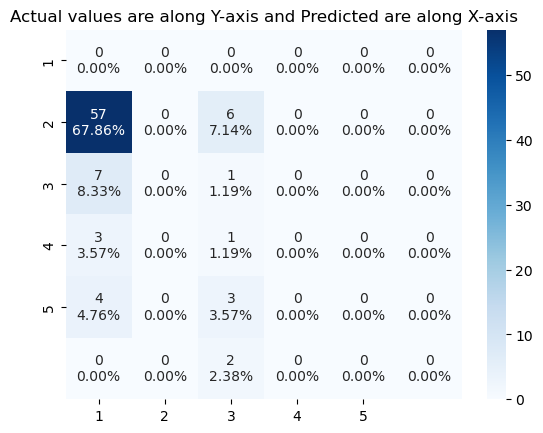

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   
Basic NN with word2vector                    0.772455       0.714286   
Basic NN with word2vector with smote         0.878862       0.666667   
Basic NN with Glove                          0.748503       0.690476   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866  
Basic NN with word2vector                   0.000000    0.669580   0.913909  
Basic NN with word2vector with smote        0.098009    0.317546   1.235485  
Basic NN with Glove                         0.015873    0.660935   0.832682

In [360]:
# score of test data

error_score_train,error_score_test,f1_score_test =model_performance(NN_model,X_train_2,
                                                                    y_train_2_new, X_test_2,y_test_2,y_test_2_new,'Actual values are along Y-axis and Predicted are along X-axis')
temp= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['Basic NN with Glove'])
Model_accuracy = Model_accuracy.append(temp)
Model_accuracy

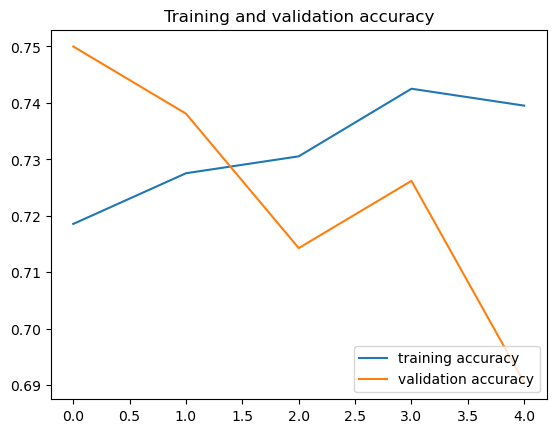

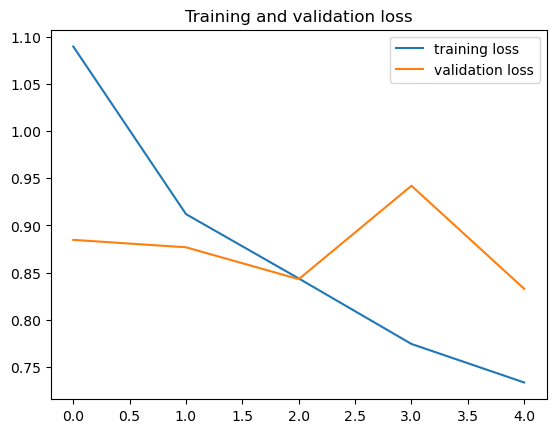

In [361]:
plot_accuracy(NN_model_glove_history)

### 6. Building a basic Nueral network with the input feature as Categorical + description  with Glove smote

In [365]:
print(X_train_glove_smote.shape)
print(y_train_glove_smote.shape)
print(X_test_2.shape)
print(y_test_2.shape)
# Converting the categorical values to one-hot encoding
y_train_2_new = pd.get_dummies(y_train_glove_smote)
y_test_2_new = pd.get_dummies(y_test_2)
print(y_train_2_new.shape)
print(y_test_2_new.shape)

(1230, 61)
(1230,)
(84, 61)
(84,)
(1230, 5)
(84, 5)


In [366]:
NN_model_glove_smote_history = NN_model.fit(X_train_glove_smote, y_train_2_new, 
              validation_data =(X_test_2,y_test_2_new), epochs=5, batch_size=12)

Epoch 1/5
103/103 [==============================] - 0s 4ms/step - loss: 0.8481 - accuracy: 0.6667 - val_loss: 0.9311 - val_accuracy: 0.6310
Epoch 2/5
103/103 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7927 - val_loss: 1.1014 - val_accuracy: 0.6667
Epoch 3/5
103/103 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8618 - val_loss: 1.1407 - val_accuracy: 0.6548
Epoch 4/5
103/103 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8748 - val_loss: 1.1338 - val_accuracy: 0.7024
Epoch 5/5
103/103 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8894 - val_loss: 1.1893 - val_accuracy: 0.6667


3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.08      0.15        63
           2       0.20      0.12      0.15         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.07        84
   macro avg       0.20      0.03      0.05        84
weighted avg       0.77      0.07      0.12        84



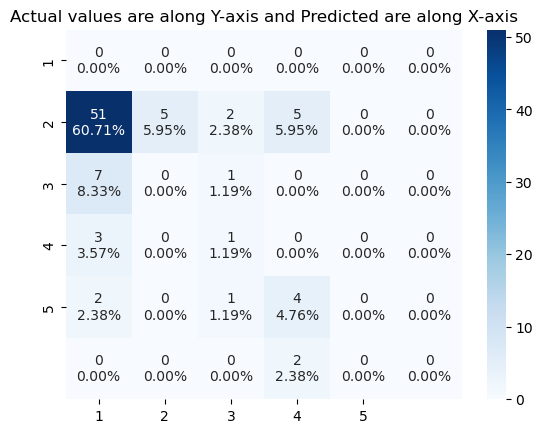

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   
Basic NN with word2vector                    0.772455       0.714286   
Basic NN with word2vector with smote         0.878862       0.666667   
Basic NN with Glove                          0.748503       0.690476   
Basic NN with Glove with smote               0.907317       0.666667   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866  
Basic NN with word2vector                   0.000000    0.669580   0.913909  
Basic NN with word2vector with smote        0.098009    0.317546   1.235485  
Basic NN with Glove                         0.015873    0.660935   0.832682  
Basic NN with Glove with smote              0.050151    0.251440   1.189308

In [367]:
# score of test data

error_score_train,error_score_test,f1_score_test =model_performance(NN_model,X_train_glove_smote,
                                                                    y_train_2_new, X_test_2,y_test_2,y_test_2_new,'Actual values are along Y-axis and Predicted are along X-axis')
temp= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['Basic NN with Glove with smote'])
Model_accuracy = Model_accuracy.append(temp)
Model_accuracy

In [368]:
Model_accuracy

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   
Basic NN with word2vector                    0.772455       0.714286   
Basic NN with word2vector with smote         0.878862       0.666667   
Basic NN with Glove                          0.748503       0.690476   
Basic NN with Glove with smote               0.907317       0.666667   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866  
Basic NN with word2vector                   0.000000    0.669580   0.913909  
Basic NN with word2vector with smote        0.098009    0.317546   1.235485  
Basic NN with Glove                         0.015873    0.660935   0.832682  
Basic NN with Glove with smote              0.050151    0.251440   1.189308

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">Step 2: Design, train and test RNN or LSTM classifiers

In [639]:
# Pre-Processing Methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep Learning Libraries

from keras.utils import np_utils
from keras.utils import plot_model
from keras.layers import Input
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [640]:
# Simple RNN Model

rnn = Sequential()

rnn.add(SimpleRNN(units = 50, activation='relu', return_sequences=True, input_shape= (X_train_ifidf_smote_pca.shape[1],1)))
rnn.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
rnn.add(SimpleRNN(units = 50, activation='relu', return_sequences=True))
rnn.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
rnn.add(SimpleRNN(units = 50, activation='relu', return_sequences=True))
rnn.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
rnn.add(SimpleRNN(units = 50))
rnn.add(Dropout(0.2))

#Adding the output layer
rnn.add(Dense(units = 1))

#Compile the RNN
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#Fitting the RNN to the Training set
rnn_training_history = rnn.fit(X_train_ifidf_smote_pca, y_train_ifidf_smote, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/10
34/34 [==============================] - 7s 38ms/step - loss: -14.9482 - acc: 0.1593 - val_loss: -7.5255 - val_acc: 0.7302
Epoch 2/10
34/34 [==============================] - 0s 7ms/step - loss: -29.6196 - acc: 0.1991 - val_loss: -7.8773 - val_acc: 0.7381
Epoch 3/10
34/34 [==============================] - 0s 9ms/step - loss: -29.9513 - acc: 0.2000 - val_loss: -7.9623 - val_acc: 0.7381
Epoch 4/10
34/34 [==============================] - 0s 8ms/step - loss: -30.3842 - acc: 0.2000 - val_loss: -8.3508 - val_acc: 0.7381
Epoch 5/10
34/34 [==============================] - 0s 9ms/step - loss: -30.4399 - acc: 0.2000 - val_loss: -8.3508 - val_acc: 0.7381
Epoch 6/10
34/34 [==============================] - 0s 9ms/step - loss: -30.4985 - acc: 0.2000 - val_loss: -8.3508 - val_acc: 0.7381
Epoch 7/10
34/34 [==============================] - 0s 9ms/step - loss: -30.4459 - acc: 0.2000 - val_loss: -8.3508 - val_acc: 0.7381
Epoch 8/10
34/34 [==============================] - 0s 9ms/step - lo

In [641]:
y_test_pred = (rnn.predict(X_test_pca) > 0.5).astype("int32")
y_train_pred = (rnn.predict(X_train_ifidf_smote_pca) > 0.5).astype("int32")

metrics= get_metric_score(y_train_pred,y_test_pred,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Simple RNN'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

34/34 [==============================] - 0s 3ms/step


Train_accuracy  Test_Accuracy  \
Random Forest tf-idf                              0.967593       0.333333   
Naive Bayes tf-idf                                0.255556       0.039683   
Logistic Regression tf-idf                        0.250926       0.095238   
SVM tf-idf                                        0.967593       0.333333   
KNN tf-idf                                        0.809259       0.309524   
Decision Tree tf-idf                              0.967593       0.333333   
Gradient Boosting tf-idf                          0.807407       0.269841   
Gradient Boosting tf-idf hyper param tuned        0.999074       0.333333   
NB Glove                                          0.308219       0.238095   
Random Forest Word2Vec                            0.991018       0.738095   
Simple RNN                                        0.200000       0.738095   

                                            Train_Recall  Test_Recall  \
Random Forest tf-idf                            0.967593     0.333333   
Naive Bayes tf-idf                              0.255556     0.039683   
Logistic Regression tf-idf                      0.250926     0.095238   
SVM tf-idf                                      0.967593     0.333333   
KNN tf-idf                                      0.809259     0.309524   
Decision Tree tf-idf                            0.967593     0.333333   
Gradient Boosting tf-idf                        0.807407     0.269841   
Gradient Boosting tf-idf hyper param tuned      0.999074     0.333333   
NB Glove                                        0.308219     0.238095   
Random Forest Word2Vec                          0.991018     0.738095   
Simple RNN                                      0.200000     0.738095   

                                            Train_Precision  Test_Precision  
Random Forest tf-idf                               0.967593        0.333333  
Naive Bayes tf-idf                                 0.255556        0.039683  
Logistic Regression tf-idf                         0.250926        0.095238  
SVM tf-idf                                         0.967593        0.333333  
KNN tf-idf                                         0.809259        0.309524  
Decision Tree tf-idf                               0.967593        0.333333  
Gradient Boosting tf-idf                           0.807407        0.269841  
Gradient Boosting tf-idf hyper param tuned         0.999074        0.333333  
NB Glove                                           0.308219        0.238095  
Random Forest Word2Vec                             0.991018        0.738095  
Simple RNN                                         0.200000        0.738095

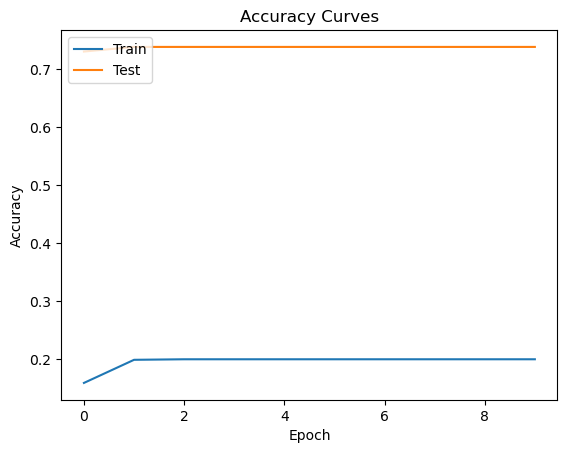

In [642]:
plt.plot(rnn_training_history.history['acc'])
plt.plot(rnn_training_history.history['val_acc'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

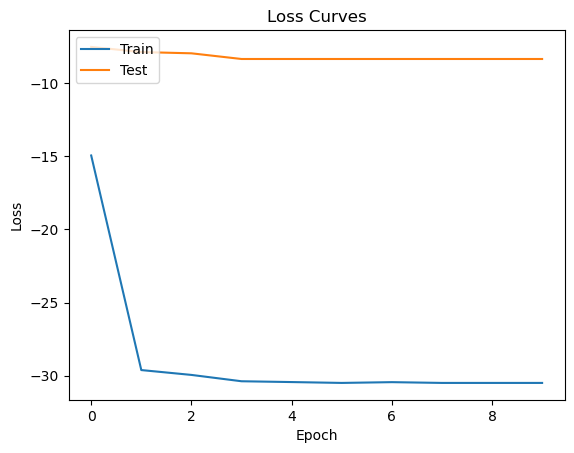

In [643]:
plt.plot(rnn_training_history.history['loss'])
plt.plot(rnn_training_history.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [644]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        93
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         3

    accuracy                           0.74       126
   macro avg       0.15      0.20      0.17       126
weighted avg       0.54      0.74      0.63       126



In [645]:
X = read_df_cleaned_data['Description']
y = read_df_cleaned_data['Accident Level']

# Encode labels in column 'Accident Level'.
y = LabelEncoder().fit_transform(y)


# Divide the dataset into test and train:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

print('X_train shape : ({0})'.format(X_train.shape[0]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0})'.format(X_test.shape[0]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

# Convert both the train and test labels into one-hot encoded vectors:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


# The first step in word embeddings is to convert the words into their corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


# Need to pad the sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open(r'glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

# for word, index in tokenizer.word_index.items():
#     embedding_vector = embeddings_dictionary.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[index] = embedding_vector

# len(embeddings_dictionary.values())

X_train shape : (334)
y_train shape : (334,)
X_test shape : (84)
y_test shape : (84,)
vocab_size: 2216


In [646]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [647]:
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 200)          443200    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896 

In [648]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
42/42 [==============================] - 15s 216ms/step - loss: 1.5614 - acc: 0.7395 - val_loss: 1.4942 - val_acc: 0.7381
Epoch 2/100
42/42 [==============================] - 8s 181ms/step - loss: 1.4328 - acc: 0.7395 - val_loss: 1.3727 - val_acc: 0.7381
Epoch 3/100
42/42 [==============================] - 8s 182ms/step - loss: 1.3207 - acc: 0.7395 - val_loss: 1.2737 - val_acc: 0.7381
Epoch 4/100
42/42 [==============================] - 7s 177ms/step - loss: 1.2322 - acc: 0.7395 - val_loss: 1.1927 - val_acc: 0.7381
Epoch 5/100
42/42 [==============================] - 9s 211ms/step - loss: 1.1614 - acc: 0.7395 - val_loss: 1.1323 - val_acc: 0.7381
Epoch 6/100
42/42 [==============================] - 8s 181ms/step - loss: 1.1074 - acc: 0.7395 - val_loss: 1.0851 - val_acc: 0.7381
Epoch 7/100
42/42 [==============================] - 8s 188ms/step - loss: 1.0653 - acc: 0.7395 - val_loss: 1.0495 - val_acc: 0.7381
Epoch 8/100
42/42 [==============================] - 8s 195ms/step -

In [649]:
read_df_mtr = pd.DataFrame(columns=['Train_accuracy', 'Test_Accuracy', "Train_Recall", "Test_Recall", "Train_Precision", 
                                   "Test_Precision"])
read_df_mtr

Empty DataFrame
Columns: [Train_accuracy, Test_Accuracy, Train_Recall, Test_Recall, Train_Precision, Test_Precision]
Index: []

In [656]:
# get the accuracy, precision, recall, from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall

In [657]:
train_accuracy, train_precision, train_recall = get_classification_metrics(model, X_train, y_train, target_type)
test_accuracy, test_precision, test_recall = get_classification_metrics(model, X_test, y_test, target_type)

temp = pd.DataFrame({"Train_accuracy":train_accuracy,
                               "Test_Accuracy":test_accuracy,
                              "Train_Recall":train_recall,
                              "Test_Recall":test_recall,
                              "Train_Precision":train_precision,
                              "Test_Precision":test_precision },index=['RNN Model'])

read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

3/3 [==============================] - 0s 66ms/step


Train_accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
RNN Model        0.739521       0.738095      0.739521     0.738095   

           Train_Precision  Test_Precision  
RNN Model         0.739521        0.738095

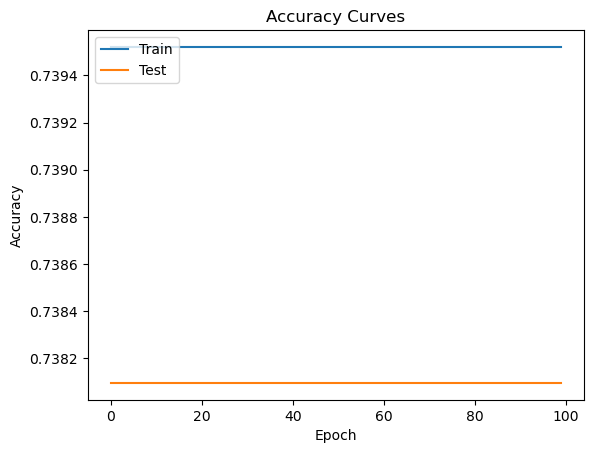

In [658]:
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

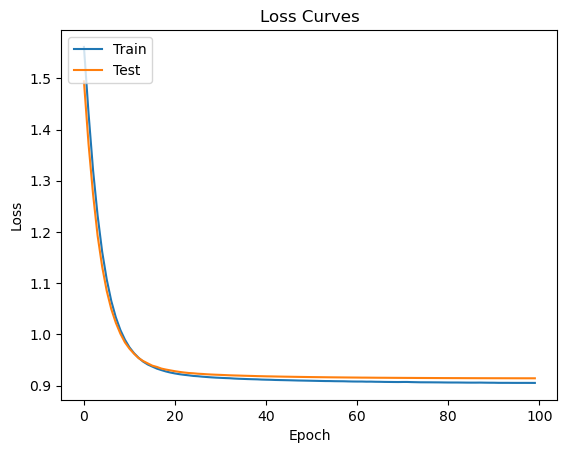

In [659]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [660]:
train_rnn = model.evaluate(X_train, y_train, verbose=0)
train_rnn

[0.9049740433692932, 0.7395209670066833]

In [661]:
test_rnn = model.evaluate(X_test, y_test, verbose=0)
test_rnn

[0.9142917394638062, 0.738095223903656]

In [663]:
y_pred = model.predict(X_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
#matrix

In [664]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.7380952380952381

In [212]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        85
weighted avg       0.55      0.74      0.63        85



In [214]:
f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1),average = 'weighted')

0.6310015898251192

# LSTM

In [667]:
read_df_dummy_encoding1.head()

Accident Level  Potential Accident Level  \
0               1                         3   
1               1                         3   
2               1                         2   
3               1                         0   
4               4                         3   

                                                                                                                                                                                                                                                                                                                                      Description  \
0                                                                      remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                                                                                           activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   
2                                                                                                                                                         substation milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury   
3  approximately nv cx ob personnel begin task unlock soquet bolt bhb machine penultimate bolt identify hexagonal head wear proceed mr cristobal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moments two collaborators rotate lever anticlockwise direction leave key bolt hit palm leave hand cause injury   
4                                          approximately circumstances mechanics anthony group leader eduardo eric fernandezinjuredthe three company impromec perform removal pulley motor pump zaf marcy cm length cm weight kg lock proceed heat pulley loosen come fall distance meter high hit instep right foot worker cause injury describe   

   Year  Month  Date  Day_of_week  Country_01  Country_02  Country_03  ...  \
0     0      4     0            0        True       False       False  ...   
1     0      4     1            2       False        True       False  ...   
2     0      4     5            6        True       False       False  ...   
3     0      4     7            0        True       False       False  ...   
4     0      4     9            3        True       False       False  ...   

   CR_Projection  CR_Projection/Burning  CR_Projection/Choco  \
0          False                  False                False   
1          False                  False                False   
2          False                  False                False   
3          False                  False                False   
4          False                  False                False   

   CR_Projection/Manual_Tools  CR_Projection_of_fragments  CR_Suspended_Loads  \
0                       False                       False               False   
1                       False                       False               False   
2                       False                       False               False   
3                       False                       False               False   
4                       False                       False               False   

   CR_Traffic  CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  \
0       False                             False                False   
1       False                             False                False   
2       False                             False                False   
3       False                             Fa

In [670]:
# Assumed target_column would be Accident Level, so droping irrelevant columns
read_df_dummy_encoding1 = read_df_dummy_encoding.copy(deep=True)
X = read_df_dummy_encoding1.drop(['Accident Level', 'Description'], axis=1)  
# Assuming 'Accident Level' is the target variable
y = read_df_dummy_encoding1['Accident Level']

In [671]:
# Splitting the data into training and testing sets
# By default, it splits 75% for training and 25% for testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train1.shape

(313, 61)

In [684]:
#print(X_train1.dtypes)
#print(y_train1.dtypes)
X_train1 = X_train1.astype('float')
X_test1 = X_test1.astype('float')

In [685]:
embedding_size = 32  # Adjust as needed
max_words = 1000  # Adjust as needed

model1 = Sequential()
model1.add(Embedding(max_words, embedding_size, input_length=X.shape[1]))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))  # For binary classification; adjust for multi-class

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist1 = model1.fit(X_train1, y_train1, epochs=10, batch_size=64, validation_split=0.2, validation_data=(X_test1, y_test1))

Epoch 1/10
5/5 [==============================] - 7s 503ms/step - loss: 0.6064 - accuracy: 0.7348 - val_loss: 0.4595 - val_accuracy: 0.7524
Epoch 2/10
5/5 [==============================] - 1s 119ms/step - loss: 0.2708 - accuracy: 0.7348 - val_loss: -0.3466 - val_accuracy: 0.7524
Epoch 3/10
5/5 [==============================] - 1s 110ms/step - loss: -1.3980 - accuracy: 0.7348 - val_loss: -2.7191 - val_accuracy: 0.7524
Epoch 4/10
5/5 [==============================] - 1s 114ms/step - loss: -2.9149 - accuracy: 0.7348 - val_loss: -3.6258 - val_accuracy: 0.7524
Epoch 5/10
5/5 [==============================] - 0s 107ms/step - loss: -3.7942 - accuracy: 0.7348 - val_loss: -4.5210 - val_accuracy: 0.7524
Epoch 6/10
5/5 [==============================] - 1s 112ms/step - loss: -4.6810 - accuracy: 0.7348 - val_loss: -5.3748 - val_accuracy: 0.7524
Epoch 7/10
5/5 [==============================] - 0s 104ms/step - loss: -5.4179 - accuracy: 0.7348 - val_loss: -6.1118 - val_accuracy: 0.7524
Epoch 8/1

In [686]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, print classification report as
print(classification_report(y_test, y_pred))

3/3 [==============================] - 0s 70ms/step
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

   micro avg       0.74      0.74      0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84
 samples avg       0.74      0.74      0.74        84



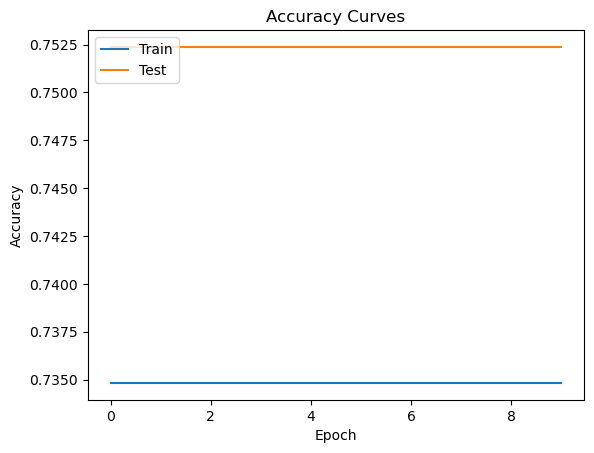

In [689]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

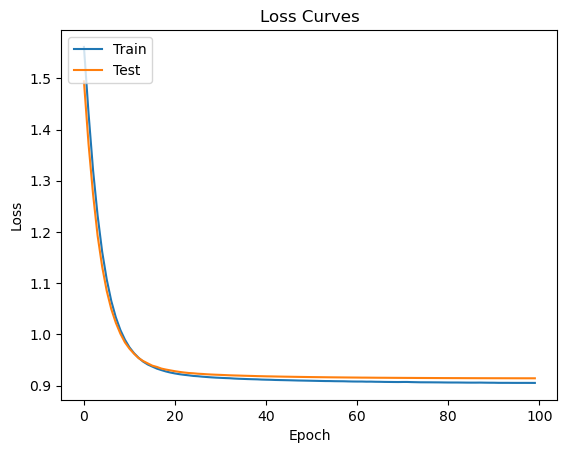

In [690]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">XLNET

In [105]:
# !pip install transformers
from transformers import TFXLNetModel, XLNetTokenizer
import tensorflow as tf

In [106]:
x_xlnet = read_df_dummy_encoding['Description'].to_numpy().reshape(-1)
y_xlnet = read_df_dummy_encoding['Accident Level'].to_numpy().reshape(-1)
y_xlnet = pd.get_dummies(y_xlnet)

In [107]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_xlnet,y_xlnet,test_size=0.2,random_state=42)

In [108]:
xlnet_model = 'xlnet-large-cased'
xlnet_tokenizer = XLNetTokenizer.from_pretrained(xlnet_model)
number_of_classes = 5

In [109]:
def create_xlnet(mname):
    word_inputs = tf.keras.Input(shape=(120,), name='word_inputs', dtype='int32')


    xlnet = TFXLNetModel.from_pretrained(mname)
    xlnet_encodings = xlnet(word_inputs)[0]

    doc_encoding = tf.squeeze(xlnet_encodings[:, -1:, :], axis=1)

    doc_encoding = tf.keras.layers.Dropout(.1)(doc_encoding)
#     doc_encoding = tf.keras.layers.Dropout(.1)(xlnet_encodings)
    outputs = tf.keras.layers.Dense(number_of_classes, activation='softmax', name='outputs')(doc_encoding)

    model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model


In [110]:
xlnet = create_xlnet(xlnet_model)

Some layers from the model checkpoint at xlnet-large-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-large-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


In [111]:
xlnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_inputs (InputLayer)    [(None, 120)]             0         
                                                                 
 tfxl_net_model (TFXLNetMode  TFXLNetModelOutput(last_  360268800
 l)                          hidden_state=(None, 120,            
                              1024),                             
                              mems=((120, None, 1024)            
                             , (120, None, 1024),                
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),             

In [112]:
def get_inputs(text, tokenizer, max_len= 120):
    """ Gets tensors from text using the tokenizer provided"""
    inps = [tokenizer.encode_plus(t, max_length=max_len, pad_to_max_length=True, add_special_tokens=True) for t in text]
    inp_tok = np.array([a['input_ids'] for a in inps])
    ids = np.array([a['attention_mask'] for a in inps])
    segments = np.array([a['token_type_ids'] for a in inps])
    return inp_tok, ids, segments

In [113]:
inp_tok, ids, segments = get_inputs(xtrain, xlnet_tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [132]:
out_tok, ids, segments = get_inputs(xtest, xlnet_tokenizer)

In [114]:
def warmup(epoch, lr):
    """Used for increasing the learning rate slowly, this tends to achieve better convergence.
    However, as we are finetuning for few epoch it's not crucial.
    """
    return max(lr +1e-6, 2e-5)

In [115]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.02, restore_best_weights=True),
    tf.keras.callbacks.LearningRateScheduler(warmup, verbose=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=1e-6, patience=2, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=1e-6)
]

In [116]:
# import warnings
# warnings.filterwarnings("ignore")
hist = xlnet.fit(x=inp_tok, y= ytrain, epochs=3, batch_size = 4, validation_split=0.15, callbacks=callbacks)


Epoch 1/3
71/71 [==============================] - 3455s 48s/step - loss: 1.9750 - accuracy: 0.5936 - val_loss: 1.0104 - val_accuracy: 0.8235 - lr: 2.1000e-05
Epoch 2/3
71/71 [==============================] - 3409s 48s/step - loss: 1.3267 - accuracy: 0.6431 - val_loss: 1.2198 - val_accuracy: 0.8235 - lr: 2.2000e-05
Epoch 3/3
71/71 [==============================] - 3301s 47s/step - loss: 1.5083 - accuracy: 0.6643 - val_loss: 0.8497 - val_accuracy: 0.8235 - lr: 2.3000e-05


In [130]:
xlnet.evaluate(inp_tok,ytrain)

11/11 [==============================] - 169s 15s/step - loss: 0.9810 - accuracy: 0.7365


[0.980981171131134, 0.7365269660949707]

In [133]:
xlnet.evaluate(out_tok,ytest)

3/3 [==============================] - 41s 13s/step - loss: 0.9611 - accuracy: 0.7500


[0.9611147046089172, 0.75]

In [135]:
pred_xlnet = xlnet.predict(out_tok)

3/3 [==============================] - 53s 14s/step


In [147]:
ytest1 = np.asarray(ytest)
accuracy_score(ytest1.argmax(axis=1), pred_xlnet.argmax(axis=1))

0.75

In [149]:
confusion_matrix(ytest1.argmax(axis=1), pred_xlnet.argmax(axis=1))

array([[63,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0]], dtype=int64)

In [151]:
print(classification_report(ytest1.argmax(axis=1), pred_xlnet.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84



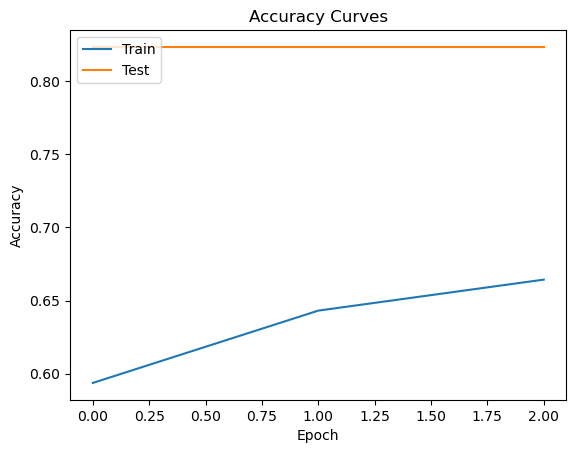

In [119]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

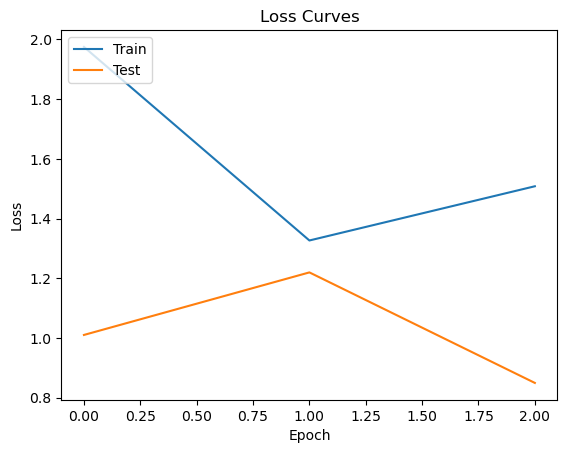

In [120]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">RoBERTA

In [296]:
import regex as re
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [297]:
MODEL_NAME = 'roberta-base'
MAX_LEN = 256
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 8 
EPOCHS = 3

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

In [298]:
read_df_cpy_bert = read_df_dummy_encoding.copy(deep=True)

In [299]:
X_data = read_df_cpy_bert[['Description']].to_numpy().reshape(-1)
y_data = read_df_cpy_bert[['Accident Level']].to_numpy().reshape(-1)

In [300]:
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)
        
        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])
        
        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN
        
        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')
        
        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [301]:
# Transform categories into numbers
category_to_id = {}
category_to_name = {}

for index, c in enumerate(y_data):
    if c in category_to_id:
        category_id = category_to_id[c]
    else:
        category_id = len(category_to_id)
        category_to_id[c] = category_id
        category_to_name[category_id] = c
    
    y_data[index] = category_id

# Display dictionary
category_to_name

{0: 1, 1: 4, 2: 3, 3: 2, 4: 5}

In [318]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42) # random_state to reproduce results

In [319]:
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

In [320]:
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train_new = np.asarray(y_train, dtype='int32')
y_test_new = np.asarray(y_test, dtype='int32')

In [321]:
def build_model(n_categories):
    input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
    input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
    input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

    # Import RoBERTa model from HuggingFace
    roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
    x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

    # Huggingface transformers have multiple outputs, embeddings are the first one,
    # so let's slice out the first position
    x = x[0]

    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(n_categories, activation='softmax')(x)

    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=1e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [322]:
categories = read_df_cpy_bert["Accident Level"].unique()
n_categories = len(categories)

In [323]:
model = build_model(n_categories)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'roberta.embeddings.position_ids', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 256)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                            

In [324]:
print('Roberta Training...')
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    validation_data=(X_test, y_test))

Roberta Training...
Epoch 1/3


37/37 [==============================] - 954s 24s/step - loss: 14.6318 - accuracy: 0.5308 - val_loss: 5.5848 - val_accuracy: 0.7460
Epoch 2/3
37/37 [==============================] - 795s 22s/step - loss: 3.5360 - accuracy: 0.6199 - val_loss: 1.0467 - val_accuracy: 0.7460
Epoch 3/3
37/37 [==============================] - 795s 22s/step - loss: 1.0078 - accuracy: 0.7295 - val_loss: 0.9831 - val_accuracy: 0.7460


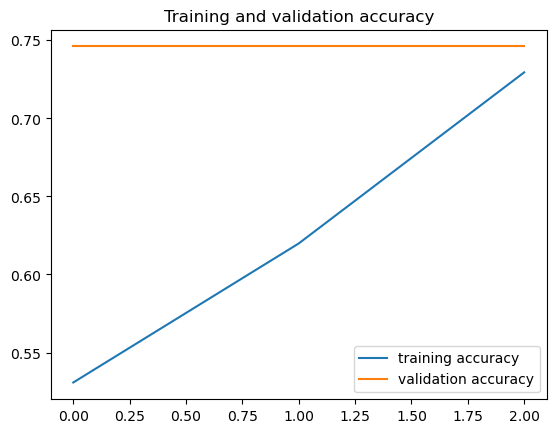

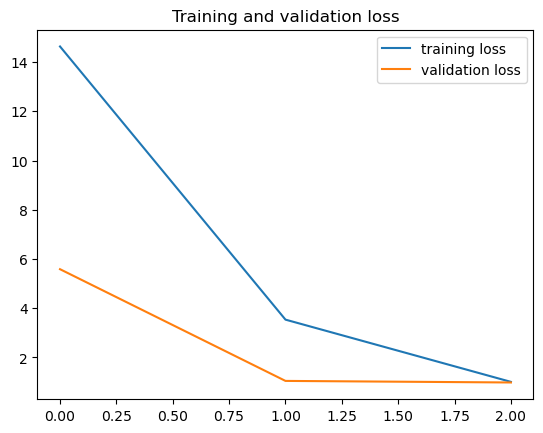

In [325]:
plot_accuracy(history)

4/4 [==============================] - 97s 24s/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        94
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2

    accuracy                           0.75       126
   macro avg       0.15      0.20      0.17       126
weighted avg       0.56      0.75      0.64       126



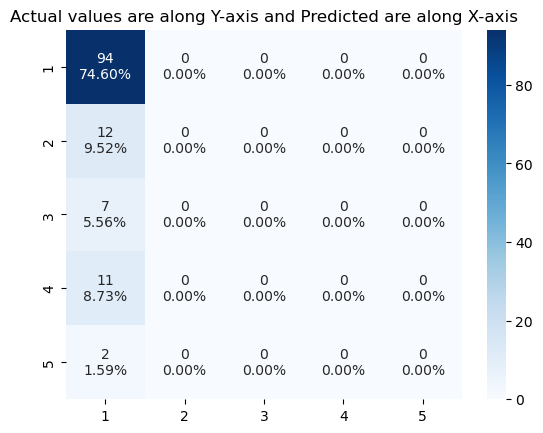

Train Accuracy  Test Accuracy  Test F1 Score  Train Loss  Test Loss
RoBERTa        0.736301       0.746032       0.170909    0.989859   0.983124

In [328]:
error_score_train,error_score_test,f1_score_test =model_performance(model,X_train,
                                                                    y_train_new, X_test,y_test,y_test_new,'Actual values are along Y-axis and Predicted are along X-axis')
Model_accuracy= pd.DataFrame({"Train Accuracy":error_score_train[1],
                              "Test Accuracy":error_score_test[1],
                              "Test F1 Score": f1_score_test,
                              "Train Loss": error_score_train[0],
                              "Test Loss": error_score_test[0]
                             },index=['RoBERTa'])
Model_accuracy

2 Categorical + description with tf idf vector

original data : data_features_ifidf,X_features_tfidf,y_feature

Before applying smote : X_train, X_test, y_train, y_test

after applying smote(Tran data) : X_train_ifidf_smote, y_train_ifidf_smote

after applying pca(X data) : X_train_ifidf_smote_pca,X_test_pca

In [329]:
# Transform categories into numbers
category_to_id = {}
category_to_name = {}

for index, c in enumerate(y_data):
    if c in category_to_id:
        category_id = category_to_id[c]
    else:
        category_id = len(category_to_id)
        category_to_id[c] = category_id
        category_to_name[category_id] = c
    
    y_feature[index] = category_id

# Display dictionary
category_to_name

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [330]:
# Split into train and test datasets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_features_tfidf, y_feature, test_size=0.3, random_state=42) # random_state to reproduce results

In [331]:
y_train_1 = np.asarray(y_train_1, dtype='int32')
y_test_1 = np.asarray(y_test_1, dtype='int32')

In [332]:
X_train_1 = roberta_encode(X_train_1, tokenizer)
X_test_1 = roberta_encode(X_test_1, tokenizer)

In [333]:
print('Training...')
history1 = model.fit(X_train_1,
                    y_train_1,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    validation_data=(X_test_1, y_test_1))


Training...
Epoch 1/3


37/37 [==============================] - 1401s 37s/step - loss: 1.0342 - accuracy: 0.7432 - val_loss: 1.1670 - val_accuracy: 0.7460
Epoch 2/3
37/37 [==============================] - 1459s 39s/step - loss: 1.1243 - accuracy: 0.6918 - val_loss: 1.1471 - val_accuracy: 0.7460
Epoch 3/3
37/37 [==============================] - 1276s 35s/step - loss: 1.1863 - accuracy: 0.6986 - val_loss: 0.9987 - val_accuracy: 0.7460


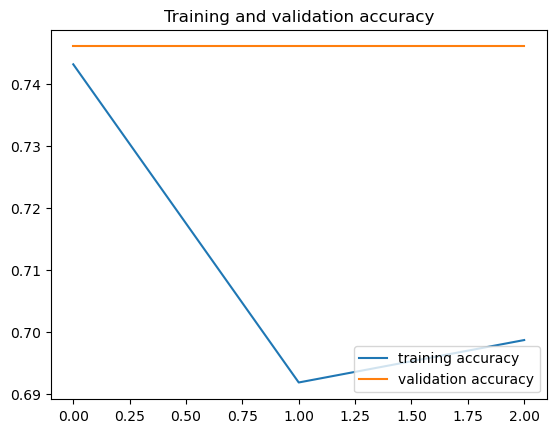

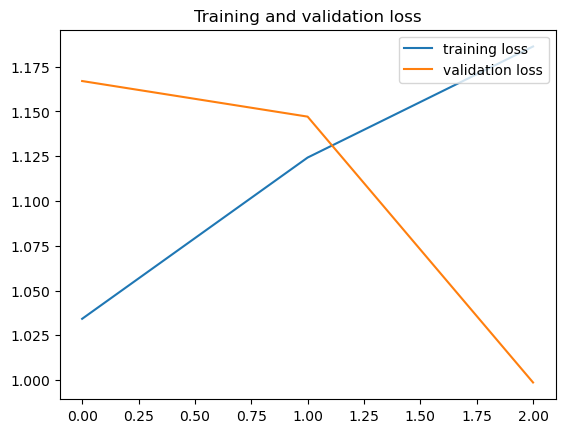

In [334]:
plot_accuracy(history1)

4/4 [==============================] - 162s 39s/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        94
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2

    accuracy                           0.75       126
   macro avg       0.15      0.20      0.17       126
weighted avg       0.56      0.75      0.64       126



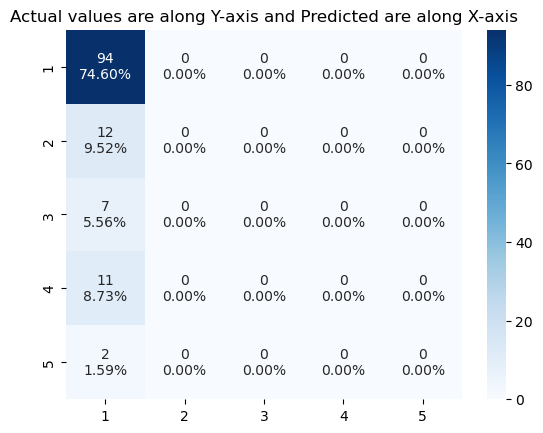

Train Accuracy  Test Accuracy  Test F1 Score  Train Loss  \
RoBERTa                    0.736301       0.746032       0.170909    0.989859   
RoBERTa with tf-idf        0.736301       0.746032       0.170909    1.003828   

                     Test Loss  
RoBERTa               0.983124  
RoBERTa with tf-idf   0.998682

In [335]:
error_score_train_1,error_score_test_1,f1_score_test_1 =model_performance(model,X_train_1,
                                                                    y_train_new, X_test_1,y_test_1,y_test_new,'Actual values are along Y-axis and Predicted are along X-axis')
Model_accuracy1= pd.DataFrame({"Train Accuracy":error_score_train_1[1],
                              "Test Accuracy":error_score_test_1[1],
                              "Test F1 Score": f1_score_test_1,
                              "Train Loss": error_score_train_1[0],
                              "Test Loss": error_score_test_1[0]
                             },index=['RoBERTa with tf-idf'])
Model_accuracy=Model_accuracy.append(Model_accuracy1)
Model_accuracy

### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Step 3: Choose the best performing classifier and pickle it

### Comparing the model accuracy, precision, recall & f1-score, train & test loss of all models built, train & tested as below

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1. Model_accuracy of Neura Networks

In [368]:
Model_accuracy

Train Accuracy  Test Accuracy  \
Basic NN with ifidf vector                   0.746575       0.730159   
Basic NN with ifidf vector with smote        0.942593       0.690476   
Basic NN with word2vector                    0.772455       0.714286   
Basic NN with word2vector with smote         0.878862       0.666667   
Basic NN with Glove                          0.748503       0.690476   
Basic NN with Glove with smote               0.907317       0.666667   

                                       Test F1 Score  Train Loss  Test Loss  
Basic NN with ifidf vector                  0.003546    0.659112   0.903526  
Basic NN with ifidf vector with smote       0.108553    0.210431   1.107866  
Basic NN with word2vector                   0.000000    0.669580   0.913909  
Basic NN with word2vector with smote        0.098009    0.317546   1.235485  
Basic NN with Glove                         0.015873    0.660935   0.832682  
Basic NN with Glove with smote              0.050151    0.251440   1.189308

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2. Model_accuracy of RNN

In [641]:
y_test_pred = (rnn.predict(X_test_pca) > 0.5).astype("int32")
y_train_pred = (rnn.predict(X_train_ifidf_smote_pca) > 0.5).astype("int32")

metrics= get_metric_score(y_train_pred,y_test_pred,y_train_ifidf_smote,y_test)
temp = pd.DataFrame({"Train_accuracy":metrics[0],
                               "Test_Accuracy":metrics[1],
                              "Train_Recall":metrics[2],
                              "Test_Recall":metrics[3],
                              "Train_Precision":metrics[4],
                              "Test_Precision":metrics[5] },index=['Simple RNN'])
read_df_mtr= pd.concat([read_df_mtr, pd.DataFrame(temp)])
read_df_mtr

34/34 [==============================] - 0s 3ms/step


Train_accuracy  Test_Accuracy  \
Random Forest tf-idf                              0.967593       0.333333   
Naive Bayes tf-idf                                0.255556       0.039683   
Logistic Regression tf-idf                        0.250926       0.095238   
SVM tf-idf                                        0.967593       0.333333   
KNN tf-idf                                        0.809259       0.309524   
Decision Tree tf-idf                              0.967593       0.333333   
Gradient Boosting tf-idf                          0.807407       0.269841   
Gradient Boosting tf-idf hyper param tuned        0.999074       0.333333   
NB Glove                                          0.308219       0.238095   
Random Forest Word2Vec                            0.991018       0.738095   
Simple RNN                                        0.200000       0.738095   

                                            Train_Recall  Test_Recall  \
Random Forest tf-idf                            0.967593     0.333333   
Naive Bayes tf-idf                              0.255556     0.039683   
Logistic Regression tf-idf                      0.250926     0.095238   
SVM tf-idf                                      0.967593     0.333333   
KNN tf-idf                                      0.809259     0.309524   
Decision Tree tf-idf                            0.967593     0.333333   
Gradient Boosting tf-idf                        0.807407     0.269841   
Gradient Boosting tf-idf hyper param tuned      0.999074     0.333333   
NB Glove                                        0.308219     0.238095   
Random Forest Word2Vec                          0.991018     0.738095   
Simple RNN                                      0.200000     0.738095   

                                            Train_Precision  Test_Precision  
Random Forest tf-idf                               0.967593        0.333333  
Naive Bayes tf-idf                                 0.255556        0.039683  
Logistic Regression tf-idf                         0.250926        0.095238  
SVM tf-idf                                         0.967593        0.333333  
KNN tf-idf                                         0.809259        0.309524  
Decision Tree tf-idf                               0.967593        0.333333  
Gradient Boosting tf-idf                           0.807407        0.269841  
Gradient Boosting tf-idf hyper param tuned         0.999074        0.333333  
NB Glove                                           0.308219        0.238095  
Random Forest Word2Vec                             0.991018        0.738095  
Simple RNN                                         0.200000        0.738095

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3. Model_accuracy of LSTM

In [352]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 1s - loss: 3.1794 - accuracy: 0.4000 - 1s/epoch - 213ms/step
score: 3.18
acc: 0.40


In [351]:
from sklearn.metrics import classification_report

pred1 = model.predict(X_test)

print(classification_report(Y_test.argmax(axis=1), pred1.argmax(axis=1)))

4/4 [==============================] - 0s 53ms/step
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.35      0.41      0.38        22
           2       0.34      0.50      0.41        30
           3       0.53      0.28      0.37        32
           4       0.14      0.25      0.18         4

    accuracy                           0.40       105
   macro avg       0.42      0.38      0.38       105
weighted avg       0.45      0.40      0.41       105



#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4. Model_accuracy of XLNET

In [147]:
ytest1 = np.asarray(ytest)
accuracy_score(ytest1.argmax(axis=1), pred_xlnet.argmax(axis=1))

0.75

In [151]:
print(classification_report(ytest1.argmax(axis=1), pred_xlnet.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84



#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4. Model_accuracy of RoBERTa

4/4 [==============================] - 162s 39s/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        94
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2

    accuracy                           0.75       126
   macro avg       0.15      0.20      0.17       126
weighted avg       0.56      0.75      0.64       126



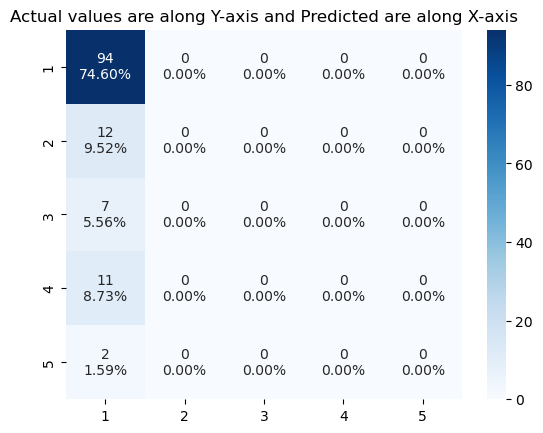

Train Accuracy  Test Accuracy  Test F1 Score  Train Loss  \
RoBERTa                    0.736301       0.746032       0.170909    0.989859   
RoBERTa with tf-idf        0.736301       0.746032       0.170909    1.003828   

                     Test Loss  
RoBERTa               0.983124  
RoBERTa with tf-idf   0.998682

In [335]:
error_score_train_1,error_score_test_1,f1_score_test_1 =model_performance(model,X_train_1,
                                                                    y_train_new, X_test_1,y_test_1,y_test_new,'Actual values are along Y-axis and Predicted are along X-axis')
Model_accuracy1= pd.DataFrame({"Train Accuracy":error_score_train_1[1],
                              "Test Accuracy":error_score_test_1[1],
                              "Test F1 Score": f1_score_test_1,
                              "Train Loss": error_score_train_1[0],
                              "Test Loss": error_score_test_1[0]
                             },index=['RoBERTa with tf-idf'])
Model_accuracy=Model_accuracy.append(Model_accuracy1)
Model_accuracy

### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Conclusion:
    
#### Comparing the model accuracy, precision, recall & f1-score, train & test loss of all models built, train & tested as shown abve RoBERTa is choosen as hte final model to predict the accident level given description and other inputs and same will be saved / picked and loaded for prediction

- Accidental level 1 
    
        precision recall  f1-score   support

        0.75      1.00      0.85        94

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">SAVE / PICKLE MODEL RoBERTa

In [373]:
from tensorflow import keras
import transformers
import torch

In [346]:
model.save("RoBERTa.h5")
model.save_weights("RoBERTa_weights.h5")

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">LOAD RoBERTa

In [347]:
model.load_weights("RoBERTa_weights.h5")

In [352]:
rbta_model = keras.models.load_model("RoBERTa.h5",
                                    custom_objects={"TFRobertaModel": transformers.TFRobertaModel})

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">PREDICT WITH USER INPUT USING RoBERTa

In [381]:
read_df_cpy.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender   Employment Critical Risk  \
0                       IV   Male  Third Party       Pressed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   

   Year Month Date Day_of_week  
0  2016   Jan   01         Fri

In [382]:
desc = "While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."

In [ ]:
# y_pred_rbta_mdl = rbta_model(roberta_encode(desc, tokenizer))
# y_pred_rbta_mdl

In [384]:
usr_desc_pred=rbta_model.predict(roberta_encode(desc, tokenizer))

15/15 [==============================] - 287s 19s/step


In [378]:
usr_desc_pred = usr_desc_pred.flatten()

In [380]:
usr_desc_pred = np.where(usr_desc_pred > 0.6, 1, 0)
usr_desc_pred

array([1, 0, 0, ..., 0, 0, 0])

### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;"> Summary

- Actual accident level as per given description is "I" and same has been predicted in roBERTa model also as shown above.

### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> Milestone 3

In [229]:
import numpy as np
import pandas as pd
df = pd.read_csv('nlp_chatbot_cleaned_set.csv')
df.head(3)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   
2  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender            Employment        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   
2                                                                                     substation milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury   

   Year Month  Date Day_of_week  
0  2016   Jan     1         Fri  
1  2016   Jan     2         Sat  
2  2016   Jan     6         Wed

In [230]:
df['Critical Risk'].unique()

array(['Pressed', 'Pressurized Systems', 'Manual Tools', 'Others',
       'Fall prevention (same level)', 'Chemical substances',
       'Liquid Metal', 'Electrical installation', 'Confined space',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Suspended Loads', 'Poll',
       'Cut', 'Fall', 'Bees', 'Fall prevention', '\nNot applicable',
       'Traffic', 'Projection', 'Venomous Animals', 'Plates',
       'Projection/Burning', 'remains of choco',
       'Vehicles and Mobile Equipment', 'Projection/Choco',
       'Machine Protection', 'Power lock', 'Burn',
       'Projection/Manual Tools', 'Individual protection equipment',
       'Electrical Shock', 'Projection of fragments'], dtype=object)

In [232]:
df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [237]:
Potential_Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'  :   6
}
df_new =pd.concat([df],axis=1)
df_new['Potential_Accident_Level'] = df_new['Potential Accident Level'].map(Potential_Accident_Level)
df_new.head(2)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender   Employment        Critical Risk  \
0                       IV   Male  Third Party              Pressed   
1                       IV   Male     Employee  Pressurized Systems   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

   Year Month  Date Day_of_week  Potential_Accident_Level  
0  2016   Jan     1         Fri                         4  
1  2016   Jan     2         Sat                         4

In [238]:
df_new.drop(['Potential Accident Level'],axis=1,inplace=True)

In [239]:
df_new.head(2)

Country     Local Industry Sector Accident Level Gender   Employment  \
0  Country_01  Local_01          Mining              I   Male  Third Party   
1  Country_02  Local_02          Mining              I   Male     Employee   

         Critical Risk  \
0              Pressed   
1  Pressurized Systems   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

   Year Month  Date Day_of_week  Potential_Accident_Level  
0  2016   Jan     1         Fri                         4  
1  2016   Jan     2         Sat                         4

In [241]:
# Converting the Day and Year into string because we will cocatenate them with the description

df_new['Year'] = df_new['Year'].astype(str)
df_new['Date'] = df_new['Date'].astype(str)
df_new.head(2)

Country     Local Industry Sector Accident Level Gender   Employment  \
0  Country_01  Local_01          Mining              I   Male  Third Party   
1  Country_02  Local_02          Mining              I   Male     Employee   

         Critical Risk  \
0              Pressed   
1  Pressurized Systems   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

   Year Month Date Day_of_week  Potential_Accident_Level  
0  2016   Jan    1         Fri                         4  
1  2016   Jan    2         Sat                         4

In [242]:
# Extracting the Y column

y=df_new['Potential_Accident_Level']
df_new.drop('Potential_Accident_Level', axis=1, inplace=True)

In [243]:
df_new.head(2)

Country     Local Industry Sector Accident Level Gender   Employment  \
0  Country_01  Local_01          Mining              I   Male  Third Party   
1  Country_02  Local_02          Mining              I   Male     Employee   

         Critical Risk  \
0              Pressed   
1  Pressurized Systems   

                                                                                                                                                                                                                                                                  Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

   Year Month Date Day_of_week  
0  2016   Jan    1         Fri  
1  2016   Jan    2         Sat

<span style="color:green;font-weight:bold; font-size:1em">In the below cell, we are just adding an extra SPACE at the end of each value of a cell in a row. This will be useful when at the end we will club all these values of cells of a row together. There is no immediate use of this. But when we will sum all the values of dataframes, this will play an important role as it will put space after each word<span>

In [244]:
for x in df_new.columns:
    df_new[x] = df_new[x] + ' '

In [245]:
#  >First, we will separate only the description part of our main Dataframe, we will clean it. 
# Then we will add all other columns to this column to form a single column description or our X value
df_new['Description']

0                                                                          remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo 
1                                                                                                                                               activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter 
2                                                                                                                                                             substation milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foo

In [246]:
# Preparing a function to clean the tweets or input string
import string
import re
import os
import nltk

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    ### START CODE HERE ###
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            tweets_clean.append(word)
    ### END CODE HERE ###
    return tweets_clean


In [247]:
desc_list = []
for x in df_new['Description']:
        desc_list.append(process_tweet(x))

In [248]:
# Join words
desc_list1 = []
for x in desc_list:
    desc_list1.append(' '.join(x))

In [249]:
desc_list1[0]

'remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo'

In [250]:
df1 = pd.DataFrame({'New_Description':desc_list1})

###### Important thing to note here is that the above dataframe is just the description part of our main DataFrame. So, we need to concat the above DataFrame into our main dataframe, then add all the columns to form one single description

In [253]:
df1 = pd.concat([df_new,df1],axis=1)
df1.head(2)

Country      Local Industry Sector Accident Level Gender    Employment  \
0  Country_01   Local_01          Mining              I   Male   Third Party    
1  Country_02   Local_02          Mining              I   Male      Employee    

          Critical Risk  \
0              Pressed    
1  Pressurized Systems    

                                                                                                                                                                                                                                                                   Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo    
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter    

    Year Month  ... Accident Level Gender    Employment         Critical Risk  \
0  2016   Jan   ...             I   Male   Third Party               Pressed    
1  2016   Jan   ...             I   Male      Employee   Pressurized Systems    

                                                                                                                                                                                                                                                                   Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo    
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter    

    Year Month Date Day_of_week  \
0  2016   Jan    1         Fri    
1  2016   Jan    2         Sat    

                                                                                                                                                                                                                                                              New_Description  
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo  
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter  

[2 rows x 25 columns]

In [254]:
df1.drop('Description',axis=1,inplace=True)
df1.head(2)

Country      Local Industry Sector Accident Level Gender    Employment  \
0  Country_01   Local_01          Mining              I   Male   Third Party    
1  Country_02   Local_02          Mining              I   Male      Employee    

          Critical Risk   Year Month Date  ... Industry Sector Accident Level  \
0              Pressed   2016   Jan    1   ...         Mining              I    
1  Pressurized Systems   2016   Jan    2   ...         Mining              I    

  Gender    Employment         Critical Risk   Year Month Date Day_of_week  \
0  Male   Third Party               Pressed   2016   Jan    1         Fri    
1  Male      Employee   Pressurized Systems   2016   Jan    2         Sat    

                                                                                                                                                                                                                                                              New_Description  
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo  
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter  

[2 rows x 23 columns]

In [255]:
# Here, we are adding all the values of a dataframe and storing it in the column 'Description'
df1['Description'] = df1.sum(axis=1)
df1.head(2)

Country      Local Industry Sector Accident Level Gender    Employment  \
0  Country_01   Local_01          Mining              I   Male   Third Party    
1  Country_02   Local_02          Mining              I   Male      Employee    

          Critical Risk   Year Month Date  ... Accident Level Gender  \
0              Pressed   2016   Jan    1   ...             I   Male    
1  Pressurized Systems   2016   Jan    2   ...             I   Male    

     Employment         Critical Risk   Year Month Date Day_of_week  \
0  Third Party               Pressed   2016   Jan    1         Fri    
1     Employee   Pressurized Systems   2016   Jan    2         Sat    

                                                                                                                                                                                                                                                              New_Description  \
0  remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo   
1                                                                       activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter   

                                                                                                                                                                                                                                                                                                                                                                                                            Description  
0  Country_01 Local_01 Mining I Male Third Party Pressed 2016 Jan 1 Fri Country_01 Local_01 Mining I Male Third Party Pressed 2016 Jan 1 Fri remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo  
1                                                     Country_02 Local_02 Mining I Male Employee Pressurized Systems 2016 Jan 2 Sat Country_02 Local_02 Mining I Male Employee Pressurized Systems 2016 Jan 2 Sat activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution grams liter  

[2 rows x 24 columns]

In [256]:
df1['Description'][0]

'Country_01 Local_01 Mining I Male Third Party Pressed 2016 Jan 1 Fri Country_01 Local_01 Mining I Male Third Party Pressed 2016 Jan 1 Fri remove drill rod jumbo maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo'

#### Extracting Vocabulary

In [257]:
# Build the vocabulary
# Unit Test Note - There is no test set here only train/val

# Include special tokens 
# started with pad, end of line and unk tokens
Vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

# Note that we build vocab using training data
for sentence in df1['Description']: 
    for word in sentence.split():
        if word not in Vocab: 
            Vocab[word] = len(Vocab)
    
print("Total words in vocab are",len(Vocab))
display(Vocab)

Total words in vocab are 2559


{'__PAD__': 0,
 '__</e>__': 1,
 '__UNK__': 2,
 'Country_01': 3,
 'Local_01': 4,
 'Mining': 5,
 'I': 6,
 'Male': 7,
 'Third': 8,
 'Party': 9,
 'Pressed': 10,
 '2016': 11,
 'Jan': 12,
 '1': 13,
 'Fri': 14,
 'remove': 15,
 'drill': 16,
 'rod': 17,
 'jumbo': 18,
 'maintenance': 19,
 'supervisor': 20,
 'proceed': 21,
 'loosen': 22,
 'support': 23,
 'intermediate': 24,
 'centralizer': 25,
 'facilitate': 26,
 'removal': 27,
 'see': 28,
 'mechanic': 29,
 'one': 30,
 'end': 31,
 'equipment': 32,
 'pull': 33,
 'hand': 34,
 'bar': 35,
 'accelerate': 36,
 'moment': 37,
 'slide': 38,
 'point': 39,
 'tighten': 40,
 'finger': 41,
 'beam': 42,
 'Country_02': 43,
 'Local_02': 44,
 'Employee': 45,
 'Pressurized': 46,
 'Systems': 47,
 '2': 48,
 'Sat': 49,
 'activation': 50,
 'sodium': 51,
 'sulphide': 52,
 'pump': 53,
 'pip': 54,
 'uncouple': 55,
 'sulfide': 56,
 'solution': 57,
 'design': 58,
 'area': 59,
 'reach': 60,
 'maid': 61,
 'immediately': 62,
 'make': 63,
 'use': 64,
 'emergency': 65,
 'shower'

In [258]:
Vocab['Local_03']

75

In [259]:
def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):
    '''
    Input: 
        tweet - A string containing a tweet
        vocab_dict - The words dictionary
        unk_token - The special string for unknown tokens
        verbose - Print info durign runtime
    Output:
        tensor_l - A python list with
        
    '''  
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Process the tweet into a list of words
    # where only important words are kept (stop words removed)
    word_l = tweet.split()
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    # Initialize the list that will contain the unique integer IDs of each word
    tensor_l = []
    
    # Get the unique integer ID of the __UNK__ token
    unk_ID = Vocab['__UNK__']
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    # for each word in the list:
    for word in word_l:
        
        # Get the unique integer ID.
        # If the word doesn't exist in the vocab dictionary,
        # use the unique ID for __UNK__ instead.
        word_ID = Vocab[word] if word in Vocab else unk_ID
    ### END CODE HERE ###
        
        # Append the unique integer ID to the tensor list.
        tensor_l.append(word_ID) 
    
    return tensor_l


In [ ]:
### Tensors created

In [262]:
tensor_values=[]
 
for row in df1['Description']:    
           tensor_values.append(tweet_to_tensor(row, Vocab, unk_token='__UNK__', verbose=False))

len(tensor_values)

418

In [263]:
df1['Description'][99]

'Country_02 Local_05 Metals I Female Third Party Cut 2016 Apr 26 Tue Country_02 Local_05 Metals I Female Third Party Cut 2016 Apr 26 Tue injure woman perform clean clean sink collection room pierce finger fragment glass'

In [264]:
y[99]

2

In [265]:
np.array(tensor_values[5])

array([ 43, 178, 179,   6,   7,   8,   9,  76,  46,  47,  11,  12, 180,
       181,  43, 178, 179,   6,   7,   8,   9,  76,  46,  47,  11,  12,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 159,
       192, 193, 194, 195, 196, 197, 198, 189, 199, 184, 200,  85, 103,
       201, 202])

In [266]:
# Maximum length of the Sentence
max_len = 0

for x in range(len(tensor_values)):
    a = len(tensor_values[x])
    if a > max_len:
        max_len = a

max_len

118

In [267]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
X = pad_sequences(maxlen=maxlen, sequences=tensor_values, padding="post", value=0)

#### Bidirectional LSTM

In [268]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(len(Vocab), embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(6,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          327552    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 128)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 392)              509600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 2358      
                                                                 
Total params: 839,510
Trainable params: 839,510
Non-trainable params: 0
_________________________________________________________________
None


### Creating the Y categorial and Spilting

In [269]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(y).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 88)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(313, 100) (313, 6)
(105, 100) (105, 6)


In [341]:
batch_size = 20
bi_hist = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 1)

Epoch 1/20
16/16 [==============================] - 14s 326ms/step - loss: 0.2720 - accuracy: 0.9010
Epoch 2/20
16/16 [==============================] - 6s 369ms/step - loss: 0.1867 - accuracy: 0.9489
Epoch 3/20
16/16 [==============================] - 6s 382ms/step - loss: 0.1012 - accuracy: 0.9808
Epoch 4/20
16/16 [==============================] - 6s 390ms/step - loss: 0.1386 - accuracy: 0.9553
Epoch 5/20
16/16 [==============================] - 7s 456ms/step - loss: 0.1404 - accuracy: 0.9489
Epoch 6/20
16/16 [==============================] - 7s 453ms/step - loss: 0.0894 - accuracy: 0.9681
Epoch 7/20
16/16 [==============================] - 9s 537ms/step - loss: 0.1189 - accuracy: 0.9617
Epoch 8/20
16/16 [==============================] - 7s 423ms/step - loss: 0.1100 - accuracy: 0.9808
Epoch 9/20
16/16 [==============================] - 6s 383ms/step - loss: 0.0861 - accuracy: 0.9681
Epoch 10/20
16/16 [==============================] - 6s 380ms/step - loss: 0.1597 - accuracy: 0.948

In [271]:
model.save('model-bidirectional.h5')

In [352]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 1s - loss: 3.1794 - accuracy: 0.4000 - 1s/epoch - 213ms/step
score: 3.18
acc: 0.40


In [351]:
from sklearn.metrics import classification_report

pred1 = model.predict(X_test)

print(classification_report(Y_test.argmax(axis=1), pred1.argmax(axis=1)))

4/4 [==============================] - 0s 53ms/step
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.35      0.41      0.38        22
           2       0.34      0.50      0.41        30
           3       0.53      0.28      0.37        32
           4       0.14      0.25      0.18         4

    accuracy                           0.40       105
   macro avg       0.42      0.38      0.38       105
weighted avg       0.45      0.40      0.41       105



### Chatbot

In [328]:
#Importing necessary libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
import random
import string

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1002)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1002)>


In [329]:
### Creating Intents and Patterns

In [330]:
intents ={
         "Intro":{
         "patterns": ["hi", 
                      "how are you", 
                      "is anyone there", 
                      "hello",
                      "Hello",
                      "whats up",
                      "hey",
                      "yo",
                      "listen", 
                      "please help me",
                      "i am learner from",
                      "i belong to",
                      "aiml batch",
                      "aifl batch",
                      "i am from",
                      "my pm is",
                      "blended",
                      "online",
                      "i am from",
                      "hey ya",
                      "talking to you for first time"],
         "responses": ["Hello! how can i help you ?"],
         "context_set": ""
        },
        "Exit" :{
         "patterns": ["thank you", 
                      "thanks", 
                      "cya",
                      "see you",
                      "later", 
                      "see you later", 
                      "goodbye", 
                      "i am leaving", 
                      "have a Good day",
                      "you helped me",
                      "thanks a lot",
                      "thanks a ton",
                      "you are the best",
                      "great help",
                      "too good",
                      "you are a good learning buddy"],
         "responses": ["I hope I was able to assist you, Good Bye"],
         "context_set": ""
        },
        "Start" :{
         "patterns": ["Problem",
                      "I have a problem to discuss",
                      "i want to discuss a problem",
                      "Tell me about potential accident level",
                      "want to tell you the problem",
                      "can we start to discuss the problem",
                      "discuss",
                      "help",
                      "need your help",
                      "need"
                      ],
         "responses": ["Let us start with your inputs. On which day of the month did you meet with the accident ?"],
         "context_set": ""
        },
      
    
        "Bot" :{
         "patterns": ["what is your name",
                      "who are you",
                      "name please",
                      "when are your hours of opertions", 
                      "what are your working hours", 
                      "hours of operation",
                      "working hours",
                      "hours"],
         "responses": ["I am IBot. Your virtual learning assistant"],
         "context_set": ""
        },
        "Compliment" :{
         "patterns": ["Nice",
                      "I am impressed!",
                      "Amazing",
                      "you're a true delight", 
                      "I love You", 
                      "Quite good job",
                      "you're reliable",
                      "that will work"],
         "responses": ["You just make me flutter.I am glad to help you."],
         "context_set": ""
        },
    
    "Profane" :{
         "patterns": ["what the hell",
                      "bloody stupid bot",
                      "do you think you are very smart",
                      "screw you", 
                      "i hate you", 
                      "you are stupid",
                      "jerk",
                      "you are a joke",
                      "useless piece of shit"],
         "responses": ["Please use respectful words"],
         "context_set": ""
        },
    
    "Day":{
        '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16',
        '17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'
    },
    
    "Month" :{
        "January", "February","March","April","May","June","July","August","September",
        "October","November","December"
    },
    
    "Year" :{
        '2011','2012','2013','2014','2015','2016','2017','2018'
    },
    
    "Country" :{'Country_01', 'Country_02', 'Country_03'},
    
    "Locality" :{'Local_01', 'Local_02', 'Local_03', 'Local_04', 'Local_05','Local_06', 
                 'Local_07', 'Local_08', 'Local_10', 'Local_09','Local_11', 'Local_12'},
    
    "Industry" :{'Mining', 'Metals', 'Others'},
    
    "Gender" :{'Male', 'Female'},
    
    "Party" :{'Third Party', 'Employee', 'Third Party (Remote)'},
    
    "Critical_Risk" :{'Pressed', 'Pressurized Systems', 'Manual Tools', 'Others',
       'Fall prevention (same level)', 'Chemical substances',
       'Liquid Metal', 'Electrical installation', 'Confined space',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Suspended Loads', 'Poll',
       'Cut', 'Fall', 'Bees', 'Fall prevention', '\nNot applicable',
       'Traffic', 'Projection', 'Venomous Animals', 'Plates',
       'Projection/Burning', 'remains of choco',
       'Vehicles and Mobile Equipment', 'Projection/Choco',
       'Machine Protection', 'Power lock', 'Burn',
       'Projection/Manual Tools', 'Individual protection equipment',
       'Electrical Shock', 'Projection of fragments'}
}

In [331]:
class chatBot:
    def __init__(self,Day=1,Month='null',Year=0,Country='',Locality='',Industry='',Gender='',PartyPerson='',CriticalRisk='',Description=''):
        self._Day = Day
        self._Month = Month
        self._Year = Year
        self._Country = Country 
        self._Locality = Locality
        self._Industry = Industry
        self._Gender = Gender
        self._PartyPerson = PartyPerson
        self._CriticalRisk = CriticalRisk
        self._Description = Description
    #Getter Method
    def get(self):
        return self._Day,self._Month,self._Year
    
    def setFunc(self,a):
           self._Day = a
    
    def setMon(self,x):
          self._Month = x
            
    def setYear(self,b):
          self._Year  = b
    def setCountry(self,c):
            self._Country  = c
    def setLocality(self,d):
            self._Locality  = d
    def setIndustry(self,e):
            self._Industry = e
    def setGender(self,f):
            self._Gender  = f
    def setPartyPerson(self,g):
            self._PartyPerson = g
    def setCriticalRisk(self,h):
            self._CriticalRisk  = h
    def setDescription(self,g):
            self._Description  = g

In [332]:
# Create function
p1 = chatBot()

In [333]:
# Loading pickle
from tensorflow.keras import models
model = models.load_model('model-bidirectional.h5')

In [334]:
# function to use the inputs taken from the chat to make the prediction

def prediction():
    list = [p1._Country, p1._Locality, p1._Industry, p1._Gender, p1._PartyPerson, p1._CriticalRisk, p1._Year,p1._Day, p1._Month, p1._Description]
    print("list::: ", list)
    Data ='' 
#     list:::  ['Country_02', 'Local_02', 'Metals', 'Male', 'Third Party', 'Pressurized Systems / Chemical Substances', '2016', 1, 'April', 'employee reports placed air lance tank opened manual air valve projection acid solution heated toward reaching front left thigh']

    
    for x in list:
        print('type(x) == str::: ', type(x))
        data_str = x if type(x) == str else str(x)
        Data += data_str
        Data += ' '
    
#     def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):


    tensor_x = tweet_to_tensor(Data, 3173, unk_token='__UNK__', verbose=False)

    from tensorflow.keras.preprocessing.sequence import pad_sequences
    maxlen = 100

    padding = [0]*(maxlen - len(tensor_x))

    X = tensor_x + padding
    X = np.array(X)
    X.shape = (1,100)
    print("X::::", X)
   
    y = model.predict(X,batch_size=1)

    output = y.argmax(axis=1)[0]
    return output

In [335]:
import string
import re
import os
import nltk

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    ### START CODE HERE ###
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            tweets_clean.append(word)
    ### END CODE HERE ###
    return tweets_clean


In [336]:
desc_list = []
for x in df_new['Description']:
        desc_list.append(process_tweet(x))

In [337]:
# Creating GUI with tkinter
# Function to ask question and take the User Inputs
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    
    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        
        if msg in intents['Intro']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Intro']["responses"],1)[0]) + '\n\n')
             #ChatLog.config(state=DISABLED)
        elif msg in intents['Bot']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Bot']["responses"],1)[0]) + '\n\n')
             #ChatLog.config(state=DISABLED)
        elif msg in intents['Profane']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Profane']["responses"],1)[0]) + '\n\n')
        elif msg in intents['Compliment']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Compliment']["responses"],1)[0]) + '\n\n')     
        elif msg in intents['Start']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Start']["responses"],1)[0]) + '\n\n')
        elif msg in intents['Day']:
             p1.setFunc(msg)
             
             ChatLog.insert(END, "Bot: " + 'In which month -  January/February...' + '\n\n')
             
        elif msg in intents['Month']:
             ChatLog.insert(END, "Bot: " + 'In which Year -  2015/2016...' + '\n\n')
            
             p1.setMon(msg)
        elif msg in intents['Year']:
             ChatLog.insert(END, "Bot: " + 'In which County -  Country_01/Country_02/Country_03...' + '\n\n')
             
             p1.setYear(msg)
        elif msg in intents['Country']:
             ChatLog.insert(END, "Bot: " + 'In which Locality -  Local_01/Local_02...Local_12' + '\n\n')
             
             p1.setCountry(msg)   
        elif msg in intents['Locality']:
             ChatLog.insert(END, "Bot: " + 'In which Industry Sector -  Metals/Minning/Others...' + '\n\n')
             
             p1.setLocality(msg) 
        elif msg in intents['Industry']:
             ChatLog.insert(END, "Bot: " + 'Gender.... Male/Female...' + '\n\n')
             
             p1.setIndustry(msg) 
        elif msg in intents['Gender']:
             ChatLog.insert(END, "Bot: " + 'To Whome -  Employee/Third Party/Third Party(Remote)...' + '\n\n')
             
             p1.setGender(msg) 
        elif msg in intents['Party']:
             ChatLog.insert(END, "Bot: " + 'Which Critical Risk - Pressed/Pressurized Systems/Manual Tools, ...' + '\n\n')
             
             p1.setPartyPerson(msg)   
        elif msg in intents['Critical_Risk']:
             ChatLog.insert(END, "Bot: " + 'Please Describe in Detail' + '\n\n')
             
             p1.setCriticalRisk(msg)  
                                              
        elif len(msg)>30:
             
            p1.setDescription(msg)
            x=prediction()
            print("prediction:::: ", x)
            ChatLog.insert(END, "Bot: " + 'The Potential Accident Level is' + ' ' + str(x+1) + '\n\n')  
          
                
#         res = chatbot_response(msg)
#         ChatLog.insert(END, "Bot: " + res + '\n\n')
    ChatLog.config(state=DISABLED)
    ChatLog.yview(END)
    


In [338]:
base = Tk()
base.title("Industrial Safety Accidental ChatBot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

''

In [339]:
#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)


In [340]:

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#444444", activebackground="#5c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)


base.mainloop()

list:::  ['Country_02', 'Local_05', 'Metals', 'Female', 'Third Party', 'Cut', '2016', '26', 'April', 'injure woman perform clean clean sink collection room pierce finger fragment glass']
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
type(x) == str:::  <class 'str'>
X:::: [[  43  178  179  410    8    9 1146   11  255    2  399 1178  159  279
   279 1179 1180  536 1055   41  564  931    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    